In [3]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression , Ridge, Lasso , RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR,NuSVR,SVR

# Machine Learning Metrics
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [4]:
# Read in data into dataframes 
train_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_with_score_GHGEmIn.csv')
test_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_with_score_GHGEmIn.csv')
train_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_with_score_GHGEmIn.csv')
test_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_with_score_GHGEmIn.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (4687, 8)
Testing Feature Size:   (2010, 8)
Training Labels Size:   (4687, 1)
Testing Labels Size:    (2010, 1)


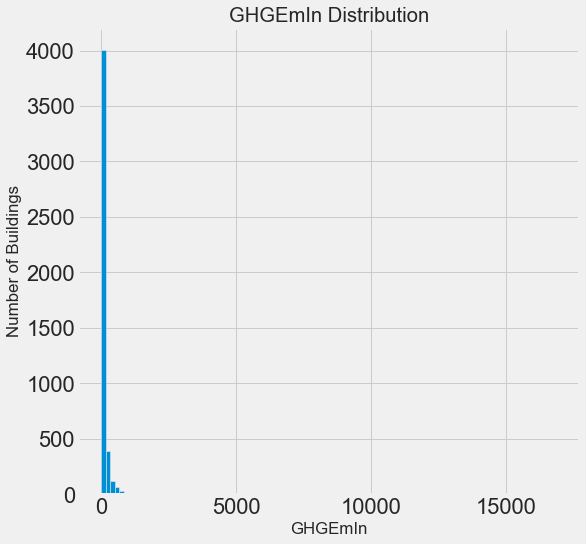

In [3]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['GHGEmIn'].dropna(), bins = 100);
plt.xlabel('GHGEmIn'); plt.ylabel('Number of Buildings'); 
plt.title('GHGEmIn Distribution');

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
X_train=imp.fit_transform(train_features)
X_test = imp.transform(test_features)
X_train

array([[ 1.90900000e+03,  1.00000000e+00,  3.00000000e+00, ...,
         6.69191774e+01,  4.76129400e+01, -1.22346380e+02],
       [ 2.00500000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         8.00000000e+01,  4.75213174e+01, -1.22366897e+02],
       [ 1.95800000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         6.70114447e+01,  4.76949700e+01, -1.22387040e+02],
       ...,
       [ 1.93100000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         6.68594665e+01,  4.76303400e+01, -1.22374120e+02],
       [ 2.00500000e+03,  1.00000000e+00,  5.00000000e+00, ...,
         8.30000000e+01,  4.76185600e+01, -1.22321940e+02],
       [ 2.00700000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         3.40000000e+01,  4.76602669e+01, -1.22398534e+02]])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Transform both training data and testing data
X_train = imputer.fit_transform(train_features)
#DATA LEAKAGE !!! X_test = imputer.fit_transform(test_features)
X_test = imputer.transform(test_features)

In [6]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [7]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [8]:
# Create the scaler object with a range of 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

# Transform both the training and testing data
X_train = scaler.fit_transform(X_train)
#DATA LEAKAGE !!! X_test = scaler.fit_transform(X_test)
X_test = scaler.transform(X_test)

In [10]:
# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [11]:
#transforming the X_train and y_train back to a dataframe with imputed values for Hyperparameter Tuner
train_df = train_features.copy()
train_df
#yearbuilt= train_df['YearBuilt']
#latitude= train_df['Latitude']
#longitude= train_df['Longitude']
#train_df.drop(['YearBuilt','Latitude','Longitude'],axis=1)
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(train_df.columns, IterativeImputer(max_iter=10, random_state=0))])
imputed_features = mapper.fit_transform(train_df.copy(), 8)
imputed_features_df = pd.DataFrame(imputed_features, index=train_df.index, columns=train_df.columns)
mapper = DataFrameMapper([(imputed_features_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(imputed_features_df.copy(), 8)
scaled_features_df = pd.DataFrame(scaled_features, index=imputed_features_df.index, columns=imputed_features_df.columns)
scaled_features_df['target']=train_labels
#scaled_features_df['YearBuilt']=yearbuilt
#scaled_features_df['Latitude']=latitude
#scaled_features_df['Longitude']=longitude

scaled_features_df

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0     -1.796585          -0.043087       -0.307409         -0.312127   
1      1.129074          -0.043087       -0.669729         -0.334884   
2     -0.303280          -0.043087       -0.669729         -0.265158   
3     -1.857536          -0.043087        0.417232          0.345872   
4     -1.796585          -0.043087       -0.307409         -0.217900   
...         ...                ...             ...               ...   
4682  -1.461353          -0.043087       -0.307409          0.392506   
4683  -0.364231           0.494007       -0.488569         -0.357682   
4684  -1.126122          -0.043087       -0.669729         -0.345077   
4685   1.129074          -0.043087        0.054912         -0.233474   
4686   1.190025          -0.043087       -0.126249         -0.279754   

      PropertyGFAParking  ENERGYSTARScore  Latitude  Longitude  target  
0              -0.276174        -0.032895 -0.228699  -0.420157    0.00  
1              -0.276174         0.517684 -2.132992  -1.169324   28.39  
2              -0.276174        -0.029012  1.476221  -1.904806   50.22  
3              -0.276174         1.275315 -0.527805   0.105720  124.66  
4              -0.276174        -0.025471 -0.552307   0.365254    9.23  
...                  ...              ...       ...        ...     ...  
4682            1.623451         0.078279  0.148325   0.270684  406.02  
4683           -0.276174        -0.660852 -1.930916   2.380448   60.50  
4684           -0.276174        -0.035408  0.132944  -1.433048   22.29  
4685           -0.276174         0.643956 -0.111892   0.472239   45.58  
4686           -0.276174        -1.418482  0.754947  -2.324498    8.37  

[4687 rows x 9 columns]

In [12]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, ridgelasso=True):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    model_mse = metrics.mean_squared_error(y_test, model_pred)
    model_rmse = np.sqrt(metrics.mean_squared_error(y_test, model_pred))
    model_r2 = metrics.r2_score(y_test, model_pred)
        
    #Ridge and lasso regressor parameters and GridSearchCV
    if ridgelasso:
        parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
        model_regressor = GridSearchCV(model, parameters, scoring = 'neg_mean_absolute_error',cv = 10)
        model_regressor_fitted = model_regressor.fit(X_train,y_train)
        model_best_params = model_regressor_fitted.best_params_
        model_best_score = model_regressor_fitted.best_score_
        # Return the performance metrics for Ridge Lasso
        return (model_mae, model_mse, model_rmse, model_r2, model_best_params, model_best_score)
    else :
        # Return the performance metrics for other models
        return (model_mae, model_mse, model_rmse, model_r2)    

In [11]:
lr = LinearRegression(fit_intercept=False,normalize=False,n_jobs=-1)
lr_mae, lr_mse, lr_rmse, lr_r2 = fit_and_evaluate(lr,ridgelasso=False)

print('Linear Regression Performance on the test set: Mean Absolute Error: %.4f' % lr_mae)
print('Linear Regression Performance on the test set: Mean Squared Error: %.4f' % lr_mse)
print('Linear Regression Performance on the test set: Root Mean Squared Error: %.4f' % lr_rmse)
print('Linear Regression Performance on the test set: R^2: %.4f' % lr_r2)

Linear Regression Performance on the test set: Mean Absolute Error: 146.3021
Linear Regression Performance on the test set: Mean Squared Error: 185806.1103
Linear Regression Performance on the test set: Root Mean Squared Error: 431.0523
Linear Regression Performance on the test set: R^2: 0.2701


In [12]:
ridge = Ridge()
ridge_mae, ridge_mse, ridge_rmse, ridge_r2, ridge_best_params, ridge_best_score = fit_and_evaluate(ridge)

print('Ridge Regression Performance on the test set: Mean Absolute Error: %.4f' % ridge_mae)
print('Ridge Regression Performance on the test set: Mean Squared Error: %.4f ' % ridge_mse)
print('Ridge Regression Performance on the test set: Root Mean Squared Error: %.4f' % ridge_rmse)
print('Ridge Regression Performance on the test set: R^2: %.4f' % ridge_r2)
print('Ridge Regression Performance on the test set: Best Parameter: ',ridge_best_params)
print('Ridge Regression Performance on the test set: Best Score: %.4f' %ridge_best_score)

Ridge Regression Performance on the test set: Mean Absolute Error: 107.5788
Ridge Regression Performance on the test set: Mean Squared Error: 173491.4744 
Ridge Regression Performance on the test set: Root Mean Squared Error: 416.5231
Ridge Regression Performance on the test set: R^2: 0.3185
Ridge Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Ridge Regression Performance on the test set: Best Score: -104.0687


In [13]:
lasso = Lasso(max_iter=100000)
lasso_mae, lasso_mse, lasso_rmse, lasso_r2, lasso_best_params, lasso_best_score = fit_and_evaluate(lasso)

print('Lasso Regression Performance on the test set: Mean Absolute Error: %.4f' % lasso_mae)
print('Lasso Regression Performance on the test set: Mean Squared Error: %.4f ' % lasso_mse)
print('Lasso Regression Performance on the test set: Root Mean Squared Error: %.4f' % lasso_rmse)
print('Lasso Regression Performance on the test set: R^2: %.4f' % lasso_r2)
print('Lasso Regression Performance on the test set: Best Parameter: ',lasso_best_params)
print('Lasso Regression Performance on the test set: Best Score: %.4f' %lasso_best_score)

Lasso Regression Performance on the test set: Mean Absolute Error: 106.7149
Lasso Regression Performance on the test set: Mean Squared Error: 174257.3566 
Lasso Regression Performance on the test set: Root Mean Squared Error: 417.4414
Lasso Regression Performance on the test set: R^2: 0.3155
Lasso Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Lasso Regression Performance on the test set: Best Score: -96.7531


In [14]:
svm = LinearSVR(C = 2.0,loss='squared_epsilon_insensitive',max_iter=100000)
svm_mae, svm_mse, svm_rmse, svm_r2 = fit_and_evaluate(svm,ridgelasso=False)

print('Support Vector Machine Regression Performance on the test set: Mean Absolute Error %0.4f' % svm_mae)
print('Support Vector Machine Regression Performance on the test set: Mean Squared Error %.4f' % svm_mse)
print('Support Vector Machine Regression Performance on the test set: Root Mean Squared Error %.4f' %  svm_rmse)
print('Support Vector Machine Regression Performance on the test set: R^2 %.4f' % svm_r2)

Support Vector Machine Regression Performance on the test set: Mean Absolute Error 107.5781
Support Vector Machine Regression Performance on the test set: Mean Squared Error 173485.6116
Support Vector Machine Regression Performance on the test set: Root Mean Squared Error 416.5160
Support Vector Machine Regression Performance on the test set: R^2 0.3185


In [49]:
random_forest = RandomForestRegressor(random_state=60, n_estimators=100,max_depth=19,max_features=7,min_samples_split=2,min_samples_leaf=1)

#random_state=60, n_estimators=100

#- max_depth=5
#- max_features=7
#- min_samples_split=31
#- min_samples_leaf=6
"""
Best parameters:
- max_depth=19
- max_features=7
- min_samples_split=2
- min_samples_leaf=1
"""

rf_mae, rf_mse, rf_rmse, rf_r2 = fit_and_evaluate(random_forest,ridgelasso=False)

print('Random Forest Regression Performance on the test set: Mean Absolute Error:  %0.4f' % rf_mae)
print('Random Forest Regression Performance on the test set: Mean Squared Error: %.4f' % rf_mse)
print('Random Forest Regression Performance on the test set: Root Mean Squared Error: %.4f' % rf_rmse)
print('Random Forest Regression Performance on the test set: R^2: %.4f' % rf_r2)

Random Forest Regression Performance on the test set: Mean Absolute Error:  63.1839
Random Forest Regression Performance on the test set: Mean Squared Error: 75968.1601
Random Forest Regression Performance on the test set: Root Mean Squared Error: 275.6232
Random Forest Regression Performance on the test set: R^2: 0.7016


In [48]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = RandomForestRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0],  
                            res_gp.x[1], res_gp.x[2], 
                            res_gp.x[3]))

Best parameters:
- max_depth=19
- max_features=7
- min_samples_split=2
- min_samples_leaf=1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBBC097F0>,
      dtype=object)

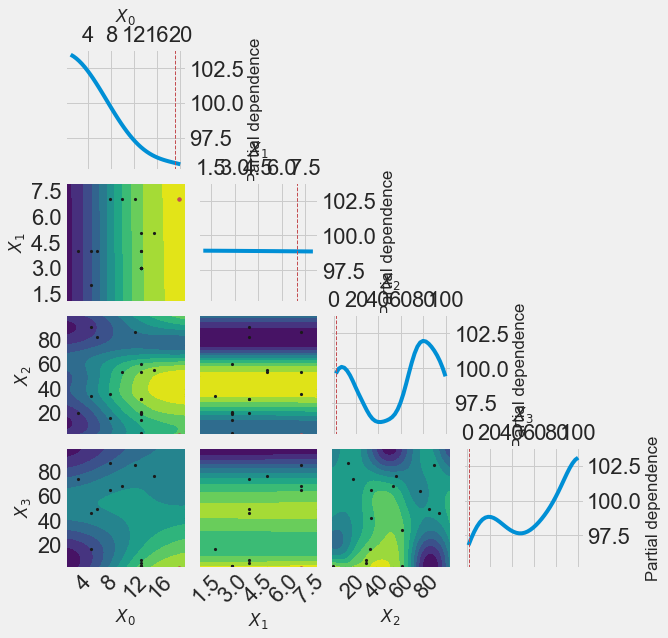

In [50]:
from skopt.plots import plot_convergence,plot_evaluations,plot_objective


#plot_convergence(res_gp)
#plot_evaluations(res_gp,bins=10)
plot_objective(res_gp)

In [53]:
gradient_boosted = GradientBoostingRegressor(random_state=0,max_depth=17,learning_rate=0.063211,
                                             max_features=4,min_samples_split=2,min_samples_leaf=1,n_estimators=100)

gb_mae , gb_mse, gb_rmse, gb_r2 = fit_and_evaluate(gradient_boosted,ridgelasso=False)

"""
Best parameters:
- max_depth=17
- learning_rate=0.063211
- max_features=4
- min_samples_split=2
- min_samples_leaf=1
"""

#- max_depth=5
#- learning_rate=0.270406
#- max_features=7
#- min_samples_split=2
#- min_samples_leaf=1

#- max_depth=5
#- learning_rate=0.103690
#- max_features=3
#- min_samples_split=2
#- min_samples_leaf=1

#- max_depth=5
#- learning_rate=0.241932
#- max_features=1
#- min_samples_split=2
#- min_samples_leaf=1

#Best parameters for gbrt_minimize function with GradientBoostRegressor with 50 estimators and random state 0 with skopt:
#- max_depth=5
#- learning_rate=0.310147
#- max_features=3
#- min_samples_split=2
#- min_samples_leaf=1

#Best parameters for forest_minimize function with GradientBoostRegressor with 50 estimators and random state 0 with skopt:
#- max_depth=5
#- learning_rate=0.174495
#- max_features=7
#- min_samples_split=45
#- min_samples_leaf=87

print('Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  %0.4f' % gb_mae)
print('Gradient Boosted Regression Performance on the test set: Mean Squared Error: %.4f ' % gb_mse)
print('Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: %.4f' % gb_rmse)
print('Gradient Boosted Regression Performance on the test set: R^2: %.4f' % gb_r2)

Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  54.6538
Gradient Boosted Regression Performance on the test set: Mean Squared Error: 87906.8826 
Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: 296.4909
Gradient Boosted Regression Performance on the test set: R^2: 0.6547


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=17
- learning_rate=0.063211
- max_features=4
- min_samples_split=2
- min_samples_leaf=1


In [17]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae, knn_mse, knn_rmse, knn_r2 = fit_and_evaluate(knn,ridgelasso=False)

print('K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: %0.4f' % knn_mae)
print('K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: %.4f' % knn_mse)
print('K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: %.4f'% knn_rmse)
print('K-Nearest Neighbors Regression Performance on the test set: R^2: %.4f' % knn_r2)

K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: 85.7843
K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: 129319.0404
K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: 359.6096
K-Nearest Neighbors Regression Performance on the test set: R^2: 0.4920


In [264]:
from hpsklearn import HyperoptEstimator, any_regressor, ada_boost_regression, random_forest_regression,xgboost_regression, standard_scaler,gradient_boosting_regression, any_preprocessing
from hyperopt import tpe
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing

estim = HyperoptEstimator(regressor=gradient_boosting_regression('gbr'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120,preprocessing=any_preprocessing('my_pre'))#any_preprocessing('my_pre')

estim.fit(X_train, y_train)

print(estim.score(X_test, y_test))

print(estim.best_model())

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
100%|████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.99s/it, best loss: 0.40514746247668043]
0.5389695140410462
{'learner': GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
             learning_rate=0.025465140528597045, loss='quantile',
             max_depth=None, max_features=0.6722897085780744,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=480, n_iter_no_change=None, presort='auto',
             random_state=3, subsample=0.7861788929379534, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}


In [265]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space ={
        'max_depth': hp.choice('max_depth', np.arange(5, 30, dtype=int)),
        'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.8, 1),
        'eval_metric': 'rmse',
        'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
        'learning_rate': hp.uniform('learning_rate',0.01,0.05),
        'objective' : 'reg:squarederror',
        'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': hp.uniform('colsample_bylevel', 0.6, 1.0),
        'colsample_bynode': hp.uniform('colsample_bynode', 0.6, 1.0),
        'reg_alpha' : hp.choice('reg_alpha', np.arange(1, 30, dtype=int)),
        'reg_lambda' : hp.choice('reg_lambda', np.arange(1, 30, dtype=int)),
          
    } 


def objective(space):

    reg = xgb.XGBRegressor(n_estimators = 1000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'], 
                            eval_metric=space['eval_metric'],
                            learning_rate=space['learning_rate'],
                            objective=space['objective'],
                            num_leaves = space['num_leaves'],
                            colsample_bytree = space['colsample_bytree'],
                            colsample_bylevel = space['colsample_bylevel'],
                            colsample_bynode = space['colsample_bynode'], 
                            reg_alpha = space['reg_alpha'],
                            reg_lambda = space['reg_lambda']
                            )

    eval_set  = [(X_train, y_train),(X_test,y_test)]

    reg.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=30)

    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print ("SCORE:", mse)

    return{'loss': mse, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

[0]	validation_0-rmse:476.332	validation_1-rmse:511.486                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:472.3	validation_1-rmse:507.862                                                                  

[2]	validation_0-rmse:466.097	validation_1-rmse:500.972                                                                

[3]	validation_0-rmse:460.496	validation_1-rmse:497.709                                                                

[4]	validation_0-rmse:456.201	validation_1-rmse:495.68                                                                 

[5]	validation_0-rmse:452.325	validation_1-rmse:493.136                                                                

[6]	validation_0-rmse:449.032	v

[132]	validation_0-rmse:202.162	validation_1-rmse:366.349                                                              

[133]	validation_0-rmse:201.06	validation_1-rmse:365.55                                                                

[134]	validation_0-rmse:199.966	validation_1-rmse:364.828                                                              

[135]	validation_0-rmse:199.063	validation_1-rmse:364.927                                                              

[136]	validation_0-rmse:198.466	validation_1-rmse:364.926                                                              

[137]	validation_0-rmse:197.608	validation_1-rmse:365.018                                                              

[138]	validation_0-rmse:196.837	validation_1-rmse:364.933                                                              

[139]	validation_0-rmse:196.221	validation_1-rmse:364.662                                                              

[140]	validation_0-rmse:195.145	

[266]	validation_0-rmse:117.17	validation_1-rmse:348.104                                                               

[267]	validation_0-rmse:116.698	validation_1-rmse:348.265                                                              

[268]	validation_0-rmse:116.25	validation_1-rmse:348.161                                                               

[269]	validation_0-rmse:115.802	validation_1-rmse:347.771                                                              

[270]	validation_0-rmse:115.459	validation_1-rmse:347.723                                                              

[271]	validation_0-rmse:115.009	validation_1-rmse:347.745                                                              

[272]	validation_0-rmse:114.588	validation_1-rmse:347.386                                                              

[273]	validation_0-rmse:114.214	validation_1-rmse:347.393                                                              

[274]	validation_0-rmse:113.962	

[400]	validation_0-rmse:75.2901	validation_1-rmse:341.871                                                              

[401]	validation_0-rmse:75.0849	validation_1-rmse:341.84                                                               

[402]	validation_0-rmse:74.9477	validation_1-rmse:341.714                                                              

[403]	validation_0-rmse:74.7562	validation_1-rmse:341.732                                                              

[404]	validation_0-rmse:74.4639	validation_1-rmse:341.765                                                              

[405]	validation_0-rmse:74.1845	validation_1-rmse:341.851                                                              

[406]	validation_0-rmse:74.0016	validation_1-rmse:341.852                                                              

[407]	validation_0-rmse:73.7397	validation_1-rmse:341.867                                                              

[408]	validation_0-rmse:73.5346	

[534]	validation_0-rmse:51.4467	validation_1-rmse:339.281                                                              

[535]	validation_0-rmse:51.2344	validation_1-rmse:339.267                                                              

[536]	validation_0-rmse:51.0489	validation_1-rmse:339.31                                                               

[537]	validation_0-rmse:50.9204	validation_1-rmse:339.329                                                              

[538]	validation_0-rmse:50.8354	validation_1-rmse:339.312                                                              

[539]	validation_0-rmse:50.7665	validation_1-rmse:339.325                                                              

[540]	validation_0-rmse:50.6189	validation_1-rmse:339.308                                                              

[541]	validation_0-rmse:50.4854	validation_1-rmse:339.343                                                              

[542]	validation_0-rmse:50.2944	

[84]	validation_0-rmse:300.34	validation_1-rmse:404.047                                                                

[85]	validation_0-rmse:299.373	validation_1-rmse:403.516                                                               

[86]	validation_0-rmse:297.539	validation_1-rmse:402.104                                                               

[87]	validation_0-rmse:295.808	validation_1-rmse:401.924                                                               

[88]	validation_0-rmse:294.702	validation_1-rmse:401.782                                                               

[89]	validation_0-rmse:294.314	validation_1-rmse:401.492                                                               

[90]	validation_0-rmse:293.558	validation_1-rmse:400.75                                                                

[91]	validation_0-rmse:292.693	validation_1-rmse:399.754                                                               

[92]	validation_0-rmse:292.23	va

[218]	validation_0-rmse:199.036	validation_1-rmse:363.594                                                              

[219]	validation_0-rmse:198.483	validation_1-rmse:363.59                                                               

[220]	validation_0-rmse:197.514	validation_1-rmse:362.681                                                              

[221]	validation_0-rmse:197.209	validation_1-rmse:362.08                                                               

[222]	validation_0-rmse:196.28	validation_1-rmse:360.754                                                               

[223]	validation_0-rmse:195.393	validation_1-rmse:359.482                                                              

[224]	validation_0-rmse:194.831	validation_1-rmse:359.142                                                              

[225]	validation_0-rmse:193.925	validation_1-rmse:358.237                                                              

[226]	validation_0-rmse:193.399	

[352]	validation_0-rmse:140.752	validation_1-rmse:340.615                                                              

[353]	validation_0-rmse:140.508	validation_1-rmse:340.56                                                               

[354]	validation_0-rmse:140.187	validation_1-rmse:340.643                                                              

[355]	validation_0-rmse:139.853	validation_1-rmse:340.436                                                              

[356]	validation_0-rmse:139.501	validation_1-rmse:340.168                                                              

[357]	validation_0-rmse:139.17	validation_1-rmse:340.041                                                               

[358]	validation_0-rmse:138.716	validation_1-rmse:339.913                                                              

[359]	validation_0-rmse:138.602	validation_1-rmse:339.898                                                              

[360]	validation_0-rmse:138.273	

[486]	validation_0-rmse:107.487	validation_1-rmse:334.246                                                              

[487]	validation_0-rmse:107.232	validation_1-rmse:334.277                                                              

[488]	validation_0-rmse:106.987	validation_1-rmse:334.316                                                              

[489]	validation_0-rmse:106.729	validation_1-rmse:334.309                                                              

[490]	validation_0-rmse:106.636	validation_1-rmse:334.319                                                              

[491]	validation_0-rmse:106.372	validation_1-rmse:334.167                                                              

Stopping. Best iteration:                                                                                              
[461]	validation_0-rmse:112.799	validation_1-rmse:334.097


SCORE:                                                                                        

[123]	validation_0-rmse:292.188	validation_1-rmse:388.116                                                              

[124]	validation_0-rmse:291.631	validation_1-rmse:387.961                                                              

[125]	validation_0-rmse:291.064	validation_1-rmse:387.918                                                              

[126]	validation_0-rmse:290.5	validation_1-rmse:387.885                                                                

[127]	validation_0-rmse:289.743	validation_1-rmse:387.848                                                              

[128]	validation_0-rmse:288.911	validation_1-rmse:387.791                                                              

[129]	validation_0-rmse:287.77	validation_1-rmse:386.316                                                               

[130]	validation_0-rmse:286.978	validation_1-rmse:385.557                                                              

[131]	validation_0-rmse:286.63	v

[257]	validation_0-rmse:220.965	validation_1-rmse:358.915                                                              

[258]	validation_0-rmse:220.54	validation_1-rmse:358.87                                                                

[259]	validation_0-rmse:219.986	validation_1-rmse:358.316                                                              

[260]	validation_0-rmse:219.422	validation_1-rmse:358.433                                                              

[261]	validation_0-rmse:219.099	validation_1-rmse:358.317                                                              

[262]	validation_0-rmse:218.866	validation_1-rmse:358.184                                                              

[263]	validation_0-rmse:218.453	validation_1-rmse:358.292                                                              

[264]	validation_0-rmse:218.044	validation_1-rmse:357.939                                                              

[265]	validation_0-rmse:217.629	

[391]	validation_0-rmse:174.738	validation_1-rmse:345.651                                                              

[392]	validation_0-rmse:174.58	validation_1-rmse:345.702                                                               

[393]	validation_0-rmse:174.338	validation_1-rmse:345.657                                                              

[394]	validation_0-rmse:173.824	validation_1-rmse:345.416                                                              

[395]	validation_0-rmse:173.662	validation_1-rmse:345.418                                                              

[396]	validation_0-rmse:173.284	validation_1-rmse:345.492                                                              

[397]	validation_0-rmse:172.995	validation_1-rmse:345.382                                                              

[398]	validation_0-rmse:172.679	validation_1-rmse:345.3                                                                

[399]	validation_0-rmse:172.439	

[21]	validation_0-rmse:383.536	validation_1-rmse:446.323                                                               

[22]	validation_0-rmse:380.175	validation_1-rmse:443.801                                                               

[23]	validation_0-rmse:377.604	validation_1-rmse:441.049                                                               

[24]	validation_0-rmse:375.424	validation_1-rmse:438.812                                                               

[25]	validation_0-rmse:371.645	validation_1-rmse:437.77                                                                

[26]	validation_0-rmse:368.766	validation_1-rmse:436.389                                                               

[27]	validation_0-rmse:365.524	validation_1-rmse:435.753                                                               

[28]	validation_0-rmse:362.74	validation_1-rmse:434.596                                                                

[29]	validation_0-rmse:360.8	val

[155]	validation_0-rmse:221.975	validation_1-rmse:359.459                                                              

[156]	validation_0-rmse:221.363	validation_1-rmse:359.701                                                              

[157]	validation_0-rmse:220.39	validation_1-rmse:360.071                                                               

[158]	validation_0-rmse:219.804	validation_1-rmse:360.034                                                              

[159]	validation_0-rmse:219.479	validation_1-rmse:359.849                                                              

[160]	validation_0-rmse:218.658	validation_1-rmse:359.452                                                              

[161]	validation_0-rmse:218.022	validation_1-rmse:358.979                                                              

[162]	validation_0-rmse:217.561	validation_1-rmse:359.025                                                              

[163]	validation_0-rmse:217.247	

[289]	validation_0-rmse:158.962	validation_1-rmse:345.39                                                               

[290]	validation_0-rmse:158.596	validation_1-rmse:345.339                                                              

[291]	validation_0-rmse:158.32	validation_1-rmse:345.355                                                               

[292]	validation_0-rmse:157.931	validation_1-rmse:345.075                                                              

[293]	validation_0-rmse:157.635	validation_1-rmse:345.296                                                              

[294]	validation_0-rmse:157.281	validation_1-rmse:345.612                                                              

[295]	validation_0-rmse:157.118	validation_1-rmse:345.652                                                              

[296]	validation_0-rmse:156.778	validation_1-rmse:345.696                                                              

[297]	validation_0-rmse:156.458	

[81]	validation_0-rmse:326.8	validation_1-rmse:401.406                                                                 

[82]	validation_0-rmse:325.302	validation_1-rmse:400.041                                                               

[83]	validation_0-rmse:324.34	validation_1-rmse:399.773                                                                

[84]	validation_0-rmse:323.437	validation_1-rmse:399.723                                                               

[85]	validation_0-rmse:321.529	validation_1-rmse:399.023                                                               

[86]	validation_0-rmse:320.268	validation_1-rmse:397.929                                                               

[87]	validation_0-rmse:318.962	validation_1-rmse:396.636                                                               

[88]	validation_0-rmse:318.023	validation_1-rmse:396.601                                                               

[89]	validation_0-rmse:317.577	v

[215]	validation_0-rmse:226.688	validation_1-rmse:348.614                                                              

[216]	validation_0-rmse:226.43	validation_1-rmse:348.426                                                               

[217]	validation_0-rmse:225.825	validation_1-rmse:348.12                                                               

[218]	validation_0-rmse:225.428	validation_1-rmse:347.664                                                              

[219]	validation_0-rmse:225.005	validation_1-rmse:347.367                                                              

[220]	validation_0-rmse:224.526	validation_1-rmse:347.255                                                              

[221]	validation_0-rmse:224.073	validation_1-rmse:346.37                                                               

[222]	validation_0-rmse:223.332	validation_1-rmse:345.685                                                              

[223]	validation_0-rmse:222.894	

[349]	validation_0-rmse:176.288	validation_1-rmse:332.459                                                              

[350]	validation_0-rmse:176.147	validation_1-rmse:332.407                                                              

[351]	validation_0-rmse:175.998	validation_1-rmse:332.477                                                              

[352]	validation_0-rmse:175.654	validation_1-rmse:332.457                                                              

[353]	validation_0-rmse:175.401	validation_1-rmse:332.426                                                              

[354]	validation_0-rmse:175.002	validation_1-rmse:332.18                                                               

[355]	validation_0-rmse:174.657	validation_1-rmse:331.842                                                              

[356]	validation_0-rmse:174.324	validation_1-rmse:331.966                                                              

[357]	validation_0-rmse:173.982	

[483]	validation_0-rmse:144.088	validation_1-rmse:328.779                                                              

[484]	validation_0-rmse:143.957	validation_1-rmse:328.847                                                              

[485]	validation_0-rmse:143.625	validation_1-rmse:328.879                                                              

[486]	validation_0-rmse:143.43	validation_1-rmse:328.957                                                               

[487]	validation_0-rmse:143.194	validation_1-rmse:328.939                                                              

[488]	validation_0-rmse:143.013	validation_1-rmse:328.831                                                              

[489]	validation_0-rmse:142.846	validation_1-rmse:328.555                                                              

[490]	validation_0-rmse:142.724	validation_1-rmse:328.509                                                              

[491]	validation_0-rmse:142.364	

[617]	validation_0-rmse:120.143	validation_1-rmse:326.317                                                              

[618]	validation_0-rmse:119.99	validation_1-rmse:326.253                                                               

[619]	validation_0-rmse:119.746	validation_1-rmse:326.412                                                              

[620]	validation_0-rmse:119.665	validation_1-rmse:326.447                                                              

[621]	validation_0-rmse:119.495	validation_1-rmse:326.372                                                              

[622]	validation_0-rmse:119.349	validation_1-rmse:326.283                                                              

[623]	validation_0-rmse:119.149	validation_1-rmse:326.09                                                               

[624]	validation_0-rmse:118.973	validation_1-rmse:326.069                                                              

Stopping. Best iteration:       

[121]	validation_0-rmse:249.832	validation_1-rmse:359.52                                                               

[122]	validation_0-rmse:249.072	validation_1-rmse:358.829                                                              

[123]	validation_0-rmse:248.637	validation_1-rmse:358.607                                                              

[124]	validation_0-rmse:247.653	validation_1-rmse:357.981                                                              

[125]	validation_0-rmse:246.831	validation_1-rmse:358.085                                                              

[126]	validation_0-rmse:245.816	validation_1-rmse:357.837                                                              

[127]	validation_0-rmse:244.873	validation_1-rmse:357.821                                                              

[128]	validation_0-rmse:243.75	validation_1-rmse:357.661                                                               

[129]	validation_0-rmse:243.084	

[255]	validation_0-rmse:175.004	validation_1-rmse:345.251                                                              

[256]	validation_0-rmse:174.576	validation_1-rmse:345.284                                                              

[257]	validation_0-rmse:174.341	validation_1-rmse:345.247                                                              

[258]	validation_0-rmse:173.927	validation_1-rmse:344.575                                                              

[259]	validation_0-rmse:173.502	validation_1-rmse:344.675                                                              

[260]	validation_0-rmse:173.342	validation_1-rmse:344.691                                                              

[261]	validation_0-rmse:173.039	validation_1-rmse:344.894                                                              

[262]	validation_0-rmse:172.407	validation_1-rmse:345.177                                                              

[263]	validation_0-rmse:171.883	

[8]	validation_0-rmse:465.943	validation_1-rmse:503.824                                                                

[9]	validation_0-rmse:463.931	validation_1-rmse:501.866                                                                

[10]	validation_0-rmse:462.295	validation_1-rmse:500.693                                                               

[11]	validation_0-rmse:461.334	validation_1-rmse:500.051                                                               

[12]	validation_0-rmse:459.407	validation_1-rmse:497.963                                                               

[13]	validation_0-rmse:457.894	validation_1-rmse:497.192                                                               

[14]	validation_0-rmse:456.295	validation_1-rmse:495.693                                                               

[15]	validation_0-rmse:455.309	validation_1-rmse:495.305                                                               

[16]	validation_0-rmse:453.68	va

[142]	validation_0-rmse:333.193	validation_1-rmse:406.178                                                              

[143]	validation_0-rmse:332.496	validation_1-rmse:406.112                                                              

[144]	validation_0-rmse:332.015	validation_1-rmse:405.912                                                              

[145]	validation_0-rmse:331.403	validation_1-rmse:405.574                                                              

[146]	validation_0-rmse:330.997	validation_1-rmse:405.573                                                              

[147]	validation_0-rmse:330.247	validation_1-rmse:405.09                                                               

[148]	validation_0-rmse:329.52	validation_1-rmse:404.287                                                               

[149]	validation_0-rmse:328.926	validation_1-rmse:403.801                                                              

[150]	validation_0-rmse:328.31	v

[276]	validation_0-rmse:273.417	validation_1-rmse:375.55                                                               

[277]	validation_0-rmse:272.994	validation_1-rmse:375.165                                                              

[278]	validation_0-rmse:272.712	validation_1-rmse:375.153                                                              

[279]	validation_0-rmse:272.385	validation_1-rmse:375.243                                                              

[280]	validation_0-rmse:271.905	validation_1-rmse:374.969                                                              

[281]	validation_0-rmse:271.569	validation_1-rmse:374.758                                                              

[282]	validation_0-rmse:271.313	validation_1-rmse:374.734                                                              

[283]	validation_0-rmse:270.909	validation_1-rmse:374.491                                                              

[284]	validation_0-rmse:270.685	

[410]	validation_0-rmse:234.98	validation_1-rmse:358.499                                                               

[411]	validation_0-rmse:234.77	validation_1-rmse:358.476                                                               

[412]	validation_0-rmse:234.577	validation_1-rmse:358.454                                                              

[413]	validation_0-rmse:234.308	validation_1-rmse:358.394                                                              

[414]	validation_0-rmse:234.068	validation_1-rmse:358.517                                                              

[415]	validation_0-rmse:233.878	validation_1-rmse:358.555                                                              

[416]	validation_0-rmse:233.685	validation_1-rmse:358.519                                                              

[417]	validation_0-rmse:233.368	validation_1-rmse:358.263                                                              

[418]	validation_0-rmse:233.203	

[544]	validation_0-rmse:207.177	validation_1-rmse:350.414                                                              

[545]	validation_0-rmse:207.014	validation_1-rmse:350.537                                                              

[546]	validation_0-rmse:206.872	validation_1-rmse:350.518                                                              

[547]	validation_0-rmse:206.66	validation_1-rmse:350.465                                                               

[548]	validation_0-rmse:206.44	validation_1-rmse:350.336                                                               

[549]	validation_0-rmse:206.208	validation_1-rmse:350.355                                                              

[550]	validation_0-rmse:206.069	validation_1-rmse:350.331                                                              

[551]	validation_0-rmse:205.851	validation_1-rmse:350.167                                                              

[552]	validation_0-rmse:205.648	

[678]	validation_0-rmse:184.624	validation_1-rmse:344.236                                                              

[679]	validation_0-rmse:184.548	validation_1-rmse:344.336                                                              

[680]	validation_0-rmse:184.373	validation_1-rmse:344.291                                                              

[681]	validation_0-rmse:184.256	validation_1-rmse:344.136                                                              

[682]	validation_0-rmse:184.199	validation_1-rmse:344.178                                                              

[683]	validation_0-rmse:184.042	validation_1-rmse:344.154                                                              

[684]	validation_0-rmse:183.935	validation_1-rmse:344.227                                                              

[685]	validation_0-rmse:183.8	validation_1-rmse:344.259                                                                

[686]	validation_0-rmse:183.705	

[812]	validation_0-rmse:165.892	validation_1-rmse:340.281                                                              

[813]	validation_0-rmse:165.785	validation_1-rmse:340.381                                                              

[814]	validation_0-rmse:165.648	validation_1-rmse:340.384                                                              

[815]	validation_0-rmse:165.523	validation_1-rmse:340.319                                                              

[816]	validation_0-rmse:165.393	validation_1-rmse:340.309                                                              

[817]	validation_0-rmse:165.332	validation_1-rmse:340.347                                                              

[818]	validation_0-rmse:165.116	validation_1-rmse:340.17                                                               

[819]	validation_0-rmse:165.031	validation_1-rmse:340.119                                                              

[820]	validation_0-rmse:164.875	

[75]	validation_0-rmse:380.51	validation_1-rmse:438.681                                                                

[76]	validation_0-rmse:379.46	validation_1-rmse:437.535                                                                

[77]	validation_0-rmse:378.724	validation_1-rmse:436.513                                                               

[78]	validation_0-rmse:377.842	validation_1-rmse:435.487                                                               

[79]	validation_0-rmse:377.372	validation_1-rmse:435.064                                                               

[80]	validation_0-rmse:376.348	validation_1-rmse:433.811                                                               

[81]	validation_0-rmse:375.792	validation_1-rmse:433.235                                                               

[82]	validation_0-rmse:375.038	validation_1-rmse:432.282                                                               

[83]	validation_0-rmse:374.025	v

[209]	validation_0-rmse:319.584	validation_1-rmse:387.478                                                              

[210]	validation_0-rmse:319.38	validation_1-rmse:387.339                                                               

[211]	validation_0-rmse:319.082	validation_1-rmse:387.286                                                              

[212]	validation_0-rmse:318.722	validation_1-rmse:386.871                                                              

[213]	validation_0-rmse:318.585	validation_1-rmse:386.732                                                              

[214]	validation_0-rmse:318.191	validation_1-rmse:386.441                                                              

[215]	validation_0-rmse:318.091	validation_1-rmse:386.434                                                              

[216]	validation_0-rmse:318.004	validation_1-rmse:386.499                                                              

[217]	validation_0-rmse:317.583	

[343]	validation_0-rmse:286.587	validation_1-rmse:367.895                                                              

[344]	validation_0-rmse:286.423	validation_1-rmse:367.925                                                              

[345]	validation_0-rmse:286.281	validation_1-rmse:367.548                                                              

[346]	validation_0-rmse:285.997	validation_1-rmse:367.219                                                              

[347]	validation_0-rmse:285.881	validation_1-rmse:367.254                                                              

[348]	validation_0-rmse:285.698	validation_1-rmse:367.211                                                              

[349]	validation_0-rmse:285.653	validation_1-rmse:367.203                                                              

[350]	validation_0-rmse:285.561	validation_1-rmse:367.178                                                              

[351]	validation_0-rmse:285.407	

[477]	validation_0-rmse:263.104	validation_1-rmse:355.061                                                              

[478]	validation_0-rmse:263.019	validation_1-rmse:355.071                                                              

[479]	validation_0-rmse:262.795	validation_1-rmse:355.063                                                              

[480]	validation_0-rmse:262.589	validation_1-rmse:354.954                                                              

[481]	validation_0-rmse:262.472	validation_1-rmse:354.932                                                              

[482]	validation_0-rmse:262.336	validation_1-rmse:355.002                                                              

[483]	validation_0-rmse:262.133	validation_1-rmse:355.019                                                              

[484]	validation_0-rmse:262.06	validation_1-rmse:355.073                                                               

[485]	validation_0-rmse:261.913	

[611]	validation_0-rmse:244.656	validation_1-rmse:349.111                                                              

[612]	validation_0-rmse:244.527	validation_1-rmse:349.098                                                              

[613]	validation_0-rmse:244.416	validation_1-rmse:349.096                                                              

[614]	validation_0-rmse:244.367	validation_1-rmse:349.05                                                               

[615]	validation_0-rmse:244.289	validation_1-rmse:349.168                                                              

[616]	validation_0-rmse:244.249	validation_1-rmse:349.071                                                              

[617]	validation_0-rmse:244.168	validation_1-rmse:349.09                                                               

[618]	validation_0-rmse:243.887	validation_1-rmse:348.625                                                              

[619]	validation_0-rmse:243.721	

[745]	validation_0-rmse:227.763	validation_1-rmse:343.796                                                              

[746]	validation_0-rmse:227.589	validation_1-rmse:343.459                                                              

[747]	validation_0-rmse:227.488	validation_1-rmse:343.43                                                               

[748]	validation_0-rmse:227.317	validation_1-rmse:343.37                                                               

[749]	validation_0-rmse:227.229	validation_1-rmse:343.408                                                              

[750]	validation_0-rmse:227.17	validation_1-rmse:343.375                                                               

[751]	validation_0-rmse:227.048	validation_1-rmse:343.249                                                              

[752]	validation_0-rmse:227.021	validation_1-rmse:343.304                                                              

[753]	validation_0-rmse:226.841	

[879]	validation_0-rmse:213.4	validation_1-rmse:338.095                                                                

[880]	validation_0-rmse:213.165	validation_1-rmse:337.788                                                              

[881]	validation_0-rmse:213.08	validation_1-rmse:337.934                                                               

[882]	validation_0-rmse:212.99	validation_1-rmse:337.899                                                               

[883]	validation_0-rmse:212.917	validation_1-rmse:337.953                                                              

[884]	validation_0-rmse:212.893	validation_1-rmse:338.009                                                              

[885]	validation_0-rmse:212.763	validation_1-rmse:337.938                                                              

[886]	validation_0-rmse:212.695	validation_1-rmse:337.949                                                              

[887]	validation_0-rmse:212.633	

[97]	validation_0-rmse:310.128	validation_1-rmse:394.157                                                               

[98]	validation_0-rmse:309.214	validation_1-rmse:393.516                                                               

[99]	validation_0-rmse:308.221	validation_1-rmse:392.44                                                                

[100]	validation_0-rmse:307.416	validation_1-rmse:391.643                                                              

[101]	validation_0-rmse:306.618	validation_1-rmse:391.704                                                              

[102]	validation_0-rmse:305.884	validation_1-rmse:390.864                                                              

[103]	validation_0-rmse:305.025	validation_1-rmse:389.761                                                              

[104]	validation_0-rmse:304.088	validation_1-rmse:389.119                                                              

[105]	validation_0-rmse:303.166	

[231]	validation_0-rmse:233.381	validation_1-rmse:349.133                                                              

[232]	validation_0-rmse:232.969	validation_1-rmse:348.815                                                              

[233]	validation_0-rmse:232.542	validation_1-rmse:348.649                                                              

[234]	validation_0-rmse:232.157	validation_1-rmse:348.733                                                              

[235]	validation_0-rmse:231.828	validation_1-rmse:348.751                                                              

[236]	validation_0-rmse:231.422	validation_1-rmse:348.38                                                               

[237]	validation_0-rmse:231.003	validation_1-rmse:348.113                                                              

[238]	validation_0-rmse:230.627	validation_1-rmse:348.12                                                               

[239]	validation_0-rmse:230.155	

[365]	validation_0-rmse:189.991	validation_1-rmse:333.603                                                              

[366]	validation_0-rmse:189.827	validation_1-rmse:333.503                                                              

[367]	validation_0-rmse:189.551	validation_1-rmse:333.024                                                              

[368]	validation_0-rmse:189.266	validation_1-rmse:332.903                                                              

[369]	validation_0-rmse:189.093	validation_1-rmse:332.929                                                              

[370]	validation_0-rmse:188.724	validation_1-rmse:332.502                                                              

[371]	validation_0-rmse:188.558	validation_1-rmse:332.434                                                              

[372]	validation_0-rmse:188.305	validation_1-rmse:332.218                                                              

[373]	validation_0-rmse:188.075	

[499]	validation_0-rmse:158.414	validation_1-rmse:325.263                                                              

[500]	validation_0-rmse:158.08	validation_1-rmse:325.195                                                               

[501]	validation_0-rmse:157.92	validation_1-rmse:325.216                                                               

[502]	validation_0-rmse:157.653	validation_1-rmse:325.361                                                              

[503]	validation_0-rmse:157.468	validation_1-rmse:325.306                                                              

[504]	validation_0-rmse:157.36	validation_1-rmse:325.259                                                               

[505]	validation_0-rmse:157.177	validation_1-rmse:325.164                                                              

[506]	validation_0-rmse:156.909	validation_1-rmse:324.859                                                              

[507]	validation_0-rmse:156.738	

[33]	validation_0-rmse:397.088	validation_1-rmse:456.817                                                               

[34]	validation_0-rmse:395.849	validation_1-rmse:456.07                                                                

[35]	validation_0-rmse:394.088	validation_1-rmse:455.672                                                               

[36]	validation_0-rmse:392.113	validation_1-rmse:455.028                                                               

[37]	validation_0-rmse:391.034	validation_1-rmse:454.888                                                               

[38]	validation_0-rmse:389.567	validation_1-rmse:454.458                                                               

[39]	validation_0-rmse:388.262	validation_1-rmse:453.609                                                               

[40]	validation_0-rmse:387.382	validation_1-rmse:453.17                                                                

[41]	validation_0-rmse:386.255	v

[167]	validation_0-rmse:261.479	validation_1-rmse:386.272                                                              

[168]	validation_0-rmse:260.816	validation_1-rmse:385.381                                                              

[169]	validation_0-rmse:260.18	validation_1-rmse:384.915                                                               

[170]	validation_0-rmse:259.756	validation_1-rmse:384.882                                                              

[171]	validation_0-rmse:259.213	validation_1-rmse:384.432                                                              

[172]	validation_0-rmse:258.595	validation_1-rmse:383.885                                                              

[173]	validation_0-rmse:258.141	validation_1-rmse:383.393                                                              

[174]	validation_0-rmse:257.548	validation_1-rmse:383.48                                                               

[175]	validation_0-rmse:257.166	

[301]	validation_0-rmse:199.193	validation_1-rmse:366.195                                                              

[302]	validation_0-rmse:198.891	validation_1-rmse:366.271                                                              

[303]	validation_0-rmse:198.465	validation_1-rmse:365.949                                                              

[304]	validation_0-rmse:198.074	validation_1-rmse:365.992                                                              

[305]	validation_0-rmse:197.575	validation_1-rmse:365.777                                                              

[306]	validation_0-rmse:196.959	validation_1-rmse:365.354                                                              

[307]	validation_0-rmse:196.614	validation_1-rmse:365.422                                                              

[308]	validation_0-rmse:196.326	validation_1-rmse:365.33                                                               

[309]	validation_0-rmse:195.945	

[435]	validation_0-rmse:156.442	validation_1-rmse:355.183                                                              

[436]	validation_0-rmse:156.216	validation_1-rmse:355.202                                                              

[437]	validation_0-rmse:155.913	validation_1-rmse:355.297                                                              

[438]	validation_0-rmse:155.614	validation_1-rmse:355.22                                                               

[439]	validation_0-rmse:155.341	validation_1-rmse:355.17                                                               

[440]	validation_0-rmse:155.017	validation_1-rmse:355.061                                                              

[441]	validation_0-rmse:154.78	validation_1-rmse:355.062                                                               

[442]	validation_0-rmse:154.518	validation_1-rmse:355.128                                                              

[443]	validation_0-rmse:154.306	

[569]	validation_0-rmse:127.147	validation_1-rmse:350.827                                                              

[570]	validation_0-rmse:126.917	validation_1-rmse:350.978                                                              

[571]	validation_0-rmse:126.791	validation_1-rmse:351.006                                                              

[572]	validation_0-rmse:126.563	validation_1-rmse:350.895                                                              

[573]	validation_0-rmse:126.445	validation_1-rmse:350.889                                                              

[574]	validation_0-rmse:126.318	validation_1-rmse:350.894                                                              

[575]	validation_0-rmse:126.127	validation_1-rmse:350.899                                                              

[576]	validation_0-rmse:125.919	validation_1-rmse:350.88                                                               

[577]	validation_0-rmse:125.735	

[703]	validation_0-rmse:104.979	validation_1-rmse:348.143                                                              

[704]	validation_0-rmse:104.817	validation_1-rmse:348.146                                                              

[705]	validation_0-rmse:104.652	validation_1-rmse:348.115                                                              

[706]	validation_0-rmse:104.486	validation_1-rmse:348.234                                                              

[707]	validation_0-rmse:104.335	validation_1-rmse:348.222                                                              

[708]	validation_0-rmse:104.196	validation_1-rmse:348.276                                                              

[709]	validation_0-rmse:104.031	validation_1-rmse:348.28                                                               

[710]	validation_0-rmse:103.926	validation_1-rmse:348.157                                                              

[711]	validation_0-rmse:103.78	v

[13]	validation_0-rmse:460.181	validation_1-rmse:499.416                                                               

[14]	validation_0-rmse:458.634	validation_1-rmse:498.327                                                               

[15]	validation_0-rmse:457.74	validation_1-rmse:497.637                                                                

[16]	validation_0-rmse:456.506	validation_1-rmse:496.623                                                               

[17]	validation_0-rmse:454.901	validation_1-rmse:495.565                                                               

[18]	validation_0-rmse:453.898	validation_1-rmse:494.637                                                               

[19]	validation_0-rmse:452.151	validation_1-rmse:492.996                                                               

[20]	validation_0-rmse:451.252	validation_1-rmse:492.466                                                               

[21]	validation_0-rmse:450.336	v

[147]	validation_0-rmse:350.915	validation_1-rmse:422.688                                                              

[148]	validation_0-rmse:350.477	validation_1-rmse:422.509                                                              

[149]	validation_0-rmse:349.832	validation_1-rmse:422.434                                                              

[150]	validation_0-rmse:349.246	validation_1-rmse:421.849                                                              

[151]	validation_0-rmse:348.616	validation_1-rmse:421.169                                                              

[152]	validation_0-rmse:348.011	validation_1-rmse:420.798                                                              

[153]	validation_0-rmse:347.786	validation_1-rmse:420.794                                                              

[154]	validation_0-rmse:347.192	validation_1-rmse:420.768                                                              

[155]	validation_0-rmse:346.903	

[281]	validation_0-rmse:296.637	validation_1-rmse:393.535                                                              

[282]	validation_0-rmse:296.371	validation_1-rmse:393.502                                                              

[283]	validation_0-rmse:295.736	validation_1-rmse:393.239                                                              

[284]	validation_0-rmse:295.405	validation_1-rmse:393.18                                                               

[285]	validation_0-rmse:295.06	validation_1-rmse:392.854                                                               

[286]	validation_0-rmse:294.635	validation_1-rmse:392.858                                                              

[287]	validation_0-rmse:294.234	validation_1-rmse:392.582                                                              

[288]	validation_0-rmse:293.979	validation_1-rmse:392.512                                                              

[289]	validation_0-rmse:293.534	

[415]	validation_0-rmse:257.585	validation_1-rmse:379.081                                                              

[416]	validation_0-rmse:257.311	validation_1-rmse:379.088                                                              

[417]	validation_0-rmse:256.824	validation_1-rmse:378.662                                                              

[418]	validation_0-rmse:256.631	validation_1-rmse:378.626                                                              

[419]	validation_0-rmse:256.454	validation_1-rmse:378.578                                                              

[420]	validation_0-rmse:256.164	validation_1-rmse:378.554                                                              

[421]	validation_0-rmse:255.981	validation_1-rmse:378.372                                                              

[422]	validation_0-rmse:255.654	validation_1-rmse:378.096                                                              

[423]	validation_0-rmse:255.385	

[549]	validation_0-rmse:228.021	validation_1-rmse:370.89                                                               

[550]	validation_0-rmse:227.845	validation_1-rmse:370.953                                                              

[551]	validation_0-rmse:227.511	validation_1-rmse:370.91                                                               

[552]	validation_0-rmse:227.128	validation_1-rmse:370.871                                                              

[553]	validation_0-rmse:226.846	validation_1-rmse:370.91                                                               

[554]	validation_0-rmse:226.661	validation_1-rmse:370.903                                                              

[555]	validation_0-rmse:226.516	validation_1-rmse:370.929                                                              

[556]	validation_0-rmse:226.265	validation_1-rmse:370.692                                                              

[557]	validation_0-rmse:225.933	

[683]	validation_0-rmse:202.286	validation_1-rmse:362.151                                                              

[684]	validation_0-rmse:202.123	validation_1-rmse:362.185                                                              

[685]	validation_0-rmse:201.958	validation_1-rmse:362.057                                                              

[686]	validation_0-rmse:201.871	validation_1-rmse:362.013                                                              

[687]	validation_0-rmse:201.732	validation_1-rmse:362.021                                                              

[688]	validation_0-rmse:201.596	validation_1-rmse:362.017                                                              

[689]	validation_0-rmse:201.404	validation_1-rmse:361.867                                                              

[690]	validation_0-rmse:201.268	validation_1-rmse:361.844                                                              

[691]	validation_0-rmse:200.983	

[817]	validation_0-rmse:181.002	validation_1-rmse:354.08                                                               

[818]	validation_0-rmse:180.85	validation_1-rmse:354.088                                                               

[819]	validation_0-rmse:180.73	validation_1-rmse:354.099                                                               

[820]	validation_0-rmse:180.61	validation_1-rmse:354.065                                                               

[821]	validation_0-rmse:180.487	validation_1-rmse:354.117                                                              

[822]	validation_0-rmse:180.287	validation_1-rmse:354.143                                                              

[823]	validation_0-rmse:180.107	validation_1-rmse:353.881                                                              

[824]	validation_0-rmse:179.841	validation_1-rmse:353.622                                                              

[825]	validation_0-rmse:179.766	

[951]	validation_0-rmse:163.337	validation_1-rmse:349.984                                                              

[952]	validation_0-rmse:163.227	validation_1-rmse:349.982                                                              

[953]	validation_0-rmse:163.108	validation_1-rmse:349.784                                                              

[954]	validation_0-rmse:163	validation_1-rmse:349.852                                                                  

[955]	validation_0-rmse:162.929	validation_1-rmse:349.862                                                              

[956]	validation_0-rmse:162.784	validation_1-rmse:349.855                                                              

[957]	validation_0-rmse:162.684	validation_1-rmse:349.845                                                              

[958]	validation_0-rmse:162.619	validation_1-rmse:349.846                                                              

[959]	validation_0-rmse:162.498	

[81]	validation_0-rmse:380.402	validation_1-rmse:449.355                                                               

[82]	validation_0-rmse:379.804	validation_1-rmse:449                                                                   

[83]	validation_0-rmse:379.082	validation_1-rmse:448.499                                                               

[84]	validation_0-rmse:378.345	validation_1-rmse:448.421                                                               

[85]	validation_0-rmse:377.418	validation_1-rmse:447.876                                                               

[86]	validation_0-rmse:376.683	validation_1-rmse:447.147                                                               

[87]	validation_0-rmse:375.338	validation_1-rmse:446.57                                                                

[88]	validation_0-rmse:374.882	validation_1-rmse:446.295                                                               

[89]	validation_0-rmse:374.528	v

[215]	validation_0-rmse:298.182	validation_1-rmse:402.69                                                               

[216]	validation_0-rmse:297.94	validation_1-rmse:402.756                                                               

[217]	validation_0-rmse:297.286	validation_1-rmse:402.158                                                              

[218]	validation_0-rmse:296.809	validation_1-rmse:401.778                                                              

[219]	validation_0-rmse:296.228	validation_1-rmse:401.863                                                              

[220]	validation_0-rmse:295.729	validation_1-rmse:401.533                                                              

[221]	validation_0-rmse:295.39	validation_1-rmse:401.489                                                               

[222]	validation_0-rmse:294.992	validation_1-rmse:401.08                                                               

[223]	validation_0-rmse:294.525	

[349]	validation_0-rmse:250.929	validation_1-rmse:382.168                                                              

[350]	validation_0-rmse:250.72	validation_1-rmse:382.022                                                               

[351]	validation_0-rmse:250.498	validation_1-rmse:381.686                                                              

[352]	validation_0-rmse:250.225	validation_1-rmse:381.378                                                              

[353]	validation_0-rmse:249.878	validation_1-rmse:381.315                                                              

[354]	validation_0-rmse:249.656	validation_1-rmse:381.28                                                               

[355]	validation_0-rmse:249.178	validation_1-rmse:380.865                                                              

[356]	validation_0-rmse:248.79	validation_1-rmse:380.814                                                               

[357]	validation_0-rmse:248.444	

[483]	validation_0-rmse:217.824	validation_1-rmse:369.723                                                              

[484]	validation_0-rmse:217.703	validation_1-rmse:369.5                                                                

[485]	validation_0-rmse:217.457	validation_1-rmse:369.517                                                              

[486]	validation_0-rmse:217.267	validation_1-rmse:369.567                                                              

[487]	validation_0-rmse:217.113	validation_1-rmse:369.608                                                              

[488]	validation_0-rmse:216.79	validation_1-rmse:369.32                                                                

[489]	validation_0-rmse:216.656	validation_1-rmse:369.326                                                              

[490]	validation_0-rmse:216.6	validation_1-rmse:369.337                                                                

[491]	validation_0-rmse:216.371	

[617]	validation_0-rmse:191.389	validation_1-rmse:360.497                                                              

[618]	validation_0-rmse:191.185	validation_1-rmse:360.316                                                              

[619]	validation_0-rmse:190.972	validation_1-rmse:360.363                                                              

[620]	validation_0-rmse:190.738	validation_1-rmse:360.394                                                              

[621]	validation_0-rmse:190.568	validation_1-rmse:360.336                                                              

[622]	validation_0-rmse:190.417	validation_1-rmse:360.364                                                              

[623]	validation_0-rmse:190.195	validation_1-rmse:360.215                                                              

[624]	validation_0-rmse:190.008	validation_1-rmse:360.114                                                              

[625]	validation_0-rmse:189.794	

[751]	validation_0-rmse:168.912	validation_1-rmse:356.137                                                              

[752]	validation_0-rmse:168.852	validation_1-rmse:356.196                                                              

[753]	validation_0-rmse:168.69	validation_1-rmse:356.228                                                               

[754]	validation_0-rmse:168.567	validation_1-rmse:356.237                                                              

[755]	validation_0-rmse:168.466	validation_1-rmse:356.287                                                              

[756]	validation_0-rmse:168.325	validation_1-rmse:356.309                                                              

[757]	validation_0-rmse:168.194	validation_1-rmse:356.26                                                               

[758]	validation_0-rmse:168.054	validation_1-rmse:356.268                                                              

[759]	validation_0-rmse:167.848	

[110]	validation_0-rmse:322.221	validation_1-rmse:401.695                                                              

[111]	validation_0-rmse:321.429	validation_1-rmse:401.689                                                              

[112]	validation_0-rmse:320.951	validation_1-rmse:401.618                                                              

[113]	validation_0-rmse:319.953	validation_1-rmse:401.617                                                              

[114]	validation_0-rmse:319.338	validation_1-rmse:401.541                                                              

[115]	validation_0-rmse:318.722	validation_1-rmse:401.716                                                              

[116]	validation_0-rmse:317.938	validation_1-rmse:401.514                                                              

[117]	validation_0-rmse:317.399	validation_1-rmse:401.248                                                              

[118]	validation_0-rmse:316.647	

[244]	validation_0-rmse:251.281	validation_1-rmse:368.119                                                              

[245]	validation_0-rmse:250.875	validation_1-rmse:367.711                                                              

[246]	validation_0-rmse:250.522	validation_1-rmse:367.687                                                              

[247]	validation_0-rmse:249.933	validation_1-rmse:367.443                                                              

[248]	validation_0-rmse:249.572	validation_1-rmse:367.053                                                              

[249]	validation_0-rmse:249.096	validation_1-rmse:367.18                                                               

[250]	validation_0-rmse:248.671	validation_1-rmse:366.807                                                              

[251]	validation_0-rmse:248.332	validation_1-rmse:366.588                                                              

[252]	validation_0-rmse:247.867	

[378]	validation_0-rmse:205.46	validation_1-rmse:350.911                                                               

[379]	validation_0-rmse:205.183	validation_1-rmse:350.883                                                              

[380]	validation_0-rmse:204.645	validation_1-rmse:350.318                                                              

[381]	validation_0-rmse:204.425	validation_1-rmse:350.384                                                              

[382]	validation_0-rmse:204.061	validation_1-rmse:350.559                                                              

[383]	validation_0-rmse:203.812	validation_1-rmse:350.619                                                              

[384]	validation_0-rmse:203.593	validation_1-rmse:350.679                                                              

[385]	validation_0-rmse:203.384	validation_1-rmse:350.737                                                              

[386]	validation_0-rmse:203.105	

[512]	validation_0-rmse:174.867	validation_1-rmse:343.753                                                              

[513]	validation_0-rmse:174.68	validation_1-rmse:343.806                                                               

[514]	validation_0-rmse:174.441	validation_1-rmse:343.708                                                              

[515]	validation_0-rmse:174.109	validation_1-rmse:343.079                                                              

[516]	validation_0-rmse:173.983	validation_1-rmse:343.102                                                              

[517]	validation_0-rmse:173.739	validation_1-rmse:343.142                                                              

[518]	validation_0-rmse:173.493	validation_1-rmse:343.148                                                              

[519]	validation_0-rmse:173.258	validation_1-rmse:343.168                                                              

[520]	validation_0-rmse:173.088	

[20]	validation_0-rmse:423.098	validation_1-rmse:474.586                                                               

[21]	validation_0-rmse:420.574	validation_1-rmse:473.634                                                               

[22]	validation_0-rmse:418.192	validation_1-rmse:472.166                                                               

[23]	validation_0-rmse:416.08	validation_1-rmse:471.705                                                                

[24]	validation_0-rmse:414.158	validation_1-rmse:469.7                                                                 

[25]	validation_0-rmse:411.634	validation_1-rmse:468.28                                                                

[26]	validation_0-rmse:408.777	validation_1-rmse:467.416                                                               

[27]	validation_0-rmse:406.678	validation_1-rmse:466.811                                                               

[28]	validation_0-rmse:404.651	v

[154]	validation_0-rmse:259.381	validation_1-rmse:379.885                                                              

[155]	validation_0-rmse:258.635	validation_1-rmse:378.956                                                              

[156]	validation_0-rmse:257.835	validation_1-rmse:378.597                                                              

[157]	validation_0-rmse:257.049	validation_1-rmse:378.558                                                              

[158]	validation_0-rmse:256.284	validation_1-rmse:377.738                                                              

[159]	validation_0-rmse:255.992	validation_1-rmse:377.552                                                              

[160]	validation_0-rmse:255.412	validation_1-rmse:377.081                                                              

[161]	validation_0-rmse:254.577	validation_1-rmse:376.348                                                              

[162]	validation_0-rmse:253.817	

[288]	validation_0-rmse:189.614	validation_1-rmse:347.558                                                              

[289]	validation_0-rmse:189.138	validation_1-rmse:347.088                                                              

[290]	validation_0-rmse:188.641	validation_1-rmse:346.623                                                              

[291]	validation_0-rmse:188.339	validation_1-rmse:346.672                                                              

[292]	validation_0-rmse:187.96	validation_1-rmse:346.639                                                               

[293]	validation_0-rmse:187.549	validation_1-rmse:346.607                                                              

[294]	validation_0-rmse:187.103	validation_1-rmse:346.574                                                              

[295]	validation_0-rmse:186.962	validation_1-rmse:346.547                                                              

[296]	validation_0-rmse:186.476	

[422]	validation_0-rmse:147.144	validation_1-rmse:335.083                                                              

[423]	validation_0-rmse:146.837	validation_1-rmse:335.019                                                              

[424]	validation_0-rmse:146.648	validation_1-rmse:335.032                                                              

[425]	validation_0-rmse:146.582	validation_1-rmse:335.042                                                              

[426]	validation_0-rmse:146.22	validation_1-rmse:335.034                                                               

[427]	validation_0-rmse:145.903	validation_1-rmse:334.924                                                              

[428]	validation_0-rmse:145.621	validation_1-rmse:334.876                                                              

[429]	validation_0-rmse:145.501	validation_1-rmse:334.879                                                              

[430]	validation_0-rmse:145.196	

[556]	validation_0-rmse:119.662	validation_1-rmse:325.374                                                              

[557]	validation_0-rmse:119.495	validation_1-rmse:325.403                                                              

[558]	validation_0-rmse:119.373	validation_1-rmse:325.461                                                              

[559]	validation_0-rmse:119.116	validation_1-rmse:325.46                                                               

[560]	validation_0-rmse:119.079	validation_1-rmse:325.416                                                              

[561]	validation_0-rmse:118.913	validation_1-rmse:325.204                                                              

[562]	validation_0-rmse:118.775	validation_1-rmse:325.206                                                              

[563]	validation_0-rmse:118.601	validation_1-rmse:325.192                                                              

[564]	validation_0-rmse:118.357	

[690]	validation_0-rmse:100.318	validation_1-rmse:320.708                                                              

[691]	validation_0-rmse:100.237	validation_1-rmse:320.698                                                              

[692]	validation_0-rmse:100.1	validation_1-rmse:320.666                                                                

[693]	validation_0-rmse:99.9871	validation_1-rmse:320.658                                                              

[694]	validation_0-rmse:99.8513	validation_1-rmse:320.629                                                              

[695]	validation_0-rmse:99.7214	validation_1-rmse:320.658                                                              

[696]	validation_0-rmse:99.5989	validation_1-rmse:320.666                                                              

[697]	validation_0-rmse:99.4798	validation_1-rmse:320.559                                                              

[698]	validation_0-rmse:99.3702	

[824]	validation_0-rmse:85.1676	validation_1-rmse:318.607                                                              

[825]	validation_0-rmse:85.0571	validation_1-rmse:318.609                                                              

[826]	validation_0-rmse:84.9718	validation_1-rmse:318.584                                                              

[827]	validation_0-rmse:84.8735	validation_1-rmse:318.598                                                              

[828]	validation_0-rmse:84.7876	validation_1-rmse:318.597                                                              

[829]	validation_0-rmse:84.6674	validation_1-rmse:318.573                                                              

[830]	validation_0-rmse:84.5497	validation_1-rmse:318.596                                                              

[831]	validation_0-rmse:84.4419	validation_1-rmse:318.562                                                              

[832]	validation_0-rmse:84.3291	

[958]	validation_0-rmse:72.6775	validation_1-rmse:317.828                                                              

[959]	validation_0-rmse:72.5469	validation_1-rmse:317.816                                                              

[960]	validation_0-rmse:72.4762	validation_1-rmse:317.868                                                              

[961]	validation_0-rmse:72.3823	validation_1-rmse:317.842                                                              

[962]	validation_0-rmse:72.2999	validation_1-rmse:317.864                                                              

[963]	validation_0-rmse:72.1999	validation_1-rmse:317.861                                                              

[964]	validation_0-rmse:72.1108	validation_1-rmse:317.876                                                              

[965]	validation_0-rmse:72.0274	validation_1-rmse:317.883                                                              

[966]	validation_0-rmse:71.9426	

[109]	validation_0-rmse:282.506	validation_1-rmse:387.936                                                              

[110]	validation_0-rmse:281.494	validation_1-rmse:387.674                                                              

[111]	validation_0-rmse:280.522	validation_1-rmse:387.04                                                               

[112]	validation_0-rmse:280.072	validation_1-rmse:386.935                                                              

[113]	validation_0-rmse:279.059	validation_1-rmse:386.583                                                              

[114]	validation_0-rmse:277.821	validation_1-rmse:385.847                                                              

[115]	validation_0-rmse:276.829	validation_1-rmse:384.838                                                              

[116]	validation_0-rmse:275.878	validation_1-rmse:383.416                                                              

[117]	validation_0-rmse:275.087	

[243]	validation_0-rmse:203.371	validation_1-rmse:356.938                                                              

[244]	validation_0-rmse:203.079	validation_1-rmse:356.884                                                              

[245]	validation_0-rmse:202.771	validation_1-rmse:356.821                                                              

[246]	validation_0-rmse:202.5	validation_1-rmse:356.841                                                                

[247]	validation_0-rmse:201.949	validation_1-rmse:357.156                                                              

[248]	validation_0-rmse:201.345	validation_1-rmse:356.775                                                              

[249]	validation_0-rmse:200.874	validation_1-rmse:356.447                                                              

[250]	validation_0-rmse:200.228	validation_1-rmse:356.573                                                              

[251]	validation_0-rmse:199.791	

[377]	validation_0-rmse:157.747	validation_1-rmse:349.335                                                              

[378]	validation_0-rmse:157.505	validation_1-rmse:349.517                                                              

[379]	validation_0-rmse:157.266	validation_1-rmse:349.519                                                              

[380]	validation_0-rmse:156.965	validation_1-rmse:349.481                                                              

[381]	validation_0-rmse:156.701	validation_1-rmse:349.278                                                              

[382]	validation_0-rmse:156.369	validation_1-rmse:348.957                                                              

[383]	validation_0-rmse:156.009	validation_1-rmse:348.645                                                              

[384]	validation_0-rmse:155.73	validation_1-rmse:348.726                                                               

[385]	validation_0-rmse:155.396	

[511]	validation_0-rmse:126.027	validation_1-rmse:344.998                                                              

[512]	validation_0-rmse:125.825	validation_1-rmse:345.149                                                              

[513]	validation_0-rmse:125.565	validation_1-rmse:345.192                                                              

[514]	validation_0-rmse:125.45	validation_1-rmse:345.19                                                                

[515]	validation_0-rmse:125.222	validation_1-rmse:344.775                                                              

[516]	validation_0-rmse:125.027	validation_1-rmse:344.743                                                              

[517]	validation_0-rmse:124.835	validation_1-rmse:344.804                                                              

[518]	validation_0-rmse:124.654	validation_1-rmse:344.783                                                              

[519]	validation_0-rmse:124.317	

[44]	validation_0-rmse:405.948	validation_1-rmse:458.613                                                               

[45]	validation_0-rmse:405.339	validation_1-rmse:458.086                                                               

[46]	validation_0-rmse:404.633	validation_1-rmse:457.844                                                               

[47]	validation_0-rmse:403.703	validation_1-rmse:457.056                                                               

[48]	validation_0-rmse:401.899	validation_1-rmse:454.887                                                               

[49]	validation_0-rmse:401.285	validation_1-rmse:454.435                                                               

[50]	validation_0-rmse:399.655	validation_1-rmse:453.703                                                               

[51]	validation_0-rmse:398.405	validation_1-rmse:452.518                                                               

[52]	validation_0-rmse:397.772	v

[178]	validation_0-rmse:315.851	validation_1-rmse:394.614                                                              

[179]	validation_0-rmse:315.54	validation_1-rmse:394.534                                                               

[180]	validation_0-rmse:315.301	validation_1-rmse:394.402                                                              

[181]	validation_0-rmse:315	validation_1-rmse:394.38                                                                   

[182]	validation_0-rmse:314.616	validation_1-rmse:394.359                                                              

[183]	validation_0-rmse:314.009	validation_1-rmse:394.474                                                              

[184]	validation_0-rmse:313.462	validation_1-rmse:394.055                                                              

[185]	validation_0-rmse:313.08	validation_1-rmse:393.9                                                                 

[186]	validation_0-rmse:312.85	v

[312]	validation_0-rmse:270.76	validation_1-rmse:371.604                                                               

[313]	validation_0-rmse:270.551	validation_1-rmse:371.364                                                              

[314]	validation_0-rmse:270.349	validation_1-rmse:371.165                                                              

[315]	validation_0-rmse:270.084	validation_1-rmse:371.116                                                              

[316]	validation_0-rmse:269.849	validation_1-rmse:370.979                                                              

[317]	validation_0-rmse:269.553	validation_1-rmse:370.842                                                              

[318]	validation_0-rmse:269.345	validation_1-rmse:370.917                                                              

[319]	validation_0-rmse:269.042	validation_1-rmse:370.63                                                               

[320]	validation_0-rmse:268.859	

[446]	validation_0-rmse:239.961	validation_1-rmse:363.005                                                              

[447]	validation_0-rmse:239.807	validation_1-rmse:363.061                                                              

[448]	validation_0-rmse:239.555	validation_1-rmse:362.885                                                              

[449]	validation_0-rmse:239.317	validation_1-rmse:362.836                                                              

[450]	validation_0-rmse:239.105	validation_1-rmse:362.744                                                              

[451]	validation_0-rmse:238.711	validation_1-rmse:362.701                                                              

[452]	validation_0-rmse:238.462	validation_1-rmse:362.368                                                              

[453]	validation_0-rmse:238.322	validation_1-rmse:362.224                                                              

[454]	validation_0-rmse:238.186	

[580]	validation_0-rmse:212.642	validation_1-rmse:353.513                                                              

[581]	validation_0-rmse:212.508	validation_1-rmse:353.519                                                              

[582]	validation_0-rmse:212.227	validation_1-rmse:353.169                                                              

[583]	validation_0-rmse:211.908	validation_1-rmse:353.08                                                               

[584]	validation_0-rmse:211.731	validation_1-rmse:353.129                                                              

[585]	validation_0-rmse:211.628	validation_1-rmse:353.122                                                              

[586]	validation_0-rmse:211.304	validation_1-rmse:352.766                                                              

[587]	validation_0-rmse:211.185	validation_1-rmse:352.833                                                              

[588]	validation_0-rmse:210.953	

[714]	validation_0-rmse:189.735	validation_1-rmse:345.167                                                              

[715]	validation_0-rmse:189.498	validation_1-rmse:345.238                                                              

[716]	validation_0-rmse:189.32	validation_1-rmse:345.033                                                               

[717]	validation_0-rmse:189.19	validation_1-rmse:345.13                                                                

[718]	validation_0-rmse:189.034	validation_1-rmse:345.122                                                              

[719]	validation_0-rmse:188.806	validation_1-rmse:345.08                                                               

[720]	validation_0-rmse:188.57	validation_1-rmse:345.027                                                               

[721]	validation_0-rmse:188.447	validation_1-rmse:345.07                                                               

[722]	validation_0-rmse:188.318	

[848]	validation_0-rmse:170.621	validation_1-rmse:340.957                                                              

[849]	validation_0-rmse:170.512	validation_1-rmse:340.785                                                              

[850]	validation_0-rmse:170.378	validation_1-rmse:340.816                                                              

[851]	validation_0-rmse:170.182	validation_1-rmse:340.834                                                              

[852]	validation_0-rmse:170.098	validation_1-rmse:340.85                                                               

[853]	validation_0-rmse:169.949	validation_1-rmse:340.911                                                              

[854]	validation_0-rmse:169.885	validation_1-rmse:340.915                                                              

[855]	validation_0-rmse:169.77	validation_1-rmse:340.818                                                               

[856]	validation_0-rmse:169.61	v

[982]	validation_0-rmse:155.228	validation_1-rmse:338.438                                                              

[983]	validation_0-rmse:155.107	validation_1-rmse:338.253                                                              

[984]	validation_0-rmse:154.968	validation_1-rmse:338.265                                                              

[985]	validation_0-rmse:154.886	validation_1-rmse:338.26                                                               

[986]	validation_0-rmse:154.752	validation_1-rmse:338.279                                                              

[987]	validation_0-rmse:154.689	validation_1-rmse:338.314                                                              

[988]	validation_0-rmse:154.598	validation_1-rmse:338.312                                                              

[989]	validation_0-rmse:154.465	validation_1-rmse:338.369                                                              

[990]	validation_0-rmse:154.322	

[112]	validation_0-rmse:331.252	validation_1-rmse:415.065                                                              

[113]	validation_0-rmse:330.109	validation_1-rmse:415.03                                                               

[114]	validation_0-rmse:329.376	validation_1-rmse:414.343                                                              

[115]	validation_0-rmse:328.788	validation_1-rmse:413.872                                                              

[116]	validation_0-rmse:327.741	validation_1-rmse:413.849                                                              

[117]	validation_0-rmse:326.898	validation_1-rmse:413.75                                                               

[118]	validation_0-rmse:325.656	validation_1-rmse:412.294                                                              

[119]	validation_0-rmse:324.239	validation_1-rmse:411.153                                                              

[120]	validation_0-rmse:323.29	v

[246]	validation_0-rmse:253.333	validation_1-rmse:384.543                                                              

[247]	validation_0-rmse:252.893	validation_1-rmse:384.499                                                              

[248]	validation_0-rmse:252.427	validation_1-rmse:384.467                                                              

[249]	validation_0-rmse:252.044	validation_1-rmse:383.998                                                              

[250]	validation_0-rmse:251.704	validation_1-rmse:383.937                                                              

[251]	validation_0-rmse:251.202	validation_1-rmse:384.053                                                              

[252]	validation_0-rmse:250.681	validation_1-rmse:383.713                                                              

[253]	validation_0-rmse:250.157	validation_1-rmse:383.708                                                              

[254]	validation_0-rmse:249.817	

[380]	validation_0-rmse:206.367	validation_1-rmse:365.24                                                               

[381]	validation_0-rmse:206.069	validation_1-rmse:365.226                                                              

[382]	validation_0-rmse:205.762	validation_1-rmse:365.048                                                              

[383]	validation_0-rmse:205.513	validation_1-rmse:365.04                                                               

[384]	validation_0-rmse:205.145	validation_1-rmse:364.499                                                              

[385]	validation_0-rmse:204.804	validation_1-rmse:364.484                                                              

[386]	validation_0-rmse:204.568	validation_1-rmse:364.389                                                              

[387]	validation_0-rmse:204.378	validation_1-rmse:364.418                                                              

[388]	validation_0-rmse:204.193	

[514]	validation_0-rmse:174.578	validation_1-rmse:357.565                                                              

[515]	validation_0-rmse:174.38	validation_1-rmse:357.171                                                               

[516]	validation_0-rmse:174.285	validation_1-rmse:357.18                                                               

[517]	validation_0-rmse:174.091	validation_1-rmse:357.029                                                              

[518]	validation_0-rmse:173.871	validation_1-rmse:357.025                                                              

[519]	validation_0-rmse:173.526	validation_1-rmse:356.737                                                              

[520]	validation_0-rmse:173.232	validation_1-rmse:356.253                                                              

[521]	validation_0-rmse:172.933	validation_1-rmse:356.253                                                              

[522]	validation_0-rmse:172.658	

[648]	validation_0-rmse:149.148	validation_1-rmse:348.726                                                              

[649]	validation_0-rmse:149.045	validation_1-rmse:348.748                                                              

[650]	validation_0-rmse:148.871	validation_1-rmse:348.541                                                              

[651]	validation_0-rmse:148.715	validation_1-rmse:348.536                                                              

[652]	validation_0-rmse:148.497	validation_1-rmse:348.586                                                              

[653]	validation_0-rmse:148.417	validation_1-rmse:348.533                                                              

[654]	validation_0-rmse:148.282	validation_1-rmse:348.51                                                               

[655]	validation_0-rmse:148.135	validation_1-rmse:348.526                                                              

[656]	validation_0-rmse:147.947	

Stopping. Best iteration:                                                                                              
[751]	validation_0-rmse:131.88	validation_1-rmse:346.139


SCORE:                                                                                                                 
119812.64360753345                                                                                                     
[0]	validation_0-rmse:475.283	validation_1-rmse:512.089                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:469.394	validation_1-rmse:509.363                                                                

[2]	validation_0-rmse:463.769	validation_1-rmse:504.276                                         

[129]	validation_0-rmse:263.699	validation_1-rmse:352.677                                                              

[130]	validation_0-rmse:262.885	validation_1-rmse:352.255                                                              

[131]	validation_0-rmse:262.257	validation_1-rmse:352.385                                                              

[132]	validation_0-rmse:261.681	validation_1-rmse:352.442                                                              

[133]	validation_0-rmse:260.981	validation_1-rmse:352.141                                                              

[134]	validation_0-rmse:260.186	validation_1-rmse:351.84                                                               

[135]	validation_0-rmse:259.533	validation_1-rmse:350.824                                                              

[136]	validation_0-rmse:258.868	validation_1-rmse:350.367                                                              

[137]	validation_0-rmse:258.154	

[263]	validation_0-rmse:194.53	validation_1-rmse:319.709                                                               

[264]	validation_0-rmse:194.1	validation_1-rmse:319.874                                                                

[265]	validation_0-rmse:193.767	validation_1-rmse:319.446                                                              

[266]	validation_0-rmse:193.424	validation_1-rmse:319.433                                                              

[267]	validation_0-rmse:193.105	validation_1-rmse:319.502                                                              

[268]	validation_0-rmse:192.778	validation_1-rmse:319.741                                                              

[269]	validation_0-rmse:192.452	validation_1-rmse:319.726                                                              

[270]	validation_0-rmse:192.14	validation_1-rmse:319.925                                                               

[271]	validation_0-rmse:191.798	

[397]	validation_0-rmse:154.059	validation_1-rmse:309.246                                                              

[398]	validation_0-rmse:153.664	validation_1-rmse:309.32                                                               

[399]	validation_0-rmse:153.409	validation_1-rmse:309.11                                                               

[400]	validation_0-rmse:153.106	validation_1-rmse:308.958                                                              

[401]	validation_0-rmse:152.881	validation_1-rmse:308.99                                                               

[402]	validation_0-rmse:152.675	validation_1-rmse:308.922                                                              

[403]	validation_0-rmse:152.456	validation_1-rmse:308.791                                                              

[404]	validation_0-rmse:152.153	validation_1-rmse:308.387                                                              

[405]	validation_0-rmse:151.915	

[39]	validation_0-rmse:421.679	validation_1-rmse:474.098                                                               

[40]	validation_0-rmse:420.993	validation_1-rmse:473.613                                                               

[41]	validation_0-rmse:420.319	validation_1-rmse:473.333                                                               

[42]	validation_0-rmse:418.521	validation_1-rmse:472.777                                                               

[43]	validation_0-rmse:416.694	validation_1-rmse:471.31                                                                

[44]	validation_0-rmse:415.085	validation_1-rmse:470.149                                                               

[45]	validation_0-rmse:414.613	validation_1-rmse:469.795                                                               

[46]	validation_0-rmse:413.852	validation_1-rmse:469.37                                                                

[47]	validation_0-rmse:412.581	v

[173]	validation_0-rmse:319.446	validation_1-rmse:407.501                                                              

[174]	validation_0-rmse:318.773	validation_1-rmse:407.552                                                              

[175]	validation_0-rmse:318.31	validation_1-rmse:407.29                                                                

[176]	validation_0-rmse:317.893	validation_1-rmse:407.146                                                              

[177]	validation_0-rmse:316.909	validation_1-rmse:405.972                                                              

[178]	validation_0-rmse:316.542	validation_1-rmse:405.771                                                              

[179]	validation_0-rmse:315.946	validation_1-rmse:405.634                                                              

[180]	validation_0-rmse:315.675	validation_1-rmse:405.548                                                              

[181]	validation_0-rmse:315.313	

[307]	validation_0-rmse:264.688	validation_1-rmse:384.775                                                              

[308]	validation_0-rmse:264.462	validation_1-rmse:384.796                                                              

[309]	validation_0-rmse:264.029	validation_1-rmse:384.759                                                              

[310]	validation_0-rmse:263.714	validation_1-rmse:384.629                                                              

[311]	validation_0-rmse:263.442	validation_1-rmse:384.389                                                              

[312]	validation_0-rmse:262.951	validation_1-rmse:383.929                                                              

[313]	validation_0-rmse:262.732	validation_1-rmse:383.908                                                              

[314]	validation_0-rmse:262.446	validation_1-rmse:383.819                                                              

[315]	validation_0-rmse:262.049	

[441]	validation_0-rmse:227.222	validation_1-rmse:373.441                                                              

[442]	validation_0-rmse:226.996	validation_1-rmse:373.481                                                              

[443]	validation_0-rmse:226.784	validation_1-rmse:373.529                                                              

[444]	validation_0-rmse:226.603	validation_1-rmse:373.532                                                              

[445]	validation_0-rmse:226.292	validation_1-rmse:373.515                                                              

[446]	validation_0-rmse:226.083	validation_1-rmse:373.588                                                              

[447]	validation_0-rmse:225.845	validation_1-rmse:373.559                                                              

[448]	validation_0-rmse:225.544	validation_1-rmse:373.578                                                              

[449]	validation_0-rmse:225.243	

[575]	validation_0-rmse:198.234	validation_1-rmse:363.543                                                              

[576]	validation_0-rmse:197.921	validation_1-rmse:363.589                                                              

[577]	validation_0-rmse:197.759	validation_1-rmse:363.607                                                              

[578]	validation_0-rmse:197.592	validation_1-rmse:363.595                                                              

[579]	validation_0-rmse:197.389	validation_1-rmse:363.611                                                              

[580]	validation_0-rmse:197.196	validation_1-rmse:363.617                                                              

[581]	validation_0-rmse:197.072	validation_1-rmse:363.488                                                              

[582]	validation_0-rmse:196.713	validation_1-rmse:363.479                                                              

[583]	validation_0-rmse:196.331	

[709]	validation_0-rmse:173.409	validation_1-rmse:355.643                                                              

[710]	validation_0-rmse:173.219	validation_1-rmse:355.666                                                              

[711]	validation_0-rmse:173.012	validation_1-rmse:355.573                                                              

[712]	validation_0-rmse:172.706	validation_1-rmse:355.609                                                              

[713]	validation_0-rmse:172.525	validation_1-rmse:355.699                                                              

[714]	validation_0-rmse:172.381	validation_1-rmse:355.707                                                              

[715]	validation_0-rmse:172.225	validation_1-rmse:355.68                                                               

[716]	validation_0-rmse:172.069	validation_1-rmse:355.568                                                              

[717]	validation_0-rmse:171.956	

[843]	validation_0-rmse:153.588	validation_1-rmse:352.196                                                              

[844]	validation_0-rmse:153.512	validation_1-rmse:352.197                                                              

[845]	validation_0-rmse:153.309	validation_1-rmse:351.879                                                              

[846]	validation_0-rmse:153.198	validation_1-rmse:351.843                                                              

[847]	validation_0-rmse:153.106	validation_1-rmse:351.853                                                              

[848]	validation_0-rmse:153.059	validation_1-rmse:351.856                                                              

[849]	validation_0-rmse:152.831	validation_1-rmse:351.919                                                              

[850]	validation_0-rmse:152.711	validation_1-rmse:351.897                                                              

[851]	validation_0-rmse:152.586	

[977]	validation_0-rmse:137.556	validation_1-rmse:348.766                                                              

[978]	validation_0-rmse:137.439	validation_1-rmse:348.77                                                               

[979]	validation_0-rmse:137.33	validation_1-rmse:348.783                                                               

[980]	validation_0-rmse:137.197	validation_1-rmse:348.588                                                              

[981]	validation_0-rmse:137.058	validation_1-rmse:348.573                                                              

[982]	validation_0-rmse:136.929	validation_1-rmse:348.594                                                              

[983]	validation_0-rmse:136.822	validation_1-rmse:348.476                                                              

[984]	validation_0-rmse:136.731	validation_1-rmse:348.482                                                              

[985]	validation_0-rmse:136.62	v

[107]	validation_0-rmse:326.713	validation_1-rmse:389.556                                                              

[108]	validation_0-rmse:325.786	validation_1-rmse:389.398                                                              

[109]	validation_0-rmse:324.787	validation_1-rmse:388.798                                                              

[110]	validation_0-rmse:323.905	validation_1-rmse:387.674                                                              

[111]	validation_0-rmse:322.953	validation_1-rmse:386.636                                                              

[112]	validation_0-rmse:322.34	validation_1-rmse:386.254                                                               

[113]	validation_0-rmse:321.493	validation_1-rmse:385.718                                                              

[114]	validation_0-rmse:321.308	validation_1-rmse:385.693                                                              

[115]	validation_0-rmse:321.032	

[241]	validation_0-rmse:268.877	validation_1-rmse:357.677                                                              

[242]	validation_0-rmse:268.64	validation_1-rmse:357.223                                                               

[243]	validation_0-rmse:268.15	validation_1-rmse:357.272                                                               

[244]	validation_0-rmse:267.905	validation_1-rmse:356.942                                                              

[245]	validation_0-rmse:267.598	validation_1-rmse:356.741                                                              

[246]	validation_0-rmse:267.21	validation_1-rmse:356.006                                                               

[247]	validation_0-rmse:266.967	validation_1-rmse:355.98                                                               

[248]	validation_0-rmse:266.587	validation_1-rmse:355.557                                                              

[249]	validation_0-rmse:266.387	

[375]	validation_0-rmse:234.3	validation_1-rmse:342.578                                                                

[376]	validation_0-rmse:233.964	validation_1-rmse:342.75                                                               

[377]	validation_0-rmse:233.642	validation_1-rmse:342.815                                                              

[378]	validation_0-rmse:233.462	validation_1-rmse:342.746                                                              

[379]	validation_0-rmse:233.239	validation_1-rmse:342.603                                                              

[380]	validation_0-rmse:232.932	validation_1-rmse:342.373                                                              

[381]	validation_0-rmse:232.649	validation_1-rmse:342.676                                                              

[382]	validation_0-rmse:232.363	validation_1-rmse:342.203                                                              

[383]	validation_0-rmse:232.257	

[2]	validation_0-rmse:476.973	validation_1-rmse:513.595                                                                

[3]	validation_0-rmse:474.39	validation_1-rmse:512.795                                                                 

[4]	validation_0-rmse:472.385	validation_1-rmse:511.129                                                                

[5]	validation_0-rmse:470.678	validation_1-rmse:509.688                                                                

[6]	validation_0-rmse:469.462	validation_1-rmse:508.722                                                                

[7]	validation_0-rmse:467.083	validation_1-rmse:507.451                                                                

[8]	validation_0-rmse:465.956	validation_1-rmse:506.467                                                                

[9]	validation_0-rmse:465.018	validation_1-rmse:505.697                                                                

[10]	validation_0-rmse:462.949	v

[136]	validation_0-rmse:342.277	validation_1-rmse:422.483                                                              

[137]	validation_0-rmse:341.636	validation_1-rmse:422.39                                                               

[138]	validation_0-rmse:340.742	validation_1-rmse:422.021                                                              

[139]	validation_0-rmse:340.021	validation_1-rmse:421.668                                                              

[140]	validation_0-rmse:339.249	validation_1-rmse:421.577                                                              

[141]	validation_0-rmse:338.814	validation_1-rmse:421.184                                                              

[142]	validation_0-rmse:338.136	validation_1-rmse:420.555                                                              

[143]	validation_0-rmse:337.264	validation_1-rmse:419.833                                                              

[144]	validation_0-rmse:336.844	

[270]	validation_0-rmse:278.405	validation_1-rmse:391.925                                                              

[271]	validation_0-rmse:278.169	validation_1-rmse:391.899                                                              

[272]	validation_0-rmse:277.595	validation_1-rmse:391.157                                                              

[273]	validation_0-rmse:277.192	validation_1-rmse:391.186                                                              

[274]	validation_0-rmse:276.736	validation_1-rmse:390.975                                                              

[275]	validation_0-rmse:276.519	validation_1-rmse:390.954                                                              

[276]	validation_0-rmse:276.304	validation_1-rmse:390.942                                                              

[277]	validation_0-rmse:275.951	validation_1-rmse:390.706                                                              

[278]	validation_0-rmse:275.584	

[404]	validation_0-rmse:237.501	validation_1-rmse:371.717                                                              

[405]	validation_0-rmse:237.282	validation_1-rmse:371.644                                                              

[406]	validation_0-rmse:236.943	validation_1-rmse:371.629                                                              

[407]	validation_0-rmse:236.774	validation_1-rmse:371.608                                                              

[408]	validation_0-rmse:236.485	validation_1-rmse:371.334                                                              

[409]	validation_0-rmse:236.165	validation_1-rmse:371.083                                                              

[410]	validation_0-rmse:235.915	validation_1-rmse:370.81                                                               

[411]	validation_0-rmse:235.768	validation_1-rmse:370.774                                                              

[412]	validation_0-rmse:235.556	

[538]	validation_0-rmse:207.585	validation_1-rmse:360.42                                                               

[539]	validation_0-rmse:207.303	validation_1-rmse:360.136                                                              

[540]	validation_0-rmse:207.182	validation_1-rmse:360.111                                                              

[541]	validation_0-rmse:207.014	validation_1-rmse:360.098                                                              

[542]	validation_0-rmse:206.854	validation_1-rmse:360.052                                                              

[543]	validation_0-rmse:206.728	validation_1-rmse:360.042                                                              

[544]	validation_0-rmse:206.595	validation_1-rmse:360.044                                                              

[545]	validation_0-rmse:206.311	validation_1-rmse:360.067                                                              

[546]	validation_0-rmse:206.191	

[672]	validation_0-rmse:184.115	validation_1-rmse:350.397                                                              

[673]	validation_0-rmse:183.922	validation_1-rmse:350.18                                                               

[674]	validation_0-rmse:183.796	validation_1-rmse:350.175                                                              

[675]	validation_0-rmse:183.588	validation_1-rmse:350.128                                                              

[676]	validation_0-rmse:183.316	validation_1-rmse:350.11                                                               

[677]	validation_0-rmse:183.132	validation_1-rmse:350.134                                                              

[678]	validation_0-rmse:182.904	validation_1-rmse:350.152                                                              

[679]	validation_0-rmse:182.682	validation_1-rmse:350.122                                                              

[680]	validation_0-rmse:182.49	v

[806]	validation_0-rmse:163.401	validation_1-rmse:344.434                                                              

[807]	validation_0-rmse:163.217	validation_1-rmse:344.43                                                               

[808]	validation_0-rmse:163.054	validation_1-rmse:344.389                                                              

[809]	validation_0-rmse:162.973	validation_1-rmse:344.374                                                              

[810]	validation_0-rmse:162.866	validation_1-rmse:344.318                                                              

[811]	validation_0-rmse:162.735	validation_1-rmse:344.262                                                              

[812]	validation_0-rmse:162.625	validation_1-rmse:344.263                                                              

[813]	validation_0-rmse:162.495	validation_1-rmse:344.213                                                              

[814]	validation_0-rmse:162.352	

[940]	validation_0-rmse:148.225	validation_1-rmse:339.839                                                              

[941]	validation_0-rmse:148.19	validation_1-rmse:339.829                                                               

[942]	validation_0-rmse:148.097	validation_1-rmse:339.811                                                              

[943]	validation_0-rmse:148.018	validation_1-rmse:339.825                                                              

[944]	validation_0-rmse:147.939	validation_1-rmse:339.832                                                              

[945]	validation_0-rmse:147.804	validation_1-rmse:339.672                                                              

[946]	validation_0-rmse:147.701	validation_1-rmse:339.644                                                              

[947]	validation_0-rmse:147.567	validation_1-rmse:339.675                                                              

[948]	validation_0-rmse:147.488	

[70]	validation_0-rmse:298.484	validation_1-rmse:377.875                                                               

[71]	validation_0-rmse:297.18	validation_1-rmse:377.888                                                                

[72]	validation_0-rmse:296.093	validation_1-rmse:376.13                                                                

[73]	validation_0-rmse:294.869	validation_1-rmse:375.013                                                               

[74]	validation_0-rmse:293.821	validation_1-rmse:374.577                                                               

[75]	validation_0-rmse:292.584	validation_1-rmse:373.994                                                               

[76]	validation_0-rmse:291.017	validation_1-rmse:374.155                                                               

[77]	validation_0-rmse:289.862	validation_1-rmse:373.923                                                               

[78]	validation_0-rmse:288.622	v

[204]	validation_0-rmse:195.633	validation_1-rmse:323.366                                                              

[205]	validation_0-rmse:194.922	validation_1-rmse:322.549                                                              

[206]	validation_0-rmse:194.388	validation_1-rmse:322.581                                                              

[207]	validation_0-rmse:193.905	validation_1-rmse:323.035                                                              

[208]	validation_0-rmse:193.029	validation_1-rmse:322.927                                                              

[209]	validation_0-rmse:192.517	validation_1-rmse:322.51                                                               

[210]	validation_0-rmse:191.972	validation_1-rmse:322.512                                                              

[211]	validation_0-rmse:191.275	validation_1-rmse:322.501                                                              

[212]	validation_0-rmse:190.769	

[338]	validation_0-rmse:141.826	validation_1-rmse:303.675                                                              

[339]	validation_0-rmse:141.477	validation_1-rmse:303.212                                                              

[340]	validation_0-rmse:141.207	validation_1-rmse:302.61                                                               

[341]	validation_0-rmse:140.893	validation_1-rmse:302.529                                                              

[342]	validation_0-rmse:140.595	validation_1-rmse:302.543                                                              

[343]	validation_0-rmse:140.177	validation_1-rmse:302.681                                                              

[344]	validation_0-rmse:139.861	validation_1-rmse:302.702                                                              

[345]	validation_0-rmse:139.679	validation_1-rmse:302.543                                                              

[346]	validation_0-rmse:139.449	

[75]	validation_0-rmse:320.461	validation_1-rmse:388.842                                                               

[76]	validation_0-rmse:318.691	validation_1-rmse:388.66                                                                

[77]	validation_0-rmse:317.466	validation_1-rmse:388.522                                                               

[78]	validation_0-rmse:316.362	validation_1-rmse:387.333                                                               

[79]	validation_0-rmse:315.629	validation_1-rmse:386.724                                                               

[80]	validation_0-rmse:314.341	validation_1-rmse:385.219                                                               

[81]	validation_0-rmse:313.926	validation_1-rmse:385.002                                                               

[82]	validation_0-rmse:312.726	validation_1-rmse:384.236                                                               

[83]	validation_0-rmse:311.801	v

[209]	validation_0-rmse:226.218	validation_1-rmse:339.664                                                              

[210]	validation_0-rmse:225.814	validation_1-rmse:339.678                                                              

[211]	validation_0-rmse:225.175	validation_1-rmse:339.798                                                              

[212]	validation_0-rmse:224.621	validation_1-rmse:339.276                                                              

[213]	validation_0-rmse:224.458	validation_1-rmse:339.114                                                              

[214]	validation_0-rmse:224.03	validation_1-rmse:339.037                                                               

[215]	validation_0-rmse:223.796	validation_1-rmse:339.056                                                              

[216]	validation_0-rmse:223.54	validation_1-rmse:338.993                                                               

[217]	validation_0-rmse:222.994	

[343]	validation_0-rmse:173.137	validation_1-rmse:319.615                                                              

[344]	validation_0-rmse:172.783	validation_1-rmse:319.672                                                              

[345]	validation_0-rmse:172.608	validation_1-rmse:319.417                                                              

[346]	validation_0-rmse:172.317	validation_1-rmse:319.319                                                              

[347]	validation_0-rmse:172.065	validation_1-rmse:319.546                                                              

[348]	validation_0-rmse:171.762	validation_1-rmse:319.575                                                              

[349]	validation_0-rmse:171.562	validation_1-rmse:319.271                                                              

[350]	validation_0-rmse:171.449	validation_1-rmse:319.274                                                              

[351]	validation_0-rmse:171.323	

[477]	validation_0-rmse:139.672	validation_1-rmse:310.839                                                              

[478]	validation_0-rmse:139.468	validation_1-rmse:310.818                                                              

[479]	validation_0-rmse:139.25	validation_1-rmse:310.692                                                               

[480]	validation_0-rmse:139.048	validation_1-rmse:310.388                                                              

[481]	validation_0-rmse:138.8	validation_1-rmse:310.309                                                                

[482]	validation_0-rmse:138.579	validation_1-rmse:310.509                                                              

[483]	validation_0-rmse:138.309	validation_1-rmse:310.466                                                              

[484]	validation_0-rmse:138.155	validation_1-rmse:310.472                                                              

[485]	validation_0-rmse:137.88	v

[115]	validation_0-rmse:235.623	validation_1-rmse:340.533                                                              

[116]	validation_0-rmse:234.458	validation_1-rmse:339.545                                                              

[117]	validation_0-rmse:233.441	validation_1-rmse:339.526                                                              

[118]	validation_0-rmse:232.42	validation_1-rmse:339.717                                                               

[119]	validation_0-rmse:231.51	validation_1-rmse:339.119                                                               

[120]	validation_0-rmse:230.66	validation_1-rmse:338.651                                                               

[121]	validation_0-rmse:229.977	validation_1-rmse:338.767                                                              

[122]	validation_0-rmse:229.384	validation_1-rmse:338.705                                                              

[123]	validation_0-rmse:228.946	

[249]	validation_0-rmse:153.831	validation_1-rmse:313.467                                                              

[250]	validation_0-rmse:153.367	validation_1-rmse:313.48                                                               

[251]	validation_0-rmse:152.832	validation_1-rmse:313.216                                                              

[252]	validation_0-rmse:152.336	validation_1-rmse:313.149                                                              

[253]	validation_0-rmse:151.84	validation_1-rmse:313.212                                                               

[254]	validation_0-rmse:151.591	validation_1-rmse:313.242                                                              

[255]	validation_0-rmse:151.429	validation_1-rmse:313.318                                                              

[256]	validation_0-rmse:150.907	validation_1-rmse:313.206                                                              

[257]	validation_0-rmse:150.677	

[383]	validation_0-rmse:109.945	validation_1-rmse:306.363                                                              

[384]	validation_0-rmse:109.711	validation_1-rmse:306.317                                                              

[385]	validation_0-rmse:109.409	validation_1-rmse:306.38                                                               

[386]	validation_0-rmse:109.167	validation_1-rmse:305.994                                                              

[387]	validation_0-rmse:108.844	validation_1-rmse:306.297                                                              

[388]	validation_0-rmse:108.72	validation_1-rmse:306.407                                                               

[389]	validation_0-rmse:108.495	validation_1-rmse:306.481                                                              

[390]	validation_0-rmse:108.334	validation_1-rmse:306.637                                                              

[391]	validation_0-rmse:108.025	

[66]	validation_0-rmse:286.18	validation_1-rmse:360.899                                                                

[67]	validation_0-rmse:284.407	validation_1-rmse:359.634                                                               

[68]	validation_0-rmse:283.034	validation_1-rmse:359.702                                                               

[69]	validation_0-rmse:282.244	validation_1-rmse:358.83                                                                

[70]	validation_0-rmse:280.473	validation_1-rmse:357.468                                                               

[71]	validation_0-rmse:278.9	validation_1-rmse:357.452                                                                 

[72]	validation_0-rmse:277.311	validation_1-rmse:355.428                                                               

[73]	validation_0-rmse:275.964	validation_1-rmse:354.228                                                               

[74]	validation_0-rmse:274.673	v

[200]	validation_0-rmse:175.138	validation_1-rmse:305.409                                                              

[201]	validation_0-rmse:174.816	validation_1-rmse:305.578                                                              

[202]	validation_0-rmse:174.414	validation_1-rmse:305.1                                                                

[203]	validation_0-rmse:173.676	validation_1-rmse:304.587                                                              

[204]	validation_0-rmse:173.199	validation_1-rmse:304.187                                                              

[205]	validation_0-rmse:172.743	validation_1-rmse:304.119                                                              

[206]	validation_0-rmse:171.816	validation_1-rmse:303.218                                                              

[207]	validation_0-rmse:171.364	validation_1-rmse:303.668                                                              

[208]	validation_0-rmse:170.504	

[11]	validation_0-rmse:433.794	validation_1-rmse:483.038                                                               

[12]	validation_0-rmse:429.993	validation_1-rmse:478.804                                                               

[13]	validation_0-rmse:426.689	validation_1-rmse:476.183                                                               

[14]	validation_0-rmse:423.025	validation_1-rmse:472.093                                                               

[15]	validation_0-rmse:421.03	validation_1-rmse:471.244                                                                

[16]	validation_0-rmse:417.175	validation_1-rmse:468.379                                                               

[17]	validation_0-rmse:414.77	validation_1-rmse:466.718                                                                

[18]	validation_0-rmse:412.916	validation_1-rmse:465.076                                                               

[19]	validation_0-rmse:409.877	v

[145]	validation_0-rmse:245.55	validation_1-rmse:364.961                                                               

[146]	validation_0-rmse:245.009	validation_1-rmse:364.947                                                              

[147]	validation_0-rmse:244.109	validation_1-rmse:363.658                                                              

[148]	validation_0-rmse:243.324	validation_1-rmse:363.114                                                              

[149]	validation_0-rmse:242.651	validation_1-rmse:363.029                                                              

[150]	validation_0-rmse:242.142	validation_1-rmse:362.849                                                              

[151]	validation_0-rmse:241.425	validation_1-rmse:361.907                                                              

[152]	validation_0-rmse:240.68	validation_1-rmse:362.139                                                               

[153]	validation_0-rmse:240.041	

[279]	validation_0-rmse:173.579	validation_1-rmse:336.244                                                              

[280]	validation_0-rmse:173.077	validation_1-rmse:336.016                                                              

[281]	validation_0-rmse:172.706	validation_1-rmse:335.688                                                              

[282]	validation_0-rmse:172.351	validation_1-rmse:335.635                                                              

[283]	validation_0-rmse:171.778	validation_1-rmse:335.729                                                              

[284]	validation_0-rmse:171.315	validation_1-rmse:335.145                                                              

[285]	validation_0-rmse:170.89	validation_1-rmse:335.159                                                               

[286]	validation_0-rmse:170.59	validation_1-rmse:335.188                                                               

[287]	validation_0-rmse:170.127	

[413]	validation_0-rmse:131.295	validation_1-rmse:327.594                                                              

[414]	validation_0-rmse:130.834	validation_1-rmse:327.588                                                              

[415]	validation_0-rmse:130.59	validation_1-rmse:327.673                                                               

[416]	validation_0-rmse:130.324	validation_1-rmse:327.686                                                              

[417]	validation_0-rmse:130.002	validation_1-rmse:327.789                                                              

[418]	validation_0-rmse:129.738	validation_1-rmse:327.808                                                              

[419]	validation_0-rmse:129.488	validation_1-rmse:327.82                                                               

[420]	validation_0-rmse:129.222	validation_1-rmse:327.867                                                              

[421]	validation_0-rmse:129.108	

[107]	validation_0-rmse:257.416	validation_1-rmse:389.906                                                              

[108]	validation_0-rmse:256.132	validation_1-rmse:388.84                                                               

[109]	validation_0-rmse:254.26	validation_1-rmse:388.479                                                               

[110]	validation_0-rmse:253.099	validation_1-rmse:388.357                                                              

[111]	validation_0-rmse:251.663	validation_1-rmse:387.868                                                              

[112]	validation_0-rmse:250.923	validation_1-rmse:387.795                                                              

[113]	validation_0-rmse:249.308	validation_1-rmse:387.648                                                              

[114]	validation_0-rmse:248.534	validation_1-rmse:387.553                                                              

[115]	validation_0-rmse:246.923	

[241]	validation_0-rmse:155.228	validation_1-rmse:357.667                                                              

[242]	validation_0-rmse:154.829	validation_1-rmse:357.769                                                              

[243]	validation_0-rmse:154.383	validation_1-rmse:357.231                                                              

[244]	validation_0-rmse:154.131	validation_1-rmse:357.253                                                              

[245]	validation_0-rmse:153.638	validation_1-rmse:357.319                                                              

[246]	validation_0-rmse:153.307	validation_1-rmse:357.264                                                              

[247]	validation_0-rmse:152.563	validation_1-rmse:356.669                                                              

[248]	validation_0-rmse:151.964	validation_1-rmse:356.659                                                              

[249]	validation_0-rmse:151.462	

[375]	validation_0-rmse:106.881	validation_1-rmse:343.96                                                               

[376]	validation_0-rmse:106.62	validation_1-rmse:343.99                                                                

[377]	validation_0-rmse:106.396	validation_1-rmse:344.008                                                              

[378]	validation_0-rmse:106.181	validation_1-rmse:344.094                                                              

[379]	validation_0-rmse:105.915	validation_1-rmse:344.051                                                              

[380]	validation_0-rmse:105.595	validation_1-rmse:344.085                                                              

[381]	validation_0-rmse:105.336	validation_1-rmse:344.072                                                              

[382]	validation_0-rmse:105.026	validation_1-rmse:344.036                                                              

[383]	validation_0-rmse:104.711	

[509]	validation_0-rmse:78.5747	validation_1-rmse:341.383                                                              

[510]	validation_0-rmse:78.3592	validation_1-rmse:341.392                                                              

[511]	validation_0-rmse:78.1412	validation_1-rmse:341.435                                                              

[512]	validation_0-rmse:77.9739	validation_1-rmse:341.438                                                              

[513]	validation_0-rmse:77.7539	validation_1-rmse:341.435                                                              

[514]	validation_0-rmse:77.5364	validation_1-rmse:341.443                                                              

[515]	validation_0-rmse:77.3066	validation_1-rmse:341.169                                                              

[516]	validation_0-rmse:77.2415	validation_1-rmse:341.171                                                              

[517]	validation_0-rmse:77.0716	

[74]	validation_0-rmse:311.442	validation_1-rmse:384.463                                                               

[75]	validation_0-rmse:310.361	validation_1-rmse:384.074                                                               

[76]	validation_0-rmse:309.487	validation_1-rmse:383.555                                                               

[77]	validation_0-rmse:308.32	validation_1-rmse:383.024                                                                

[78]	validation_0-rmse:307.427	validation_1-rmse:383.166                                                               

[79]	validation_0-rmse:306.546	validation_1-rmse:382.6                                                                 

[80]	validation_0-rmse:305.217	validation_1-rmse:381.652                                                               

[81]	validation_0-rmse:304.79	validation_1-rmse:381.014                                                                

[82]	validation_0-rmse:303.886	v

[208]	validation_0-rmse:214.243	validation_1-rmse:332.68                                                               

[209]	validation_0-rmse:213.755	validation_1-rmse:332.082                                                              

[210]	validation_0-rmse:213.387	validation_1-rmse:332.081                                                              

[211]	validation_0-rmse:212.981	validation_1-rmse:331.923                                                              

[212]	validation_0-rmse:212.467	validation_1-rmse:331.82                                                               

[213]	validation_0-rmse:212.239	validation_1-rmse:331.19                                                               

[214]	validation_0-rmse:211.652	validation_1-rmse:330.642                                                              

[215]	validation_0-rmse:211.355	validation_1-rmse:330.65                                                               

[216]	validation_0-rmse:211.105	

[342]	validation_0-rmse:161.592	validation_1-rmse:305.712                                                              

[343]	validation_0-rmse:161.143	validation_1-rmse:305.931                                                              

[344]	validation_0-rmse:160.854	validation_1-rmse:305.872                                                              

[345]	validation_0-rmse:160.699	validation_1-rmse:305.374                                                              

[346]	validation_0-rmse:160.454	validation_1-rmse:305.47                                                               

[347]	validation_0-rmse:160.189	validation_1-rmse:305.673                                                              

[348]	validation_0-rmse:159.819	validation_1-rmse:305.747                                                              

[349]	validation_0-rmse:159.647	validation_1-rmse:305.762                                                              

[350]	validation_0-rmse:159.578	

[34]	validation_0-rmse:394.146	validation_1-rmse:443.718                                                               

[35]	validation_0-rmse:392.011	validation_1-rmse:443.136                                                               

[36]	validation_0-rmse:390.528	validation_1-rmse:442.108                                                               

[37]	validation_0-rmse:389.123	validation_1-rmse:441.487                                                               

[38]	validation_0-rmse:387.878	validation_1-rmse:440.598                                                               

[39]	validation_0-rmse:386.683	validation_1-rmse:439.288                                                               

[40]	validation_0-rmse:385.033	validation_1-rmse:437.776                                                               

[41]	validation_0-rmse:383.394	validation_1-rmse:437.377                                                               

[42]	validation_0-rmse:381.564	v

[168]	validation_0-rmse:272.632	validation_1-rmse:358.154                                                              

[169]	validation_0-rmse:271.901	validation_1-rmse:357.977                                                              

[170]	validation_0-rmse:271.441	validation_1-rmse:358.096                                                              

[171]	validation_0-rmse:270.815	validation_1-rmse:357.529                                                              

[172]	validation_0-rmse:270.211	validation_1-rmse:357.466                                                              

[173]	validation_0-rmse:269.707	validation_1-rmse:357.513                                                              

[174]	validation_0-rmse:269.118	validation_1-rmse:356.604                                                              

[175]	validation_0-rmse:268.566	validation_1-rmse:356.202                                                              

[176]	validation_0-rmse:267.977	

[302]	validation_0-rmse:214.906	validation_1-rmse:334.678                                                              

[303]	validation_0-rmse:214.503	validation_1-rmse:334.408                                                              

[304]	validation_0-rmse:214.383	validation_1-rmse:334.357                                                              

[305]	validation_0-rmse:214.061	validation_1-rmse:334.418                                                              

[306]	validation_0-rmse:213.498	validation_1-rmse:333.838                                                              

[307]	validation_0-rmse:213.221	validation_1-rmse:333.799                                                              

[308]	validation_0-rmse:212.983	validation_1-rmse:333.822                                                              

[309]	validation_0-rmse:212.684	validation_1-rmse:334.105                                                              

[310]	validation_0-rmse:212.335	

[436]	validation_0-rmse:179.081	validation_1-rmse:320.283                                                              

[437]	validation_0-rmse:178.933	validation_1-rmse:320.096                                                              

[438]	validation_0-rmse:178.835	validation_1-rmse:320.028                                                              

[439]	validation_0-rmse:178.515	validation_1-rmse:320.141                                                              

[440]	validation_0-rmse:178.128	validation_1-rmse:320.175                                                              

[441]	validation_0-rmse:177.728	validation_1-rmse:320.209                                                              

[442]	validation_0-rmse:177.409	validation_1-rmse:319.981                                                              

[443]	validation_0-rmse:177.193	validation_1-rmse:319.995                                                              

[444]	validation_0-rmse:177.193	

[45]	validation_0-rmse:246.149	validation_1-rmse:356.651                                                               

[46]	validation_0-rmse:243.858	validation_1-rmse:355.946                                                               

[47]	validation_0-rmse:240.305	validation_1-rmse:352.722                                                               

[48]	validation_0-rmse:237.426	validation_1-rmse:351.714                                                               

[49]	validation_0-rmse:235.291	validation_1-rmse:350.932                                                               

[50]	validation_0-rmse:232.379	validation_1-rmse:350.222                                                               

[51]	validation_0-rmse:229.907	validation_1-rmse:350.405                                                               

[52]	validation_0-rmse:226.888	validation_1-rmse:347.57                                                                

[53]	validation_0-rmse:223.78	va

[179]	validation_0-rmse:90.5965	validation_1-rmse:307.508                                                              

[180]	validation_0-rmse:90.4978	validation_1-rmse:307.508                                                              

[181]	validation_0-rmse:90.065	validation_1-rmse:307.252                                                               

[182]	validation_0-rmse:89.6799	validation_1-rmse:307.178                                                              

[183]	validation_0-rmse:89.4724	validation_1-rmse:307.077                                                              

[184]	validation_0-rmse:89.0087	validation_1-rmse:307.033                                                              

[185]	validation_0-rmse:88.4389	validation_1-rmse:306.69                                                               

[186]	validation_0-rmse:87.8259	validation_1-rmse:306.7                                                                

[187]	validation_0-rmse:87.4452	

[51]	validation_0-rmse:362.49	validation_1-rmse:422.615                                                                

[52]	validation_0-rmse:361.662	validation_1-rmse:422.473                                                               

[53]	validation_0-rmse:360.721	validation_1-rmse:422.343                                                               

[54]	validation_0-rmse:359.19	validation_1-rmse:421.583                                                                

[55]	validation_0-rmse:357.969	validation_1-rmse:421.438                                                               

[56]	validation_0-rmse:356.471	validation_1-rmse:419.766                                                               

[57]	validation_0-rmse:355.681	validation_1-rmse:419.105                                                               

[58]	validation_0-rmse:354.807	validation_1-rmse:418.583                                                               

[59]	validation_0-rmse:353.502	v

[185]	validation_0-rmse:247.475	validation_1-rmse:355.918                                                              

[186]	validation_0-rmse:246.777	validation_1-rmse:355.916                                                              

[187]	validation_0-rmse:246.242	validation_1-rmse:355.985                                                              

[188]	validation_0-rmse:245.861	validation_1-rmse:355.659                                                              

[189]	validation_0-rmse:245.367	validation_1-rmse:355.748                                                              

[190]	validation_0-rmse:244.815	validation_1-rmse:355.607                                                              

[191]	validation_0-rmse:244.606	validation_1-rmse:355.89                                                               

[192]	validation_0-rmse:243.89	validation_1-rmse:355.894                                                               

[193]	validation_0-rmse:243.348	

[319]	validation_0-rmse:191.625	validation_1-rmse:335.112                                                              

[320]	validation_0-rmse:191.299	validation_1-rmse:334.876                                                              

[321]	validation_0-rmse:191.011	validation_1-rmse:335.02                                                               

[322]	validation_0-rmse:190.631	validation_1-rmse:334.991                                                              

[323]	validation_0-rmse:190.256	validation_1-rmse:335.013                                                              

[324]	validation_0-rmse:189.836	validation_1-rmse:335.164                                                              

[325]	validation_0-rmse:189.526	validation_1-rmse:335.194                                                              

[326]	validation_0-rmse:189.054	validation_1-rmse:335.255                                                              

[327]	validation_0-rmse:188.718	

[453]	validation_0-rmse:156.509	validation_1-rmse:327.289                                                              

[454]	validation_0-rmse:156.224	validation_1-rmse:327.145                                                              

[455]	validation_0-rmse:156.01	validation_1-rmse:327.035                                                               

[456]	validation_0-rmse:155.725	validation_1-rmse:326.744                                                              

[457]	validation_0-rmse:155.62	validation_1-rmse:326.708                                                               

[458]	validation_0-rmse:155.388	validation_1-rmse:326.821                                                              

[459]	validation_0-rmse:155.102	validation_1-rmse:327.066                                                              

[460]	validation_0-rmse:154.939	validation_1-rmse:327.046                                                              

[461]	validation_0-rmse:154.803	

[87]	validation_0-rmse:317.223	validation_1-rmse:393.164                                                               

[88]	validation_0-rmse:316.543	validation_1-rmse:393.046                                                               

[89]	validation_0-rmse:316.173	validation_1-rmse:392.735                                                               

[90]	validation_0-rmse:315.385	validation_1-rmse:391.982                                                               

[91]	validation_0-rmse:314.482	validation_1-rmse:391.024                                                               

[92]	validation_0-rmse:314.044	validation_1-rmse:390.671                                                               

[93]	validation_0-rmse:313.455	validation_1-rmse:390.493                                                               

[94]	validation_0-rmse:312.094	validation_1-rmse:388.85                                                                

[95]	validation_0-rmse:311.035	v

[221]	validation_0-rmse:224.793	validation_1-rmse:338.538                                                              

[222]	validation_0-rmse:224.185	validation_1-rmse:338.038                                                              

[223]	validation_0-rmse:223.652	validation_1-rmse:337.505                                                              

[224]	validation_0-rmse:223.095	validation_1-rmse:336.792                                                              

[225]	validation_0-rmse:222.504	validation_1-rmse:336.532                                                              

[226]	validation_0-rmse:221.977	validation_1-rmse:336.132                                                              

[227]	validation_0-rmse:221.372	validation_1-rmse:336.151                                                              

[228]	validation_0-rmse:220.745	validation_1-rmse:335.84                                                               

[229]	validation_0-rmse:220.373	

[355]	validation_0-rmse:173.604	validation_1-rmse:322.878                                                              

[356]	validation_0-rmse:173.258	validation_1-rmse:322.725                                                              

[357]	validation_0-rmse:172.926	validation_1-rmse:322.349                                                              

[358]	validation_0-rmse:172.542	validation_1-rmse:322.47                                                               

[359]	validation_0-rmse:172.393	validation_1-rmse:322.567                                                              

[360]	validation_0-rmse:172.019	validation_1-rmse:322.67                                                               

[361]	validation_0-rmse:171.6	validation_1-rmse:322.13                                                                 

[362]	validation_0-rmse:171.141	validation_1-rmse:321.595                                                              

[363]	validation_0-rmse:170.914	

SCORE:                                                                                                                 
100650.61488747154                                                                                                     
[0]	validation_0-rmse:477.065	validation_1-rmse:513.575                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:472.164	validation_1-rmse:510.446                                                                

[2]	validation_0-rmse:467.788	validation_1-rmse:507.722                                                                

[3]	validation_0-rmse:464.19	validation_1-rmse:505.242                                                                 

[4]	validation_0-rmse:460.395	val

[130]	validation_0-rmse:272.396	validation_1-rmse:375.368                                                              

[131]	validation_0-rmse:272.089	validation_1-rmse:375.332                                                              

[132]	validation_0-rmse:271.243	validation_1-rmse:375.121                                                              

[133]	validation_0-rmse:270.459	validation_1-rmse:374.402                                                              

[134]	validation_0-rmse:270.135	validation_1-rmse:374.45                                                               

[135]	validation_0-rmse:269.609	validation_1-rmse:373.312                                                              

[136]	validation_0-rmse:269.158	validation_1-rmse:373.027                                                              

[137]	validation_0-rmse:268.445	validation_1-rmse:372.391                                                              

[138]	validation_0-rmse:267.703	

[264]	validation_0-rmse:197.397	validation_1-rmse:347.233                                                              

[265]	validation_0-rmse:196.701	validation_1-rmse:346.566                                                              

[266]	validation_0-rmse:196.363	validation_1-rmse:346.502                                                              

[267]	validation_0-rmse:196.008	validation_1-rmse:346.471                                                              

[268]	validation_0-rmse:195.364	validation_1-rmse:346.115                                                              

[269]	validation_0-rmse:195.008	validation_1-rmse:346.014                                                              

[270]	validation_0-rmse:194.612	validation_1-rmse:345.965                                                              

[271]	validation_0-rmse:193.978	validation_1-rmse:345.869                                                              

[272]	validation_0-rmse:193.514	

[398]	validation_0-rmse:152.566	validation_1-rmse:333.488                                                              

[399]	validation_0-rmse:152.28	validation_1-rmse:333.507                                                               

[400]	validation_0-rmse:152.157	validation_1-rmse:333.539                                                              

[401]	validation_0-rmse:151.852	validation_1-rmse:333.524                                                              

[402]	validation_0-rmse:151.841	validation_1-rmse:333.709                                                              

[403]	validation_0-rmse:151.569	validation_1-rmse:333.659                                                              

[404]	validation_0-rmse:151.172	validation_1-rmse:333.196                                                              

[405]	validation_0-rmse:150.813	validation_1-rmse:332.744                                                              

[406]	validation_0-rmse:150.589	

[532]	validation_0-rmse:124.569	validation_1-rmse:329.113                                                              

[533]	validation_0-rmse:124.329	validation_1-rmse:329.088                                                              

[534]	validation_0-rmse:124.109	validation_1-rmse:329.08                                                               

[535]	validation_0-rmse:123.933	validation_1-rmse:329.136                                                              

[536]	validation_0-rmse:123.596	validation_1-rmse:328.748                                                              

[537]	validation_0-rmse:123.378	validation_1-rmse:328.758                                                              

[538]	validation_0-rmse:123.301	validation_1-rmse:328.693                                                              

[539]	validation_0-rmse:123.207	validation_1-rmse:328.46                                                               

[540]	validation_0-rmse:123.08	v

[8]	validation_0-rmse:404.591	validation_1-rmse:461.07                                                                 

[9]	validation_0-rmse:397.385	validation_1-rmse:452.791                                                                

[10]	validation_0-rmse:390.521	validation_1-rmse:450.605                                                               

[11]	validation_0-rmse:384.979	validation_1-rmse:447.961                                                               

[12]	validation_0-rmse:377.278	validation_1-rmse:439.399                                                               

[13]	validation_0-rmse:370.752	validation_1-rmse:434.403                                                               

[14]	validation_0-rmse:363.651	validation_1-rmse:426.414                                                               

[15]	validation_0-rmse:358.961	validation_1-rmse:425.569                                                               

[16]	validation_0-rmse:352.194	v

[142]	validation_0-rmse:84.3073	validation_1-rmse:321.435                                                              

[143]	validation_0-rmse:83.5094	validation_1-rmse:321.32                                                               

[144]	validation_0-rmse:82.7093	validation_1-rmse:321.231                                                              

[145]	validation_0-rmse:81.9187	validation_1-rmse:321.183                                                              

[146]	validation_0-rmse:81.1281	validation_1-rmse:321.13                                                               

[147]	validation_0-rmse:80.3759	validation_1-rmse:320.823                                                              

[148]	validation_0-rmse:79.6072	validation_1-rmse:320.606                                                              

[149]	validation_0-rmse:78.8648	validation_1-rmse:320.513                                                              

[150]	validation_0-rmse:78.1268	

[276]	validation_0-rmse:26.3869	validation_1-rmse:317.248                                                              

[277]	validation_0-rmse:26.1572	validation_1-rmse:317.247                                                              

[278]	validation_0-rmse:25.9316	validation_1-rmse:317.245                                                              

[279]	validation_0-rmse:25.7095	validation_1-rmse:317.244                                                              

[280]	validation_0-rmse:25.4969	validation_1-rmse:317.207                                                              

[281]	validation_0-rmse:25.3315	validation_1-rmse:317.21                                                               

[282]	validation_0-rmse:25.1148	validation_1-rmse:317.24                                                               

[283]	validation_0-rmse:24.8998	validation_1-rmse:317.238                                                              

[284]	validation_0-rmse:24.6834	

[60]	validation_0-rmse:309.94	validation_1-rmse:403.3                                                                  

[61]	validation_0-rmse:308.168	validation_1-rmse:401.976                                                               

[62]	validation_0-rmse:306.254	validation_1-rmse:401.7                                                                 

[63]	validation_0-rmse:304.226	validation_1-rmse:401.553                                                               

[64]	validation_0-rmse:302.987	validation_1-rmse:400.896                                                               

[65]	validation_0-rmse:301.182	validation_1-rmse:399.577                                                               

[66]	validation_0-rmse:300.071	validation_1-rmse:398.291                                                               

[67]	validation_0-rmse:298.112	validation_1-rmse:396.713                                                               

[68]	validation_0-rmse:296.39	va

[194]	validation_0-rmse:179.265	validation_1-rmse:343.263                                                              

[195]	validation_0-rmse:178.986	validation_1-rmse:343.236                                                              

[196]	validation_0-rmse:178.626	validation_1-rmse:343.289                                                              

[197]	validation_0-rmse:177.834	validation_1-rmse:343.41                                                               

[198]	validation_0-rmse:177.102	validation_1-rmse:343.394                                                              

[199]	validation_0-rmse:176.668	validation_1-rmse:343.365                                                              

[200]	validation_0-rmse:176.445	validation_1-rmse:343.066                                                              

[201]	validation_0-rmse:176.027	validation_1-rmse:342.917                                                              

[202]	validation_0-rmse:175.495	

[328]	validation_0-rmse:123.649	validation_1-rmse:325.285                                                              

[329]	validation_0-rmse:123.35	validation_1-rmse:325.315                                                               

[330]	validation_0-rmse:123.03	validation_1-rmse:325.38                                                                

[331]	validation_0-rmse:122.711	validation_1-rmse:325.349                                                              

[332]	validation_0-rmse:122.526	validation_1-rmse:325.357                                                              

[333]	validation_0-rmse:122.205	validation_1-rmse:325.121                                                              

[334]	validation_0-rmse:121.802	validation_1-rmse:325.062                                                              

[335]	validation_0-rmse:121.48	validation_1-rmse:325.136                                                               

[336]	validation_0-rmse:121.299	

[462]	validation_0-rmse:92.2078	validation_1-rmse:320.177                                                              

[463]	validation_0-rmse:91.9439	validation_1-rmse:320.094                                                              

[464]	validation_0-rmse:91.7352	validation_1-rmse:320.21                                                               

[465]	validation_0-rmse:91.5667	validation_1-rmse:320.206                                                              

[466]	validation_0-rmse:91.3664	validation_1-rmse:320.171                                                              

[467]	validation_0-rmse:91.1692	validation_1-rmse:320.19                                                               

[468]	validation_0-rmse:90.9395	validation_1-rmse:320.144                                                              

[469]	validation_0-rmse:90.7435	validation_1-rmse:320.113                                                              

[470]	validation_0-rmse:90.5412	

[596]	validation_0-rmse:69.5666	validation_1-rmse:319.077                                                              

[597]	validation_0-rmse:69.4652	validation_1-rmse:319.077                                                              

[598]	validation_0-rmse:69.299	validation_1-rmse:319.092                                                               

[599]	validation_0-rmse:69.2294	validation_1-rmse:319.095                                                              

[600]	validation_0-rmse:69.0802	validation_1-rmse:319.093                                                              

[601]	validation_0-rmse:68.9243	validation_1-rmse:319.087                                                              

[602]	validation_0-rmse:68.767	validation_1-rmse:319.077                                                               

[603]	validation_0-rmse:68.6048	validation_1-rmse:319.086                                                              

[604]	validation_0-rmse:68.4569	

[730]	validation_0-rmse:53.244	validation_1-rmse:318.707                                                               

[731]	validation_0-rmse:53.125	validation_1-rmse:318.704                                                               

[732]	validation_0-rmse:53.0192	validation_1-rmse:318.697                                                              

[733]	validation_0-rmse:52.8966	validation_1-rmse:318.672                                                              

[734]	validation_0-rmse:52.7874	validation_1-rmse:318.664                                                              

[735]	validation_0-rmse:52.6738	validation_1-rmse:318.669                                                              

[736]	validation_0-rmse:52.5649	validation_1-rmse:318.67                                                               

[737]	validation_0-rmse:52.465	validation_1-rmse:318.676                                                               

[738]	validation_0-rmse:52.3579	

[864]	validation_0-rmse:41.1814	validation_1-rmse:318.487                                                              

[865]	validation_0-rmse:41.1011	validation_1-rmse:318.479                                                              

[866]	validation_0-rmse:41.0249	validation_1-rmse:318.478                                                              

[867]	validation_0-rmse:40.9545	validation_1-rmse:318.48                                                               

[868]	validation_0-rmse:40.9073	validation_1-rmse:318.488                                                              

[869]	validation_0-rmse:40.8473	validation_1-rmse:318.487                                                              

Stopping. Best iteration:                                                                                              
[839]	validation_0-rmse:43.1201	validation_1-rmse:318.467


SCORE:                                                                                        

[123]	validation_0-rmse:287.467	validation_1-rmse:374.856                                                              

[124]	validation_0-rmse:286.866	validation_1-rmse:374.617                                                              

[125]	validation_0-rmse:286.398	validation_1-rmse:374.319                                                              

[126]	validation_0-rmse:286.024	validation_1-rmse:374.243                                                              

[127]	validation_0-rmse:285.015	validation_1-rmse:373.22                                                               

[128]	validation_0-rmse:284.311	validation_1-rmse:372.537                                                              

[129]	validation_0-rmse:283.414	validation_1-rmse:371.48                                                               

[130]	validation_0-rmse:282.533	validation_1-rmse:370.251                                                              

[131]	validation_0-rmse:282.449	

[257]	validation_0-rmse:217.687	validation_1-rmse:346.483                                                              

[258]	validation_0-rmse:217.295	validation_1-rmse:346.129                                                              

[259]	validation_0-rmse:216.992	validation_1-rmse:345.498                                                              

[260]	validation_0-rmse:216.762	validation_1-rmse:345.521                                                              

[261]	validation_0-rmse:216.459	validation_1-rmse:345.278                                                              

[262]	validation_0-rmse:216.077	validation_1-rmse:345.477                                                              

[263]	validation_0-rmse:215.737	validation_1-rmse:345.839                                                              

[264]	validation_0-rmse:215.346	validation_1-rmse:345.349                                                              

[265]	validation_0-rmse:214.99	v

[391]	validation_0-rmse:176.541	validation_1-rmse:332.115                                                              

[392]	validation_0-rmse:176.469	validation_1-rmse:332.2                                                                

[393]	validation_0-rmse:176.265	validation_1-rmse:332.251                                                              

[394]	validation_0-rmse:175.809	validation_1-rmse:332.484                                                              

[395]	validation_0-rmse:175.697	validation_1-rmse:332.573                                                              

[396]	validation_0-rmse:175.429	validation_1-rmse:332.308                                                              

[397]	validation_0-rmse:175.1	validation_1-rmse:332.235                                                                

[398]	validation_0-rmse:174.804	validation_1-rmse:332.215                                                              

[399]	validation_0-rmse:174.513	

[525]	validation_0-rmse:148.675	validation_1-rmse:326.186                                                              

[526]	validation_0-rmse:148.575	validation_1-rmse:326.18                                                               

[527]	validation_0-rmse:148.399	validation_1-rmse:325.992                                                              

[528]	validation_0-rmse:148.109	validation_1-rmse:326.098                                                              

[529]	validation_0-rmse:147.965	validation_1-rmse:326.022                                                              

[530]	validation_0-rmse:147.755	validation_1-rmse:326.252                                                              

[531]	validation_0-rmse:147.462	validation_1-rmse:326.301                                                              

[532]	validation_0-rmse:147.215	validation_1-rmse:325.854                                                              

[533]	validation_0-rmse:146.823	

[29]	validation_0-rmse:293.885	validation_1-rmse:385.19                                                                

[30]	validation_0-rmse:288.423	validation_1-rmse:380.295                                                               

[31]	validation_0-rmse:286.112	validation_1-rmse:378.727                                                               

[32]	validation_0-rmse:282.228	validation_1-rmse:376.813                                                               

[33]	validation_0-rmse:277.13	validation_1-rmse:375.406                                                                

[34]	validation_0-rmse:273.641	validation_1-rmse:373.972                                                               

[35]	validation_0-rmse:268.739	validation_1-rmse:373.529                                                               

[36]	validation_0-rmse:264.438	validation_1-rmse:372.843                                                               

[37]	validation_0-rmse:261.648	v

[163]	validation_0-rmse:85.6597	validation_1-rmse:318.238                                                              

[164]	validation_0-rmse:85.0667	validation_1-rmse:318.316                                                              

[165]	validation_0-rmse:84.5567	validation_1-rmse:318.326                                                              

[166]	validation_0-rmse:84.0628	validation_1-rmse:318.354                                                              

[167]	validation_0-rmse:83.3919	validation_1-rmse:318.424                                                              

[168]	validation_0-rmse:82.8055	validation_1-rmse:318.323                                                              

[169]	validation_0-rmse:82.2451	validation_1-rmse:317.995                                                              

[170]	validation_0-rmse:81.6602	validation_1-rmse:318.064                                                              

[171]	validation_0-rmse:80.9449	

[26]	validation_0-rmse:365.944	validation_1-rmse:410.022                                                               

[27]	validation_0-rmse:363.117	validation_1-rmse:407.67                                                                

[28]	validation_0-rmse:360.68	validation_1-rmse:406.894                                                                

[29]	validation_0-rmse:358.765	validation_1-rmse:405.735                                                               

[30]	validation_0-rmse:355.951	validation_1-rmse:403.631                                                               

[31]	validation_0-rmse:354.286	validation_1-rmse:402.403                                                               

[32]	validation_0-rmse:351.042	validation_1-rmse:398.462                                                               

[33]	validation_0-rmse:348.562	validation_1-rmse:395.282                                                               

[34]	validation_0-rmse:346.509	v

[160]	validation_0-rmse:210.227	validation_1-rmse:318.446                                                              

[161]	validation_0-rmse:209.602	validation_1-rmse:317.556                                                              

[162]	validation_0-rmse:208.941	validation_1-rmse:317.477                                                              

[163]	validation_0-rmse:208.797	validation_1-rmse:317.618                                                              

[164]	validation_0-rmse:208.144	validation_1-rmse:317.364                                                              

[165]	validation_0-rmse:207.537	validation_1-rmse:317.237                                                              

[166]	validation_0-rmse:207.054	validation_1-rmse:317.204                                                              

[167]	validation_0-rmse:206.328	validation_1-rmse:316.453                                                              

[168]	validation_0-rmse:205.694	

SCORE:                                                                                                                 
95834.3861846055                                                                                                       
[0]	validation_0-rmse:480.534	validation_1-rmse:516.195                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:479.121	validation_1-rmse:515.324                                                                

[2]	validation_0-rmse:477.965	validation_1-rmse:514.218                                                                

[3]	validation_0-rmse:476.972	validation_1-rmse:513.346                                                                

[4]	validation_0-rmse:475.648	val

[130]	validation_0-rmse:388.765	validation_1-rmse:441.998                                                              

[131]	validation_0-rmse:388.574	validation_1-rmse:441.822                                                              

[132]	validation_0-rmse:388.301	validation_1-rmse:441.676                                                              

[133]	validation_0-rmse:387.679	validation_1-rmse:441.094                                                              

[134]	validation_0-rmse:387.074	validation_1-rmse:440.578                                                              

[135]	validation_0-rmse:386.816	validation_1-rmse:440.471                                                              

[136]	validation_0-rmse:386.46	validation_1-rmse:440.1                                                                 

[137]	validation_0-rmse:385.96	validation_1-rmse:439.982                                                               

[138]	validation_0-rmse:385.349	

[264]	validation_0-rmse:338.355	validation_1-rmse:409.297                                                              

[265]	validation_0-rmse:338.173	validation_1-rmse:409.189                                                              

[266]	validation_0-rmse:337.991	validation_1-rmse:409.163                                                              

[267]	validation_0-rmse:337.807	validation_1-rmse:409.087                                                              

[268]	validation_0-rmse:337.45	validation_1-rmse:408.903                                                               

[269]	validation_0-rmse:337.249	validation_1-rmse:408.748                                                              

[270]	validation_0-rmse:336.991	validation_1-rmse:408.582                                                              

[271]	validation_0-rmse:336.561	validation_1-rmse:408.068                                                              

[272]	validation_0-rmse:336.242	

[398]	validation_0-rmse:306.718	validation_1-rmse:391.473                                                              

[399]	validation_0-rmse:306.516	validation_1-rmse:391.414                                                              

[400]	validation_0-rmse:306.354	validation_1-rmse:391.28                                                               

[401]	validation_0-rmse:306.183	validation_1-rmse:391.281                                                              

[402]	validation_0-rmse:306.055	validation_1-rmse:391.252                                                              

[403]	validation_0-rmse:305.806	validation_1-rmse:391.053                                                              

[404]	validation_0-rmse:305.462	validation_1-rmse:391.093                                                              

[405]	validation_0-rmse:305.223	validation_1-rmse:390.865                                                              

[406]	validation_0-rmse:305.08	v

[532]	validation_0-rmse:283.136	validation_1-rmse:380.212                                                              

[533]	validation_0-rmse:283.014	validation_1-rmse:380.176                                                              

[534]	validation_0-rmse:282.805	validation_1-rmse:380.035                                                              

[535]	validation_0-rmse:282.604	validation_1-rmse:379.923                                                              

[536]	validation_0-rmse:282.343	validation_1-rmse:379.554                                                              

[537]	validation_0-rmse:282.228	validation_1-rmse:379.597                                                              

[538]	validation_0-rmse:282.139	validation_1-rmse:379.515                                                              

[539]	validation_0-rmse:281.984	validation_1-rmse:379.606                                                              

[540]	validation_0-rmse:281.788	

[666]	validation_0-rmse:263.655	validation_1-rmse:369.718                                                              

[667]	validation_0-rmse:263.533	validation_1-rmse:369.711                                                              

[668]	validation_0-rmse:263.382	validation_1-rmse:369.537                                                              

[669]	validation_0-rmse:263.283	validation_1-rmse:369.587                                                              

[670]	validation_0-rmse:263.121	validation_1-rmse:369.493                                                              

[671]	validation_0-rmse:262.983	validation_1-rmse:369.358                                                              

[672]	validation_0-rmse:262.887	validation_1-rmse:369.326                                                              

[673]	validation_0-rmse:262.745	validation_1-rmse:369.228                                                              

[674]	validation_0-rmse:262.642	

[800]	validation_0-rmse:247.038	validation_1-rmse:362.304                                                              

[801]	validation_0-rmse:246.931	validation_1-rmse:362.289                                                              

[802]	validation_0-rmse:246.789	validation_1-rmse:362.223                                                              

[803]	validation_0-rmse:246.676	validation_1-rmse:362.181                                                              

[804]	validation_0-rmse:246.555	validation_1-rmse:362.078                                                              

[805]	validation_0-rmse:246.445	validation_1-rmse:361.988                                                              

[806]	validation_0-rmse:246.346	validation_1-rmse:361.927                                                              

[807]	validation_0-rmse:246.25	validation_1-rmse:361.977                                                               

[808]	validation_0-rmse:246.103	

[934]	validation_0-rmse:232.489	validation_1-rmse:357.348                                                              

[935]	validation_0-rmse:232.394	validation_1-rmse:357.248                                                              

[936]	validation_0-rmse:232.269	validation_1-rmse:357.22                                                               

[937]	validation_0-rmse:232.161	validation_1-rmse:357.283                                                              

[938]	validation_0-rmse:232.063	validation_1-rmse:357.163                                                              

[939]	validation_0-rmse:231.964	validation_1-rmse:357.209                                                              

[940]	validation_0-rmse:231.845	validation_1-rmse:357.04                                                               

[941]	validation_0-rmse:231.787	validation_1-rmse:357.039                                                              

[942]	validation_0-rmse:231.655	

[64]	validation_0-rmse:299.959	validation_1-rmse:397.509                                                               

[65]	validation_0-rmse:298.737	validation_1-rmse:397.52                                                                

[66]	validation_0-rmse:296.962	validation_1-rmse:397.194                                                               

[67]	validation_0-rmse:295.618	validation_1-rmse:397.154                                                               

[68]	validation_0-rmse:293.351	validation_1-rmse:396.708                                                               

[69]	validation_0-rmse:291.708	validation_1-rmse:394.995                                                               

[70]	validation_0-rmse:289.839	validation_1-rmse:393.068                                                               

[71]	validation_0-rmse:288.624	validation_1-rmse:392.801                                                               

[72]	validation_0-rmse:287.714	v

[198]	validation_0-rmse:170.02	validation_1-rmse:346.211                                                               

[199]	validation_0-rmse:169.582	validation_1-rmse:346.043                                                              

[200]	validation_0-rmse:169.337	validation_1-rmse:345.723                                                              

[201]	validation_0-rmse:168.75	validation_1-rmse:345.609                                                               

[202]	validation_0-rmse:168.255	validation_1-rmse:345.509                                                              

[203]	validation_0-rmse:167.638	validation_1-rmse:345.672                                                              

[204]	validation_0-rmse:166.799	validation_1-rmse:346.033                                                              

[205]	validation_0-rmse:166.252	validation_1-rmse:346.049                                                              

[206]	validation_0-rmse:165.669	

[6]	validation_0-rmse:457.982	validation_1-rmse:499.012                                                                

[7]	validation_0-rmse:455.715	validation_1-rmse:497.725                                                                

[8]	validation_0-rmse:453.898	validation_1-rmse:496.128                                                                

[9]	validation_0-rmse:451.071	validation_1-rmse:493.692                                                                

[10]	validation_0-rmse:447.307	validation_1-rmse:491.389                                                               

[11]	validation_0-rmse:443.616	validation_1-rmse:487.364                                                               

[12]	validation_0-rmse:440.189	validation_1-rmse:483.458                                                               

[13]	validation_0-rmse:437.285	validation_1-rmse:481.273                                                               

[14]	validation_0-rmse:434.927	v

[140]	validation_0-rmse:286.828	validation_1-rmse:375.404                                                              

[141]	validation_0-rmse:286.364	validation_1-rmse:375.076                                                              

[142]	validation_0-rmse:285.889	validation_1-rmse:375.005                                                              

[143]	validation_0-rmse:285.456	validation_1-rmse:374.632                                                              

[144]	validation_0-rmse:284.929	validation_1-rmse:374.755                                                              

[145]	validation_0-rmse:284.347	validation_1-rmse:375.021                                                              

[146]	validation_0-rmse:283.656	validation_1-rmse:374.646                                                              

[147]	validation_0-rmse:282.741	validation_1-rmse:374.637                                                              

[148]	validation_0-rmse:282.074	

[274]	validation_0-rmse:225.213	validation_1-rmse:353.854                                                              

[275]	validation_0-rmse:224.838	validation_1-rmse:353.805                                                              

[276]	validation_0-rmse:224.599	validation_1-rmse:353.646                                                              

[277]	validation_0-rmse:223.925	validation_1-rmse:353.642                                                              

[278]	validation_0-rmse:223.569	validation_1-rmse:353.731                                                              

[279]	validation_0-rmse:223.229	validation_1-rmse:353.836                                                              

[280]	validation_0-rmse:222.948	validation_1-rmse:353.595                                                              

[281]	validation_0-rmse:222.353	validation_1-rmse:352.88                                                               

[282]	validation_0-rmse:222.019	

[408]	validation_0-rmse:186.531	validation_1-rmse:346.053                                                              

[409]	validation_0-rmse:186.226	validation_1-rmse:345.7                                                                

[410]	validation_0-rmse:185.878	validation_1-rmse:345.476                                                              

[411]	validation_0-rmse:185.631	validation_1-rmse:345.523                                                              

[412]	validation_0-rmse:185.304	validation_1-rmse:345.507                                                              

[413]	validation_0-rmse:185.166	validation_1-rmse:345.491                                                              

[414]	validation_0-rmse:184.937	validation_1-rmse:345.501                                                              

[415]	validation_0-rmse:184.609	validation_1-rmse:345.331                                                              

[416]	validation_0-rmse:184.375	

[52]	validation_0-rmse:343.346	validation_1-rmse:419.058                                                               

[53]	validation_0-rmse:341.945	validation_1-rmse:417.974                                                               

[54]	validation_0-rmse:339.874	validation_1-rmse:416.011                                                               

[55]	validation_0-rmse:338.236	validation_1-rmse:415.117                                                               

[56]	validation_0-rmse:336.283	validation_1-rmse:412.76                                                                

[57]	validation_0-rmse:335.118	validation_1-rmse:412.52                                                                

[58]	validation_0-rmse:334.397	validation_1-rmse:412.002                                                               

[59]	validation_0-rmse:332.884	validation_1-rmse:410.871                                                               

[60]	validation_0-rmse:331.363	v

[186]	validation_0-rmse:223.267	validation_1-rmse:355.819                                                              

[187]	validation_0-rmse:222.714	validation_1-rmse:355.643                                                              

[188]	validation_0-rmse:222.319	validation_1-rmse:355.629                                                              

[189]	validation_0-rmse:221.782	validation_1-rmse:355.592                                                              

[190]	validation_0-rmse:221.429	validation_1-rmse:355.72                                                               

[191]	validation_0-rmse:220.785	validation_1-rmse:355.832                                                              

[192]	validation_0-rmse:220.283	validation_1-rmse:355.845                                                              

[193]	validation_0-rmse:219.535	validation_1-rmse:355.788                                                              

[194]	validation_0-rmse:218.948	

[320]	validation_0-rmse:164.962	validation_1-rmse:340.345                                                              

[321]	validation_0-rmse:164.798	validation_1-rmse:340.343                                                              

[322]	validation_0-rmse:164.439	validation_1-rmse:340.616                                                              

[323]	validation_0-rmse:164.129	validation_1-rmse:340.664                                                              

[324]	validation_0-rmse:163.827	validation_1-rmse:340.753                                                              

[325]	validation_0-rmse:163.555	validation_1-rmse:340.721                                                              

[326]	validation_0-rmse:163.159	validation_1-rmse:340.564                                                              

[327]	validation_0-rmse:162.609	validation_1-rmse:340.342                                                              

[328]	validation_0-rmse:162.292	

[454]	validation_0-rmse:128.54	validation_1-rmse:334.578                                                               

[455]	validation_0-rmse:128.304	validation_1-rmse:334.598                                                              

[456]	validation_0-rmse:128.04	validation_1-rmse:334.218                                                               

[457]	validation_0-rmse:127.87	validation_1-rmse:334.235                                                               

[458]	validation_0-rmse:127.653	validation_1-rmse:334.235                                                              

[459]	validation_0-rmse:127.341	validation_1-rmse:334.293                                                              

[460]	validation_0-rmse:127.116	validation_1-rmse:334.318                                                              

[461]	validation_0-rmse:126.805	validation_1-rmse:334.099                                                              

[462]	validation_0-rmse:126.534	

[41]	validation_0-rmse:346.975	validation_1-rmse:432.912                                                               

[42]	validation_0-rmse:344.467	validation_1-rmse:431.623                                                               

[43]	validation_0-rmse:341.627	validation_1-rmse:428.294                                                               

[44]	validation_0-rmse:339.933	validation_1-rmse:427.265                                                               

[45]	validation_0-rmse:338.749	validation_1-rmse:427.079                                                               

[46]	validation_0-rmse:337.103	validation_1-rmse:426.55                                                                

[47]	validation_0-rmse:334.815	validation_1-rmse:425.092                                                               

[48]	validation_0-rmse:331.949	validation_1-rmse:421.597                                                               

[49]	validation_0-rmse:330.37	va

[175]	validation_0-rmse:195.752	validation_1-rmse:361.354                                                              

[176]	validation_0-rmse:195.326	validation_1-rmse:361.085                                                              

[177]	validation_0-rmse:194.293	validation_1-rmse:360.529                                                              

[178]	validation_0-rmse:193.702	validation_1-rmse:360.421                                                              

[179]	validation_0-rmse:192.741	validation_1-rmse:360.384                                                              

[180]	validation_0-rmse:192.521	validation_1-rmse:360.086                                                              

[181]	validation_0-rmse:191.858	validation_1-rmse:360.125                                                              

[182]	validation_0-rmse:191.271	validation_1-rmse:359.868                                                              

[183]	validation_0-rmse:190.571	

[309]	validation_0-rmse:132.094	validation_1-rmse:345.434                                                              

[310]	validation_0-rmse:131.677	validation_1-rmse:345.484                                                              

[311]	validation_0-rmse:131.471	validation_1-rmse:345.061                                                              

[312]	validation_0-rmse:131.166	validation_1-rmse:345.122                                                              

[313]	validation_0-rmse:130.983	validation_1-rmse:345.094                                                              

[314]	validation_0-rmse:130.812	validation_1-rmse:344.814                                                              

[315]	validation_0-rmse:130.506	validation_1-rmse:344.79                                                               

[316]	validation_0-rmse:130.037	validation_1-rmse:344.783                                                              

[317]	validation_0-rmse:129.641	

[443]	validation_0-rmse:96.9196	validation_1-rmse:340.773                                                              

[444]	validation_0-rmse:96.8146	validation_1-rmse:340.742                                                              

[445]	validation_0-rmse:96.4873	validation_1-rmse:340.861                                                              

[446]	validation_0-rmse:96.1893	validation_1-rmse:340.997                                                              

[447]	validation_0-rmse:96.0076	validation_1-rmse:340.995                                                              

[448]	validation_0-rmse:95.8439	validation_1-rmse:341.105                                                              

[449]	validation_0-rmse:95.5953	validation_1-rmse:341.18                                                               

[450]	validation_0-rmse:95.386	validation_1-rmse:341.151                                                               

[451]	validation_0-rmse:95.1605	

[80]	validation_0-rmse:336.682	validation_1-rmse:397.565                                                               

[81]	validation_0-rmse:336.238	validation_1-rmse:397.336                                                               

[82]	validation_0-rmse:335.098	validation_1-rmse:397.322                                                               

[83]	validation_0-rmse:334.178	validation_1-rmse:396.316                                                               

[84]	validation_0-rmse:333.259	validation_1-rmse:395.981                                                               

[85]	validation_0-rmse:332.304	validation_1-rmse:394.843                                                               

[86]	validation_0-rmse:331.473	validation_1-rmse:393.944                                                               

[87]	validation_0-rmse:330.65	validation_1-rmse:393.307                                                                

[88]	validation_0-rmse:329.95	va

[214]	validation_0-rmse:258.471	validation_1-rmse:351.238                                                              

[215]	validation_0-rmse:258.235	validation_1-rmse:351.249                                                              

[216]	validation_0-rmse:258.025	validation_1-rmse:351.231                                                              

[217]	validation_0-rmse:257.564	validation_1-rmse:350.741                                                              

[218]	validation_0-rmse:257.147	validation_1-rmse:350.731                                                              

[219]	validation_0-rmse:256.776	validation_1-rmse:350.47                                                               

[220]	validation_0-rmse:256.357	validation_1-rmse:350.286                                                              

[221]	validation_0-rmse:255.95	validation_1-rmse:350.078                                                               

[222]	validation_0-rmse:255.581	

[348]	validation_0-rmse:218.243	validation_1-rmse:336.58                                                               

[349]	validation_0-rmse:218.058	validation_1-rmse:336.552                                                              

[350]	validation_0-rmse:217.661	validation_1-rmse:336.629                                                              

[351]	validation_0-rmse:217.545	validation_1-rmse:336.51                                                               

[352]	validation_0-rmse:217.294	validation_1-rmse:336.275                                                              

[353]	validation_0-rmse:217.04	validation_1-rmse:336.13                                                                

[354]	validation_0-rmse:216.786	validation_1-rmse:336.174                                                              

[355]	validation_0-rmse:216.549	validation_1-rmse:336.017                                                              

[356]	validation_0-rmse:216.308	

[482]	validation_0-rmse:187.565	validation_1-rmse:330.158                                                              

[483]	validation_0-rmse:187.272	validation_1-rmse:330.246                                                              

[484]	validation_0-rmse:187.154	validation_1-rmse:330.205                                                              

[485]	validation_0-rmse:186.975	validation_1-rmse:330.137                                                              

Stopping. Best iteration:                                                                                              
[455]	validation_0-rmse:192.803	validation_1-rmse:329.323


SCORE:                                                                                                                 
108453.86307909954                                                                                                     
[0]	validation_0-rmse:478.354	validation_1-rmse:513.372                                         

[125]	validation_0-rmse:292.251	validation_1-rmse:363.524                                                              

[126]	validation_0-rmse:291.603	validation_1-rmse:363.367                                                              

[127]	validation_0-rmse:290.958	validation_1-rmse:363.109                                                              

[128]	validation_0-rmse:290.328	validation_1-rmse:362.832                                                              

[129]	validation_0-rmse:289.601	validation_1-rmse:362.005                                                              

[130]	validation_0-rmse:288.79	validation_1-rmse:361.532                                                               

[131]	validation_0-rmse:288.184	validation_1-rmse:361.525                                                              

[132]	validation_0-rmse:287.536	validation_1-rmse:361.441                                                              

[133]	validation_0-rmse:286.907	

[259]	validation_0-rmse:223.192	validation_1-rmse:319.235                                                              

[260]	validation_0-rmse:222.8	validation_1-rmse:318.766                                                                

[261]	validation_0-rmse:222.442	validation_1-rmse:318.522                                                              

[262]	validation_0-rmse:222.243	validation_1-rmse:318.456                                                              

[263]	validation_0-rmse:221.845	validation_1-rmse:317.978                                                              

[264]	validation_0-rmse:221.444	validation_1-rmse:318.201                                                              

[265]	validation_0-rmse:221.074	validation_1-rmse:317.848                                                              

[266]	validation_0-rmse:220.684	validation_1-rmse:317.844                                                              

[267]	validation_0-rmse:220.348	

[393]	validation_0-rmse:183.915	validation_1-rmse:309.713                                                              

[394]	validation_0-rmse:183.701	validation_1-rmse:309.855                                                              

[395]	validation_0-rmse:183.435	validation_1-rmse:309.99                                                               

[396]	validation_0-rmse:183.179	validation_1-rmse:310.024                                                              

[397]	validation_0-rmse:182.964	validation_1-rmse:310.058                                                              

[398]	validation_0-rmse:182.755	validation_1-rmse:310.067                                                              

[399]	validation_0-rmse:182.491	validation_1-rmse:310.12                                                               

[400]	validation_0-rmse:182.248	validation_1-rmse:310.199                                                              

[401]	validation_0-rmse:182.021	

[99]	validation_0-rmse:341.574	validation_1-rmse:417.916                                                               

[100]	validation_0-rmse:340.708	validation_1-rmse:417.082                                                              

[101]	validation_0-rmse:339.84	validation_1-rmse:416.46                                                                

[102]	validation_0-rmse:339.151	validation_1-rmse:415.849                                                              

[103]	validation_0-rmse:338.445	validation_1-rmse:415.837                                                              

[104]	validation_0-rmse:337.3	validation_1-rmse:414.428                                                                

[105]	validation_0-rmse:336.33	validation_1-rmse:413.926                                                               

[106]	validation_0-rmse:335.736	validation_1-rmse:413.462                                                              

[107]	validation_0-rmse:335.265	

[233]	validation_0-rmse:264.492	validation_1-rmse:378.245                                                              

[234]	validation_0-rmse:264.12	validation_1-rmse:378.258                                                               

[235]	validation_0-rmse:263.818	validation_1-rmse:378.196                                                              

[236]	validation_0-rmse:263.416	validation_1-rmse:377.961                                                              

[237]	validation_0-rmse:262.99	validation_1-rmse:377.782                                                               

[238]	validation_0-rmse:262.667	validation_1-rmse:377.752                                                              

[239]	validation_0-rmse:262.348	validation_1-rmse:377.431                                                              

[240]	validation_0-rmse:261.953	validation_1-rmse:377.341                                                              

[241]	validation_0-rmse:261.483	

[367]	validation_0-rmse:218.83	validation_1-rmse:358.137                                                               

[368]	validation_0-rmse:218.562	validation_1-rmse:358.182                                                              

[369]	validation_0-rmse:218.232	validation_1-rmse:358.229                                                              

[370]	validation_0-rmse:218.107	validation_1-rmse:358.287                                                              

[371]	validation_0-rmse:217.86	validation_1-rmse:358.149                                                               

[372]	validation_0-rmse:217.524	validation_1-rmse:357.845                                                              

[373]	validation_0-rmse:217.219	validation_1-rmse:357.411                                                              

[374]	validation_0-rmse:216.94	validation_1-rmse:357.411                                                               

[375]	validation_0-rmse:216.67	v

[501]	validation_0-rmse:188.378	validation_1-rmse:347.698                                                              

[502]	validation_0-rmse:188.054	validation_1-rmse:347.718                                                              

[503]	validation_0-rmse:187.916	validation_1-rmse:347.729                                                              

[504]	validation_0-rmse:187.736	validation_1-rmse:347.56                                                               

[505]	validation_0-rmse:187.569	validation_1-rmse:347.42                                                               

[506]	validation_0-rmse:187.412	validation_1-rmse:347.42                                                               

[507]	validation_0-rmse:187.273	validation_1-rmse:347.372                                                              

[508]	validation_0-rmse:187.088	validation_1-rmse:347.454                                                              

[509]	validation_0-rmse:186.875	

[635]	validation_0-rmse:164.979	validation_1-rmse:340.659                                                              

[636]	validation_0-rmse:164.797	validation_1-rmse:340.62                                                               

[637]	validation_0-rmse:164.644	validation_1-rmse:340.621                                                              

[638]	validation_0-rmse:164.502	validation_1-rmse:340.62                                                               

[639]	validation_0-rmse:164.309	validation_1-rmse:340.49                                                               

[640]	validation_0-rmse:164.189	validation_1-rmse:340.524                                                              

[641]	validation_0-rmse:164.073	validation_1-rmse:340.53                                                               

[642]	validation_0-rmse:164.013	validation_1-rmse:340.562                                                              

[643]	validation_0-rmse:163.84	v

[769]	validation_0-rmse:144.908	validation_1-rmse:335.747                                                              

[770]	validation_0-rmse:144.742	validation_1-rmse:335.822                                                              

[771]	validation_0-rmse:144.621	validation_1-rmse:335.64                                                               

[772]	validation_0-rmse:144.48	validation_1-rmse:335.68                                                                

[773]	validation_0-rmse:144.285	validation_1-rmse:335.764                                                              

[774]	validation_0-rmse:144.207	validation_1-rmse:335.763                                                              

[775]	validation_0-rmse:144.05	validation_1-rmse:335.757                                                               

[776]	validation_0-rmse:143.925	validation_1-rmse:335.71                                                               

[777]	validation_0-rmse:143.772	

[903]	validation_0-rmse:128.278	validation_1-rmse:332.191                                                              

[904]	validation_0-rmse:128.137	validation_1-rmse:331.92                                                               

[905]	validation_0-rmse:128.033	validation_1-rmse:331.939                                                              

[906]	validation_0-rmse:127.92	validation_1-rmse:331.9                                                                 

[907]	validation_0-rmse:127.818	validation_1-rmse:331.94                                                               

[908]	validation_0-rmse:127.75	validation_1-rmse:331.865                                                               

[909]	validation_0-rmse:127.613	validation_1-rmse:331.775                                                              

[910]	validation_0-rmse:127.477	validation_1-rmse:331.793                                                              

[911]	validation_0-rmse:127.351	

[81]	validation_0-rmse:283.811	validation_1-rmse:393.027                                                               

[82]	validation_0-rmse:282.34	validation_1-rmse:391.84                                                                 

[83]	validation_0-rmse:280.893	validation_1-rmse:390.721                                                               

[84]	validation_0-rmse:279.506	validation_1-rmse:390.338                                                               

[85]	validation_0-rmse:278.474	validation_1-rmse:390.197                                                               

[86]	validation_0-rmse:277.605	validation_1-rmse:389.849                                                               

[87]	validation_0-rmse:276.302	validation_1-rmse:389.174                                                               

[88]	validation_0-rmse:275.253	validation_1-rmse:389.113                                                               

[89]	validation_0-rmse:274.742	v

[215]	validation_0-rmse:178.471	validation_1-rmse:346.225                                                              

[216]	validation_0-rmse:178.245	validation_1-rmse:346.081                                                              

[217]	validation_0-rmse:177.671	validation_1-rmse:346.061                                                              

[218]	validation_0-rmse:177.097	validation_1-rmse:345.629                                                              

[219]	validation_0-rmse:176.486	validation_1-rmse:345.613                                                              

[220]	validation_0-rmse:175.808	validation_1-rmse:345.493                                                              

[221]	validation_0-rmse:175.342	validation_1-rmse:345.46                                                               

[222]	validation_0-rmse:174.791	validation_1-rmse:344.907                                                              

[223]	validation_0-rmse:174.021	

[349]	validation_0-rmse:126.914	validation_1-rmse:332.534                                                              

[350]	validation_0-rmse:126.633	validation_1-rmse:332.482                                                              

[351]	validation_0-rmse:126.491	validation_1-rmse:332.54                                                               

[352]	validation_0-rmse:126.34	validation_1-rmse:332.536                                                               

[353]	validation_0-rmse:126.079	validation_1-rmse:332.495                                                              

[354]	validation_0-rmse:125.843	validation_1-rmse:332.236                                                              

[355]	validation_0-rmse:125.49	validation_1-rmse:331.8                                                                 

[356]	validation_0-rmse:125.195	validation_1-rmse:331.555                                                              

[357]	validation_0-rmse:124.856	

[483]	validation_0-rmse:98.2354	validation_1-rmse:324.243                                                              

[484]	validation_0-rmse:98.1639	validation_1-rmse:324.238                                                              

[485]	validation_0-rmse:97.9569	validation_1-rmse:324.211                                                              

[486]	validation_0-rmse:97.763	validation_1-rmse:324.191                                                               

[487]	validation_0-rmse:97.5922	validation_1-rmse:323.967                                                              

[488]	validation_0-rmse:97.4253	validation_1-rmse:323.915                                                              

[489]	validation_0-rmse:97.2579	validation_1-rmse:323.576                                                              

[490]	validation_0-rmse:97.0644	validation_1-rmse:323.565                                                              

[491]	validation_0-rmse:96.8924	

[28]	validation_0-rmse:386.291	validation_1-rmse:446.268                                                               

[29]	validation_0-rmse:384.311	validation_1-rmse:446.117                                                               

[30]	validation_0-rmse:380.534	validation_1-rmse:441.655                                                               

[31]	validation_0-rmse:378.928	validation_1-rmse:440.383                                                               

[32]	validation_0-rmse:377.233	validation_1-rmse:439.234                                                               

[33]	validation_0-rmse:374.086	validation_1-rmse:438.898                                                               

[34]	validation_0-rmse:372.22	validation_1-rmse:437.71                                                                 

[35]	validation_0-rmse:369.855	validation_1-rmse:436.936                                                               

[36]	validation_0-rmse:366.213	v

[162]	validation_0-rmse:231.749	validation_1-rmse:359.697                                                              

[163]	validation_0-rmse:231.308	validation_1-rmse:359.648                                                              

[164]	validation_0-rmse:230.717	validation_1-rmse:359.652                                                              

[165]	validation_0-rmse:230.076	validation_1-rmse:359.631                                                              

[166]	validation_0-rmse:229.592	validation_1-rmse:359.471                                                              

[167]	validation_0-rmse:228.907	validation_1-rmse:359.466                                                              

[168]	validation_0-rmse:228.251	validation_1-rmse:359.24                                                               

[169]	validation_0-rmse:227.461	validation_1-rmse:358.192                                                              

[170]	validation_0-rmse:226.996	

[296]	validation_0-rmse:167.179	validation_1-rmse:343.522                                                              

[297]	validation_0-rmse:166.898	validation_1-rmse:343.531                                                              

[298]	validation_0-rmse:166.383	validation_1-rmse:343.615                                                              

[299]	validation_0-rmse:165.969	validation_1-rmse:343.515                                                              

[300]	validation_0-rmse:165.729	validation_1-rmse:343.428                                                              

[301]	validation_0-rmse:165.394	validation_1-rmse:343.045                                                              

[302]	validation_0-rmse:164.927	validation_1-rmse:343.385                                                              

[303]	validation_0-rmse:164.467	validation_1-rmse:343.315                                                              

[304]	validation_0-rmse:164.142	

[93]	validation_0-rmse:224.065	validation_1-rmse:345.034                                                               

[94]	validation_0-rmse:222.975	validation_1-rmse:344.756                                                               

[95]	validation_0-rmse:222.002	validation_1-rmse:344.765                                                               

[96]	validation_0-rmse:221.032	validation_1-rmse:345.504                                                               

[97]	validation_0-rmse:220.264	validation_1-rmse:345.788                                                               

[98]	validation_0-rmse:219.273	validation_1-rmse:345.34                                                                

[99]	validation_0-rmse:218.759	validation_1-rmse:345.691                                                               

[100]	validation_0-rmse:218.177	validation_1-rmse:345.898                                                              

[101]	validation_0-rmse:217.253	

[108]	validation_0-rmse:302.936	validation_1-rmse:391.829                                                              

[109]	validation_0-rmse:302.122	validation_1-rmse:391.617                                                              

[110]	validation_0-rmse:301.094	validation_1-rmse:391.434                                                              

[111]	validation_0-rmse:299.988	validation_1-rmse:390.688                                                              

[112]	validation_0-rmse:299.058	validation_1-rmse:390.646                                                              

[113]	validation_0-rmse:297.858	validation_1-rmse:390.567                                                              

[114]	validation_0-rmse:297.1	validation_1-rmse:389.817                                                                

[115]	validation_0-rmse:296.45	validation_1-rmse:389.233                                                               

[116]	validation_0-rmse:295.449	

[242]	validation_0-rmse:217.488	validation_1-rmse:358.331                                                              

[243]	validation_0-rmse:216.896	validation_1-rmse:358.6                                                                

[244]	validation_0-rmse:216.7	validation_1-rmse:358.506                                                                

[245]	validation_0-rmse:216.297	validation_1-rmse:358.085                                                              

[246]	validation_0-rmse:215.974	validation_1-rmse:357.964                                                              

[247]	validation_0-rmse:215.382	validation_1-rmse:357.919                                                              

[248]	validation_0-rmse:214.814	validation_1-rmse:357.577                                                              

[249]	validation_0-rmse:214.414	validation_1-rmse:357.473                                                              

[250]	validation_0-rmse:213.895	

[376]	validation_0-rmse:170.877	validation_1-rmse:345.895                                                              

[377]	validation_0-rmse:170.471	validation_1-rmse:346.061                                                              

[378]	validation_0-rmse:170.182	validation_1-rmse:346.103                                                              

[379]	validation_0-rmse:169.88	validation_1-rmse:346.137                                                               

[380]	validation_0-rmse:169.344	validation_1-rmse:345.649                                                              

[381]	validation_0-rmse:168.998	validation_1-rmse:345.6                                                                

[382]	validation_0-rmse:168.652	validation_1-rmse:345.679                                                              

[383]	validation_0-rmse:168.313	validation_1-rmse:345.698                                                              

[384]	validation_0-rmse:168.038	

[510]	validation_0-rmse:139.602	validation_1-rmse:338.202                                                              

[511]	validation_0-rmse:139.417	validation_1-rmse:338.188                                                              

[512]	validation_0-rmse:139.326	validation_1-rmse:338.183                                                              

[513]	validation_0-rmse:139.229	validation_1-rmse:338.136                                                              

[514]	validation_0-rmse:138.89	validation_1-rmse:337.992                                                               

[515]	validation_0-rmse:138.772	validation_1-rmse:337.976                                                              

[516]	validation_0-rmse:138.678	validation_1-rmse:337.948                                                              

[517]	validation_0-rmse:138.428	validation_1-rmse:338.08                                                               

[518]	validation_0-rmse:138.166	

[50]	validation_0-rmse:385.198	validation_1-rmse:441.805                                                               

[51]	validation_0-rmse:383.563	validation_1-rmse:441.047                                                               

[52]	validation_0-rmse:382.692	validation_1-rmse:440.872                                                               

[53]	validation_0-rmse:382.075	validation_1-rmse:440.07                                                                

[54]	validation_0-rmse:380.811	validation_1-rmse:438.86                                                                

[55]	validation_0-rmse:379.897	validation_1-rmse:438.726                                                               

[56]	validation_0-rmse:378.893	validation_1-rmse:437.414                                                               

[57]	validation_0-rmse:378.141	validation_1-rmse:436.443                                                               

[58]	validation_0-rmse:377.569	v

[184]	validation_0-rmse:294.135	validation_1-rmse:375.085                                                              

[185]	validation_0-rmse:293.9	validation_1-rmse:375.216                                                                

[186]	validation_0-rmse:293.631	validation_1-rmse:375.284                                                              

[187]	validation_0-rmse:293.38	validation_1-rmse:375.361                                                               

[188]	validation_0-rmse:293.01	validation_1-rmse:374.967                                                               

[189]	validation_0-rmse:292.697	validation_1-rmse:374.985                                                              

[190]	validation_0-rmse:291.824	validation_1-rmse:374.256                                                              

[191]	validation_0-rmse:291.472	validation_1-rmse:373.962                                                              

[192]	validation_0-rmse:290.94	v

[318]	validation_0-rmse:250.159	validation_1-rmse:354.053                                                              

[319]	validation_0-rmse:249.972	validation_1-rmse:353.999                                                              

[320]	validation_0-rmse:249.666	validation_1-rmse:354.014                                                              

[321]	validation_0-rmse:249.476	validation_1-rmse:354.011                                                              

[322]	validation_0-rmse:249.143	validation_1-rmse:353.821                                                              

[323]	validation_0-rmse:248.709	validation_1-rmse:353.821                                                              

[324]	validation_0-rmse:248.407	validation_1-rmse:353.888                                                              

[325]	validation_0-rmse:248.209	validation_1-rmse:353.9                                                                

[326]	validation_0-rmse:247.891	

[452]	validation_0-rmse:218.157	validation_1-rmse:343.248                                                              

[453]	validation_0-rmse:217.863	validation_1-rmse:343.113                                                              

[454]	validation_0-rmse:217.74	validation_1-rmse:342.886                                                               

[455]	validation_0-rmse:217.547	validation_1-rmse:342.693                                                              

[456]	validation_0-rmse:217.301	validation_1-rmse:342.441                                                              

[457]	validation_0-rmse:217.23	validation_1-rmse:342.414                                                               

[458]	validation_0-rmse:216.937	validation_1-rmse:342.35                                                               

[459]	validation_0-rmse:216.707	validation_1-rmse:342.402                                                              

[460]	validation_0-rmse:216.625	

[586]	validation_0-rmse:193.935	validation_1-rmse:334.183                                                              

[587]	validation_0-rmse:193.854	validation_1-rmse:334.194                                                              

[588]	validation_0-rmse:193.674	validation_1-rmse:333.946                                                              

[589]	validation_0-rmse:193.421	validation_1-rmse:333.724                                                              

[590]	validation_0-rmse:193.209	validation_1-rmse:333.752                                                              

[591]	validation_0-rmse:193.059	validation_1-rmse:333.781                                                              

[592]	validation_0-rmse:192.856	validation_1-rmse:333.455                                                              

[593]	validation_0-rmse:192.654	validation_1-rmse:333.287                                                              

[594]	validation_0-rmse:192.466	

[720]	validation_0-rmse:173.155	validation_1-rmse:327.752                                                              

[721]	validation_0-rmse:173.034	validation_1-rmse:327.543                                                              

[722]	validation_0-rmse:172.921	validation_1-rmse:327.587                                                              

[723]	validation_0-rmse:172.727	validation_1-rmse:327.625                                                              

[724]	validation_0-rmse:172.579	validation_1-rmse:327.429                                                              

[725]	validation_0-rmse:172.405	validation_1-rmse:327.458                                                              

[726]	validation_0-rmse:172.257	validation_1-rmse:327.329                                                              

[727]	validation_0-rmse:172.113	validation_1-rmse:327.341                                                              

[728]	validation_0-rmse:171.935	

[854]	validation_0-rmse:154.728	validation_1-rmse:323.334                                                              

[855]	validation_0-rmse:154.636	validation_1-rmse:323.331                                                              

[856]	validation_0-rmse:154.533	validation_1-rmse:323.498                                                              

[857]	validation_0-rmse:154.452	validation_1-rmse:323.512                                                              

[858]	validation_0-rmse:154.378	validation_1-rmse:323.514                                                              

[859]	validation_0-rmse:154.236	validation_1-rmse:323.5                                                                

[860]	validation_0-rmse:154.118	validation_1-rmse:323.481                                                              

[861]	validation_0-rmse:154.031	validation_1-rmse:323.51                                                               

[862]	validation_0-rmse:153.939	

[100]	validation_0-rmse:251.148	validation_1-rmse:397.299                                                              

[101]	validation_0-rmse:249.927	validation_1-rmse:396.788                                                              

[102]	validation_0-rmse:247.914	validation_1-rmse:394.298                                                              

[103]	validation_0-rmse:246.85	validation_1-rmse:394.283                                                               

[104]	validation_0-rmse:245.362	validation_1-rmse:392.905                                                              

[105]	validation_0-rmse:244.632	validation_1-rmse:392.667                                                              

[106]	validation_0-rmse:242.949	validation_1-rmse:392.569                                                              

[107]	validation_0-rmse:242.213	validation_1-rmse:392.378                                                              

[108]	validation_0-rmse:241.031	

[234]	validation_0-rmse:135.241	validation_1-rmse:359.794                                                              

[235]	validation_0-rmse:134.74	validation_1-rmse:359.745                                                               

[236]	validation_0-rmse:134.251	validation_1-rmse:359.694                                                              

[237]	validation_0-rmse:133.729	validation_1-rmse:359.606                                                              

[238]	validation_0-rmse:133.328	validation_1-rmse:359.609                                                              

[239]	validation_0-rmse:132.771	validation_1-rmse:359.603                                                              

[240]	validation_0-rmse:132.293	validation_1-rmse:359.115                                                              

[241]	validation_0-rmse:131.865	validation_1-rmse:359.312                                                              

[242]	validation_0-rmse:131.342	

[368]	validation_0-rmse:83.1549	validation_1-rmse:351.017                                                              

[369]	validation_0-rmse:82.865	validation_1-rmse:351.015                                                               

[370]	validation_0-rmse:82.687	validation_1-rmse:351.014                                                               

[371]	validation_0-rmse:82.3951	validation_1-rmse:351.019                                                              

[372]	validation_0-rmse:82.1211	validation_1-rmse:351.022                                                              

[373]	validation_0-rmse:81.8227	validation_1-rmse:351.02                                                               

[374]	validation_0-rmse:81.5328	validation_1-rmse:351.017                                                              

[375]	validation_0-rmse:81.2374	validation_1-rmse:351.021                                                              

[376]	validation_0-rmse:81.002	v

[114]	validation_0-rmse:224.664	validation_1-rmse:360.068                                                              

[115]	validation_0-rmse:224.008	validation_1-rmse:359.948                                                              

[116]	validation_0-rmse:222.788	validation_1-rmse:359.187                                                              

[117]	validation_0-rmse:221.931	validation_1-rmse:358.974                                                              

[118]	validation_0-rmse:221.253	validation_1-rmse:358.904                                                              

[119]	validation_0-rmse:220.204	validation_1-rmse:358.11                                                               

[120]	validation_0-rmse:219.219	validation_1-rmse:357.922                                                              

[121]	validation_0-rmse:218.306	validation_1-rmse:357.367                                                              

[122]	validation_0-rmse:217.585	

[248]	validation_0-rmse:140.342	validation_1-rmse:325.72                                                               

[249]	validation_0-rmse:139.894	validation_1-rmse:325.787                                                              

[250]	validation_0-rmse:139.492	validation_1-rmse:325.73                                                               

[251]	validation_0-rmse:138.989	validation_1-rmse:325.443                                                              

[252]	validation_0-rmse:138.379	validation_1-rmse:325.427                                                              

[253]	validation_0-rmse:137.947	validation_1-rmse:325.441                                                              

[254]	validation_0-rmse:137.689	validation_1-rmse:325.428                                                              

[255]	validation_0-rmse:137.519	validation_1-rmse:325.425                                                              

[256]	validation_0-rmse:137.047	

[382]	validation_0-rmse:96.3968	validation_1-rmse:318.869                                                              

[383]	validation_0-rmse:96.0719	validation_1-rmse:318.848                                                              

[384]	validation_0-rmse:95.8134	validation_1-rmse:318.651                                                              

[385]	validation_0-rmse:95.554	validation_1-rmse:318.679                                                               

[386]	validation_0-rmse:95.2678	validation_1-rmse:318.648                                                              

[387]	validation_0-rmse:94.9782	validation_1-rmse:318.689                                                              

[388]	validation_0-rmse:94.7012	validation_1-rmse:318.386                                                              

[389]	validation_0-rmse:94.3801	validation_1-rmse:318.504                                                              

[390]	validation_0-rmse:94.1186	

[16]	validation_0-rmse:426.224	validation_1-rmse:470.358                                                               

[17]	validation_0-rmse:423.472	validation_1-rmse:467.432                                                               

[18]	validation_0-rmse:420.955	validation_1-rmse:466.001                                                               

[19]	validation_0-rmse:417.717	validation_1-rmse:464.404                                                               

[20]	validation_0-rmse:414.766	validation_1-rmse:461.702                                                               

[21]	validation_0-rmse:412.315	validation_1-rmse:459.345                                                               

[22]	validation_0-rmse:410.34	validation_1-rmse:458.003                                                                

[23]	validation_0-rmse:408.89	validation_1-rmse:456.474                                                                

[24]	validation_0-rmse:406.948	v

[150]	validation_0-rmse:275.67	validation_1-rmse:361.236                                                               

[151]	validation_0-rmse:274.894	validation_1-rmse:360.88                                                               

[152]	validation_0-rmse:273.854	validation_1-rmse:359.986                                                              

[153]	validation_0-rmse:273.365	validation_1-rmse:359.976                                                              

[154]	validation_0-rmse:272.855	validation_1-rmse:359.474                                                              

[155]	validation_0-rmse:272.371	validation_1-rmse:359.063                                                              

[156]	validation_0-rmse:271.667	validation_1-rmse:358.582                                                              

[157]	validation_0-rmse:270.978	validation_1-rmse:357.924                                                              

[158]	validation_0-rmse:270.414	

[284]	validation_0-rmse:211.494	validation_1-rmse:330.085                                                              

[285]	validation_0-rmse:211.1	validation_1-rmse:329.444                                                                

[286]	validation_0-rmse:210.842	validation_1-rmse:329.465                                                              

[287]	validation_0-rmse:210.454	validation_1-rmse:329.365                                                              

[288]	validation_0-rmse:209.918	validation_1-rmse:328.797                                                              

[289]	validation_0-rmse:209.371	validation_1-rmse:328.8                                                                

[290]	validation_0-rmse:209.184	validation_1-rmse:328.433                                                              

[291]	validation_0-rmse:208.748	validation_1-rmse:328.405                                                              

[292]	validation_0-rmse:208.352	

[418]	validation_0-rmse:170.919	validation_1-rmse:313.07                                                               

[419]	validation_0-rmse:170.655	validation_1-rmse:312.82                                                               

[420]	validation_0-rmse:170.276	validation_1-rmse:312.356                                                              

[421]	validation_0-rmse:170.079	validation_1-rmse:312.352                                                              

[422]	validation_0-rmse:169.81	validation_1-rmse:311.987                                                               

[423]	validation_0-rmse:169.502	validation_1-rmse:311.953                                                              

[424]	validation_0-rmse:169.344	validation_1-rmse:311.993                                                              

[425]	validation_0-rmse:169.291	validation_1-rmse:311.97                                                               

[426]	validation_0-rmse:168.888	

[552]	validation_0-rmse:142.016	validation_1-rmse:306.535                                                              

[553]	validation_0-rmse:141.868	validation_1-rmse:306.816                                                              

[554]	validation_0-rmse:141.682	validation_1-rmse:307.046                                                              

[555]	validation_0-rmse:141.605	validation_1-rmse:307.014                                                              

[556]	validation_0-rmse:141.308	validation_1-rmse:306.665                                                              

[557]	validation_0-rmse:141.117	validation_1-rmse:306.693                                                              

[558]	validation_0-rmse:140.988	validation_1-rmse:306.738                                                              

[559]	validation_0-rmse:140.719	validation_1-rmse:306.727                                                              

[560]	validation_0-rmse:140.647	

[114]	validation_0-rmse:354.063	validation_1-rmse:418.844                                                              

[115]	validation_0-rmse:353.258	validation_1-rmse:417.918                                                              

[116]	validation_0-rmse:352.642	validation_1-rmse:417.464                                                              

[117]	validation_0-rmse:351.985	validation_1-rmse:417.111                                                              

[118]	validation_0-rmse:351.367	validation_1-rmse:416.658                                                              

[119]	validation_0-rmse:350.988	validation_1-rmse:416.461                                                              

[120]	validation_0-rmse:349.975	validation_1-rmse:416.137                                                              

[121]	validation_0-rmse:349.482	validation_1-rmse:416.031                                                              

[122]	validation_0-rmse:348.625	

[248]	validation_0-rmse:288.331	validation_1-rmse:384.109                                                              

[249]	validation_0-rmse:287.948	validation_1-rmse:384.111                                                              

[250]	validation_0-rmse:287.892	validation_1-rmse:384.091                                                              

[251]	validation_0-rmse:287.482	validation_1-rmse:383.788                                                              

[252]	validation_0-rmse:286.846	validation_1-rmse:383.906                                                              

[253]	validation_0-rmse:286.402	validation_1-rmse:383.538                                                              

[254]	validation_0-rmse:286.157	validation_1-rmse:383.538                                                              

[255]	validation_0-rmse:285.907	validation_1-rmse:383.504                                                              

[256]	validation_0-rmse:285.61	v

[382]	validation_0-rmse:243.257	validation_1-rmse:363.038                                                              

[383]	validation_0-rmse:243.033	validation_1-rmse:363.072                                                              

[384]	validation_0-rmse:242.778	validation_1-rmse:363.061                                                              

[385]	validation_0-rmse:242.624	validation_1-rmse:363.022                                                              

[386]	validation_0-rmse:242.262	validation_1-rmse:363.141                                                              

[387]	validation_0-rmse:241.86	validation_1-rmse:362.549                                                               

[388]	validation_0-rmse:241.721	validation_1-rmse:362.454                                                              

[389]	validation_0-rmse:241.394	validation_1-rmse:362.202                                                              

[390]	validation_0-rmse:241.288	

[516]	validation_0-rmse:210.745	validation_1-rmse:354.198                                                              

[517]	validation_0-rmse:210.503	validation_1-rmse:354.177                                                              

[518]	validation_0-rmse:210.408	validation_1-rmse:354.15                                                               

[519]	validation_0-rmse:210.162	validation_1-rmse:354.136                                                              

[520]	validation_0-rmse:209.928	validation_1-rmse:354.181                                                              

[521]	validation_0-rmse:209.653	validation_1-rmse:354.178                                                              

[522]	validation_0-rmse:209.408	validation_1-rmse:354.185                                                              

[523]	validation_0-rmse:208.924	validation_1-rmse:353.535                                                              

[524]	validation_0-rmse:208.83	v

[650]	validation_0-rmse:183.562	validation_1-rmse:344.939                                                              

[651]	validation_0-rmse:183.439	validation_1-rmse:344.893                                                              

[652]	validation_0-rmse:183.414	validation_1-rmse:344.898                                                              

[653]	validation_0-rmse:183.212	validation_1-rmse:344.918                                                              

[654]	validation_0-rmse:182.95	validation_1-rmse:344.893                                                               

[655]	validation_0-rmse:182.765	validation_1-rmse:344.9                                                                

[656]	validation_0-rmse:182.687	validation_1-rmse:344.846                                                              

[657]	validation_0-rmse:182.546	validation_1-rmse:344.698                                                              

[658]	validation_0-rmse:182.288	

[784]	validation_0-rmse:161.255	validation_1-rmse:339.101                                                              

[785]	validation_0-rmse:161.111	validation_1-rmse:339.127                                                              

[786]	validation_0-rmse:160.957	validation_1-rmse:339.117                                                              

[787]	validation_0-rmse:160.817	validation_1-rmse:339.105                                                              

[788]	validation_0-rmse:160.633	validation_1-rmse:339.139                                                              

[789]	validation_0-rmse:160.452	validation_1-rmse:339.157                                                              

[790]	validation_0-rmse:160.364	validation_1-rmse:339.175                                                              

[791]	validation_0-rmse:160.307	validation_1-rmse:339.199                                                              

[792]	validation_0-rmse:160.149	

[918]	validation_0-rmse:143.301	validation_1-rmse:334.069                                                              

[919]	validation_0-rmse:143.212	validation_1-rmse:334.081                                                              

[920]	validation_0-rmse:143.101	validation_1-rmse:334.091                                                              

[921]	validation_0-rmse:142.913	validation_1-rmse:334.162                                                              

[922]	validation_0-rmse:142.74	validation_1-rmse:333.999                                                               

[923]	validation_0-rmse:142.598	validation_1-rmse:334.002                                                              

[924]	validation_0-rmse:142.437	validation_1-rmse:333.975                                                              

[925]	validation_0-rmse:142.296	validation_1-rmse:333.905                                                              

[926]	validation_0-rmse:142.188	

[61]	validation_0-rmse:396.924	validation_1-rmse:455.389                                                               

[62]	validation_0-rmse:395.485	validation_1-rmse:455.075                                                               

[63]	validation_0-rmse:394.413	validation_1-rmse:454.428                                                               

[64]	validation_0-rmse:393.78	validation_1-rmse:453.881                                                                

[65]	validation_0-rmse:392.533	validation_1-rmse:453.265                                                               

[66]	validation_0-rmse:391.406	validation_1-rmse:452.992                                                               

[67]	validation_0-rmse:390.021	validation_1-rmse:451.312                                                               

[68]	validation_0-rmse:388.813	validation_1-rmse:450.401                                                               

[69]	validation_0-rmse:388.412	v

[195]	validation_0-rmse:308.564	validation_1-rmse:395.913                                                              

[196]	validation_0-rmse:308.337	validation_1-rmse:395.901                                                              

[197]	validation_0-rmse:307.647	validation_1-rmse:395.43                                                               

[198]	validation_0-rmse:307.221	validation_1-rmse:394.804                                                              

[199]	validation_0-rmse:306.908	validation_1-rmse:394.785                                                              

[200]	validation_0-rmse:306.733	validation_1-rmse:394.708                                                              

[201]	validation_0-rmse:306.529	validation_1-rmse:394.696                                                              

[202]	validation_0-rmse:306.259	validation_1-rmse:394.65                                                               

[203]	validation_0-rmse:305.66	v

[329]	validation_0-rmse:263.421	validation_1-rmse:371.324                                                              

[330]	validation_0-rmse:263.162	validation_1-rmse:371.287                                                              

[331]	validation_0-rmse:262.93	validation_1-rmse:371.19                                                                

[332]	validation_0-rmse:262.739	validation_1-rmse:371.197                                                              

[333]	validation_0-rmse:262.559	validation_1-rmse:370.987                                                              

[334]	validation_0-rmse:262.257	validation_1-rmse:370.922                                                              

[335]	validation_0-rmse:261.955	validation_1-rmse:370.647                                                              

[336]	validation_0-rmse:261.654	validation_1-rmse:370.285                                                              

[337]	validation_0-rmse:261.354	

[463]	validation_0-rmse:232.893	validation_1-rmse:353.367                                                              

[464]	validation_0-rmse:232.708	validation_1-rmse:353.317                                                              

[465]	validation_0-rmse:232.459	validation_1-rmse:352.969                                                              

[466]	validation_0-rmse:232.232	validation_1-rmse:352.917                                                              

[467]	validation_0-rmse:232.014	validation_1-rmse:352.794                                                              

[468]	validation_0-rmse:231.838	validation_1-rmse:352.832                                                              

[469]	validation_0-rmse:231.473	validation_1-rmse:352.997                                                              

[470]	validation_0-rmse:231.231	validation_1-rmse:352.947                                                              

[471]	validation_0-rmse:231.012	

[597]	validation_0-rmse:210.712	validation_1-rmse:344.706                                                              

[598]	validation_0-rmse:210.45	validation_1-rmse:344.57                                                                

[599]	validation_0-rmse:210.402	validation_1-rmse:344.598                                                              

[600]	validation_0-rmse:210.327	validation_1-rmse:344.633                                                              

[601]	validation_0-rmse:210.197	validation_1-rmse:344.639                                                              

[602]	validation_0-rmse:210.037	validation_1-rmse:344.575                                                              

[603]	validation_0-rmse:209.867	validation_1-rmse:344.515                                                              

[604]	validation_0-rmse:209.764	validation_1-rmse:344.491                                                              

[605]	validation_0-rmse:209.667	

[731]	validation_0-rmse:192.642	validation_1-rmse:339.912                                                              

[732]	validation_0-rmse:192.532	validation_1-rmse:339.891                                                              

[733]	validation_0-rmse:192.399	validation_1-rmse:339.861                                                              

[734]	validation_0-rmse:192.168	validation_1-rmse:339.849                                                              

[735]	validation_0-rmse:192.052	validation_1-rmse:339.914                                                              

[736]	validation_0-rmse:191.939	validation_1-rmse:339.931                                                              

[737]	validation_0-rmse:191.79	validation_1-rmse:340.08                                                                

[738]	validation_0-rmse:191.692	validation_1-rmse:340.076                                                              

[739]	validation_0-rmse:191.549	

[865]	validation_0-rmse:177.42	validation_1-rmse:335.842                                                               

[866]	validation_0-rmse:177.352	validation_1-rmse:335.844                                                              

[867]	validation_0-rmse:177.298	validation_1-rmse:335.84                                                               

[868]	validation_0-rmse:177.241	validation_1-rmse:335.833                                                              

[869]	validation_0-rmse:177.139	validation_1-rmse:335.747                                                              

[870]	validation_0-rmse:177.08	validation_1-rmse:335.751                                                               

[871]	validation_0-rmse:176.996	validation_1-rmse:335.846                                                              

[872]	validation_0-rmse:176.936	validation_1-rmse:335.855                                                              

[873]	validation_0-rmse:176.873	

[110]	validation_0-rmse:357.967	validation_1-rmse:419.619                                                              

[111]	validation_0-rmse:357.216	validation_1-rmse:418.98                                                               

[112]	validation_0-rmse:356.609	validation_1-rmse:418.649                                                              

[113]	validation_0-rmse:356.014	validation_1-rmse:418.57                                                               

[114]	validation_0-rmse:355.246	validation_1-rmse:417.98                                                               

[115]	validation_0-rmse:354.821	validation_1-rmse:417.661                                                              

[116]	validation_0-rmse:353.853	validation_1-rmse:416.47                                                               

[117]	validation_0-rmse:353.073	validation_1-rmse:416.377                                                              

[118]	validation_0-rmse:352.485	

[244]	validation_0-rmse:298.693	validation_1-rmse:388.355                                                              

[245]	validation_0-rmse:298.27	validation_1-rmse:388.119                                                               

[246]	validation_0-rmse:298.024	validation_1-rmse:388.009                                                              

[247]	validation_0-rmse:297.635	validation_1-rmse:387.803                                                              

[248]	validation_0-rmse:297.312	validation_1-rmse:387.617                                                              

[249]	validation_0-rmse:297.042	validation_1-rmse:387.53                                                               

[250]	validation_0-rmse:296.687	validation_1-rmse:387.205                                                              

[251]	validation_0-rmse:296.464	validation_1-rmse:387.234                                                              

[252]	validation_0-rmse:296.213	

[378]	validation_0-rmse:262.026	validation_1-rmse:370.138                                                              

[379]	validation_0-rmse:261.884	validation_1-rmse:370.186                                                              

[380]	validation_0-rmse:261.553	validation_1-rmse:370.223                                                              

[381]	validation_0-rmse:261.394	validation_1-rmse:370.168                                                              

[382]	validation_0-rmse:261.101	validation_1-rmse:369.694                                                              

[383]	validation_0-rmse:260.911	validation_1-rmse:369.693                                                              

[384]	validation_0-rmse:260.641	validation_1-rmse:369.619                                                              

[385]	validation_0-rmse:260.471	validation_1-rmse:369.265                                                              

[386]	validation_0-rmse:260.299	

[512]	validation_0-rmse:235.797	validation_1-rmse:361.804                                                              

[513]	validation_0-rmse:235.653	validation_1-rmse:361.839                                                              

[514]	validation_0-rmse:235.49	validation_1-rmse:361.716                                                               

[515]	validation_0-rmse:235.38	validation_1-rmse:361.716                                                               

[516]	validation_0-rmse:235.326	validation_1-rmse:361.724                                                              

[517]	validation_0-rmse:235.132	validation_1-rmse:361.578                                                              

[518]	validation_0-rmse:235.011	validation_1-rmse:361.494                                                              

[519]	validation_0-rmse:234.774	validation_1-rmse:361.332                                                              

[520]	validation_0-rmse:234.612	

[646]	validation_0-rmse:212.926	validation_1-rmse:354.61                                                               

[647]	validation_0-rmse:212.733	validation_1-rmse:354.553                                                              

[648]	validation_0-rmse:212.445	validation_1-rmse:354.58                                                               

[649]	validation_0-rmse:212.337	validation_1-rmse:354.493                                                              

[650]	validation_0-rmse:212.146	validation_1-rmse:354.52                                                               

[651]	validation_0-rmse:212.056	validation_1-rmse:354.471                                                              

[652]	validation_0-rmse:211.895	validation_1-rmse:354.541                                                              

[653]	validation_0-rmse:211.829	validation_1-rmse:354.553                                                              

[654]	validation_0-rmse:211.642	

[780]	validation_0-rmse:193.017	validation_1-rmse:349.175                                                              

[781]	validation_0-rmse:192.887	validation_1-rmse:349.214                                                              

[782]	validation_0-rmse:192.761	validation_1-rmse:349.165                                                              

[783]	validation_0-rmse:192.629	validation_1-rmse:349.025                                                              

[784]	validation_0-rmse:192.507	validation_1-rmse:348.918                                                              

[785]	validation_0-rmse:192.396	validation_1-rmse:348.734                                                              

[786]	validation_0-rmse:192.272	validation_1-rmse:348.822                                                              

[787]	validation_0-rmse:192.165	validation_1-rmse:348.809                                                              

[788]	validation_0-rmse:192.061	

[914]	validation_0-rmse:175.777	validation_1-rmse:345.556                                                              

[915]	validation_0-rmse:175.605	validation_1-rmse:345.54                                                               

[916]	validation_0-rmse:175.466	validation_1-rmse:345.448                                                              

[917]	validation_0-rmse:175.355	validation_1-rmse:345.422                                                              

[918]	validation_0-rmse:175.248	validation_1-rmse:345.431                                                              

[919]	validation_0-rmse:175.107	validation_1-rmse:345.448                                                              

[920]	validation_0-rmse:174.985	validation_1-rmse:345.431                                                              

[921]	validation_0-rmse:174.914	validation_1-rmse:345.527                                                              

[922]	validation_0-rmse:174.788	

[44]	validation_0-rmse:413.473	validation_1-rmse:458.632                                                               

[45]	validation_0-rmse:412.727	validation_1-rmse:458.415                                                               

[46]	validation_0-rmse:411.887	validation_1-rmse:457.998                                                               

[47]	validation_0-rmse:410.734	validation_1-rmse:457.27                                                                

[48]	validation_0-rmse:408.96	validation_1-rmse:455.258                                                                

[49]	validation_0-rmse:408.236	validation_1-rmse:455.085                                                               

[50]	validation_0-rmse:406.848	validation_1-rmse:454.606                                                               

[51]	validation_0-rmse:405.531	validation_1-rmse:453.811                                                               

[52]	validation_0-rmse:404.757	v

[178]	validation_0-rmse:310.84	validation_1-rmse:383.896                                                               

[179]	validation_0-rmse:310.316	validation_1-rmse:383.352                                                              

[180]	validation_0-rmse:310.009	validation_1-rmse:383.158                                                              

[181]	validation_0-rmse:309.55	validation_1-rmse:383.096                                                               

[182]	validation_0-rmse:309.007	validation_1-rmse:382.558                                                              

[183]	validation_0-rmse:308.536	validation_1-rmse:382.6                                                                

[184]	validation_0-rmse:307.899	validation_1-rmse:382.502                                                              

[185]	validation_0-rmse:307.564	validation_1-rmse:382.307                                                              

[186]	validation_0-rmse:307.249	

[312]	validation_0-rmse:262.045	validation_1-rmse:357.696                                                              

[313]	validation_0-rmse:261.871	validation_1-rmse:357.554                                                              

[314]	validation_0-rmse:261.523	validation_1-rmse:357.191                                                              

[315]	validation_0-rmse:261.311	validation_1-rmse:357.187                                                              

[316]	validation_0-rmse:261.067	validation_1-rmse:357.141                                                              

[317]	validation_0-rmse:260.757	validation_1-rmse:356.729                                                              

[318]	validation_0-rmse:260.556	validation_1-rmse:356.746                                                              

[319]	validation_0-rmse:260.341	validation_1-rmse:356.7                                                                

[320]	validation_0-rmse:260.03	v

[446]	validation_0-rmse:229.722	validation_1-rmse:347.249                                                              

[447]	validation_0-rmse:229.47	validation_1-rmse:347.099                                                               

[448]	validation_0-rmse:229.231	validation_1-rmse:346.999                                                              

[449]	validation_0-rmse:229.015	validation_1-rmse:346.896                                                              

[450]	validation_0-rmse:228.819	validation_1-rmse:346.766                                                              

[451]	validation_0-rmse:228.584	validation_1-rmse:346.568                                                              

[452]	validation_0-rmse:228.364	validation_1-rmse:346.199                                                              

[453]	validation_0-rmse:228.086	validation_1-rmse:346.191                                                              

[454]	validation_0-rmse:227.879	

[580]	validation_0-rmse:204.943	validation_1-rmse:340.837                                                              

[581]	validation_0-rmse:204.775	validation_1-rmse:340.772                                                              

[582]	validation_0-rmse:204.587	validation_1-rmse:340.849                                                              

[583]	validation_0-rmse:204.352	validation_1-rmse:340.885                                                              

[584]	validation_0-rmse:204.203	validation_1-rmse:340.925                                                              

[585]	validation_0-rmse:204.061	validation_1-rmse:340.934                                                              

[586]	validation_0-rmse:203.842	validation_1-rmse:341.058                                                              

[587]	validation_0-rmse:203.704	validation_1-rmse:341.069                                                              

[588]	validation_0-rmse:203.528	

[77]	validation_0-rmse:357.73	validation_1-rmse:416.604                                                                

[78]	validation_0-rmse:356.561	validation_1-rmse:416.58                                                                

[79]	validation_0-rmse:355.786	validation_1-rmse:415.805                                                               

[80]	validation_0-rmse:354.503	validation_1-rmse:414.334                                                               

[81]	validation_0-rmse:353.853	validation_1-rmse:413.942                                                               

[82]	validation_0-rmse:352.565	validation_1-rmse:412.429                                                               

[83]	validation_0-rmse:352.05	validation_1-rmse:412.36                                                                 

[84]	validation_0-rmse:351.5	validation_1-rmse:411.79                                                                  

[85]	validation_0-rmse:350.406	v

[211]	validation_0-rmse:281.535	validation_1-rmse:366.15                                                               

[212]	validation_0-rmse:281.044	validation_1-rmse:365.906                                                              

[213]	validation_0-rmse:280.855	validation_1-rmse:365.956                                                              

[214]	validation_0-rmse:280.612	validation_1-rmse:366.015                                                              

[215]	validation_0-rmse:280.5	validation_1-rmse:366.068                                                                

[216]	validation_0-rmse:280.293	validation_1-rmse:365.714                                                              

[217]	validation_0-rmse:279.888	validation_1-rmse:365.243                                                              

[218]	validation_0-rmse:279.504	validation_1-rmse:364.895                                                              

[219]	validation_0-rmse:279.134	

[345]	validation_0-rmse:242.335	validation_1-rmse:349.717                                                              

[346]	validation_0-rmse:241.984	validation_1-rmse:349.761                                                              

[347]	validation_0-rmse:241.77	validation_1-rmse:349.813                                                               

[348]	validation_0-rmse:241.608	validation_1-rmse:349.782                                                              

[349]	validation_0-rmse:241.429	validation_1-rmse:349.245                                                              

[350]	validation_0-rmse:241.261	validation_1-rmse:348.773                                                              

[351]	validation_0-rmse:241.094	validation_1-rmse:348.785                                                              

[352]	validation_0-rmse:240.855	validation_1-rmse:348.862                                                              

[353]	validation_0-rmse:240.716	

[479]	validation_0-rmse:215.322	validation_1-rmse:343.924                                                              

[480]	validation_0-rmse:215.061	validation_1-rmse:343.795                                                              

[481]	validation_0-rmse:214.924	validation_1-rmse:343.758                                                              

[482]	validation_0-rmse:214.738	validation_1-rmse:343.842                                                              

[483]	validation_0-rmse:214.541	validation_1-rmse:343.88                                                               

[484]	validation_0-rmse:214.434	validation_1-rmse:343.881                                                              

[485]	validation_0-rmse:214.071	validation_1-rmse:343.416                                                              

[486]	validation_0-rmse:213.929	validation_1-rmse:343.436                                                              

[487]	validation_0-rmse:213.659	

[613]	validation_0-rmse:192.648	validation_1-rmse:338.697                                                              

[614]	validation_0-rmse:192.544	validation_1-rmse:338.745                                                              

[615]	validation_0-rmse:192.483	validation_1-rmse:338.815                                                              

[616]	validation_0-rmse:192.447	validation_1-rmse:338.842                                                              

[617]	validation_0-rmse:192.213	validation_1-rmse:338.739                                                              

[618]	validation_0-rmse:192.074	validation_1-rmse:338.771                                                              

[619]	validation_0-rmse:191.767	validation_1-rmse:338.199                                                              

[620]	validation_0-rmse:191.553	validation_1-rmse:338.245                                                              

[621]	validation_0-rmse:191.423	

[747]	validation_0-rmse:172.862	validation_1-rmse:333.515                                                              

[748]	validation_0-rmse:172.744	validation_1-rmse:333.482                                                              

[749]	validation_0-rmse:172.608	validation_1-rmse:333.278                                                              

[750]	validation_0-rmse:172.522	validation_1-rmse:333.282                                                              

[751]	validation_0-rmse:172.33	validation_1-rmse:333.058                                                               

[752]	validation_0-rmse:172.182	validation_1-rmse:333.138                                                              

[753]	validation_0-rmse:172.033	validation_1-rmse:333.173                                                              

[754]	validation_0-rmse:171.896	validation_1-rmse:333.214                                                              

[755]	validation_0-rmse:171.785	

[881]	validation_0-rmse:156.9	validation_1-rmse:331.783                                                                

[882]	validation_0-rmse:156.806	validation_1-rmse:331.782                                                              

[883]	validation_0-rmse:156.774	validation_1-rmse:331.891                                                              

[884]	validation_0-rmse:156.731	validation_1-rmse:331.842                                                              

[885]	validation_0-rmse:156.635	validation_1-rmse:331.859                                                              

[886]	validation_0-rmse:156.585	validation_1-rmse:331.975                                                              

[887]	validation_0-rmse:156.483	validation_1-rmse:332.042                                                              

[888]	validation_0-rmse:156.284	validation_1-rmse:332.134                                                              

[889]	validation_0-rmse:156.158	

[110]	validation_0-rmse:302.239	validation_1-rmse:384.401                                                              

[111]	validation_0-rmse:301.078	validation_1-rmse:384.398                                                              

[112]	validation_0-rmse:300.106	validation_1-rmse:383.286                                                              

[113]	validation_0-rmse:299.204	validation_1-rmse:383.362                                                              

[114]	validation_0-rmse:298.42	validation_1-rmse:382.879                                                               

[115]	validation_0-rmse:297.84	validation_1-rmse:382.546                                                               

[116]	validation_0-rmse:297.019	validation_1-rmse:382.012                                                              

[117]	validation_0-rmse:296.172	validation_1-rmse:382.11                                                               

[118]	validation_0-rmse:295.162	

[244]	validation_0-rmse:220.512	validation_1-rmse:342.808                                                              

[245]	validation_0-rmse:220.036	validation_1-rmse:342.752                                                              

[246]	validation_0-rmse:219.58	validation_1-rmse:342.434                                                               

[247]	validation_0-rmse:219.053	validation_1-rmse:342.46                                                               

[248]	validation_0-rmse:218.624	validation_1-rmse:342.308                                                              

[249]	validation_0-rmse:218.132	validation_1-rmse:341.833                                                              

[250]	validation_0-rmse:217.619	validation_1-rmse:341.76                                                               

[251]	validation_0-rmse:217.133	validation_1-rmse:341.293                                                              

[252]	validation_0-rmse:216.625	

[378]	validation_0-rmse:170.948	validation_1-rmse:323.756                                                              

[379]	validation_0-rmse:170.611	validation_1-rmse:323.704                                                              

[380]	validation_0-rmse:170.203	validation_1-rmse:323.259                                                              

[381]	validation_0-rmse:169.866	validation_1-rmse:323.239                                                              

[382]	validation_0-rmse:169.534	validation_1-rmse:322.867                                                              

[383]	validation_0-rmse:169.152	validation_1-rmse:322.803                                                              

[384]	validation_0-rmse:168.837	validation_1-rmse:322.453                                                              

[385]	validation_0-rmse:168.511	validation_1-rmse:322.489                                                              

[386]	validation_0-rmse:168.184	

[512]	validation_0-rmse:137.803	validation_1-rmse:309.733                                                              

[513]	validation_0-rmse:137.576	validation_1-rmse:309.761                                                              

[514]	validation_0-rmse:137.362	validation_1-rmse:309.503                                                              

[515]	validation_0-rmse:137.127	validation_1-rmse:309.223                                                              

[516]	validation_0-rmse:137.043	validation_1-rmse:309.205                                                              

[517]	validation_0-rmse:136.818	validation_1-rmse:309.191                                                              

[518]	validation_0-rmse:136.634	validation_1-rmse:309.186                                                              

[519]	validation_0-rmse:136.386	validation_1-rmse:309.144                                                              

[520]	validation_0-rmse:136.237	

[646]	validation_0-rmse:115.732	validation_1-rmse:302.319                                                              

[647]	validation_0-rmse:115.6	validation_1-rmse:302.148                                                                

[648]	validation_0-rmse:115.411	validation_1-rmse:301.966                                                              

[649]	validation_0-rmse:115.348	validation_1-rmse:301.996                                                              

[650]	validation_0-rmse:115.202	validation_1-rmse:301.808                                                              

[651]	validation_0-rmse:115.094	validation_1-rmse:301.802                                                              

[652]	validation_0-rmse:114.947	validation_1-rmse:301.808                                                              

[653]	validation_0-rmse:114.798	validation_1-rmse:301.706                                                              

[654]	validation_0-rmse:114.66	v

[780]	validation_0-rmse:100.043	validation_1-rmse:297.928                                                              

[781]	validation_0-rmse:99.9295	validation_1-rmse:297.919                                                              

[782]	validation_0-rmse:99.8479	validation_1-rmse:297.881                                                              

[783]	validation_0-rmse:99.7696	validation_1-rmse:297.905                                                              

[784]	validation_0-rmse:99.6707	validation_1-rmse:297.928                                                              

[785]	validation_0-rmse:99.561	validation_1-rmse:297.813                                                               

[786]	validation_0-rmse:99.4427	validation_1-rmse:297.825                                                              

[787]	validation_0-rmse:99.3744	validation_1-rmse:297.809                                                              

[788]	validation_0-rmse:99.2708	

[914]	validation_0-rmse:87.1763	validation_1-rmse:296.182                                                              

[915]	validation_0-rmse:87.0984	validation_1-rmse:296.177                                                              

[916]	validation_0-rmse:87.0054	validation_1-rmse:296.133                                                              

[917]	validation_0-rmse:86.9317	validation_1-rmse:296.125                                                              

[918]	validation_0-rmse:86.8353	validation_1-rmse:296.077                                                              

[919]	validation_0-rmse:86.746	validation_1-rmse:296.12                                                                

[920]	validation_0-rmse:86.6557	validation_1-rmse:296.071                                                              

[921]	validation_0-rmse:86.5807	validation_1-rmse:296.07                                                               

[922]	validation_0-rmse:86.4936	

[83]	validation_0-rmse:349.83	validation_1-rmse:421.515                                                                

[84]	validation_0-rmse:348.929	validation_1-rmse:420.987                                                               

[85]	validation_0-rmse:347.703	validation_1-rmse:419.628                                                               

[86]	validation_0-rmse:346.677	validation_1-rmse:418.559                                                               

[87]	validation_0-rmse:345.386	validation_1-rmse:418.442                                                               

[88]	validation_0-rmse:344.746	validation_1-rmse:418.278                                                               

[89]	validation_0-rmse:344.245	validation_1-rmse:417.849                                                               

[90]	validation_0-rmse:343.496	validation_1-rmse:417.711                                                               

[91]	validation_0-rmse:342.69	va

[217]	validation_0-rmse:258.522	validation_1-rmse:367.061                                                              

[218]	validation_0-rmse:258.079	validation_1-rmse:366.73                                                               

[219]	validation_0-rmse:257.538	validation_1-rmse:366.627                                                              

[220]	validation_0-rmse:256.965	validation_1-rmse:365.973                                                              

[221]	validation_0-rmse:256.325	validation_1-rmse:365.904                                                              

[222]	validation_0-rmse:255.881	validation_1-rmse:365.711                                                              

[223]	validation_0-rmse:255.516	validation_1-rmse:365.502                                                              

[224]	validation_0-rmse:255.055	validation_1-rmse:365.353                                                              

[225]	validation_0-rmse:254.46	v

[351]	validation_0-rmse:206.987	validation_1-rmse:344.787                                                              

[352]	validation_0-rmse:206.656	validation_1-rmse:344.734                                                              

[353]	validation_0-rmse:206.345	validation_1-rmse:344.459                                                              

[354]	validation_0-rmse:205.917	validation_1-rmse:344.036                                                              

[355]	validation_0-rmse:205.538	validation_1-rmse:343.988                                                              

[356]	validation_0-rmse:205.172	validation_1-rmse:343.869                                                              

[357]	validation_0-rmse:204.821	validation_1-rmse:343.542                                                              

[358]	validation_0-rmse:204.439	validation_1-rmse:343.554                                                              

[359]	validation_0-rmse:204.056	

[485]	validation_0-rmse:170.097	validation_1-rmse:332.691                                                              

[486]	validation_0-rmse:169.911	validation_1-rmse:332.692                                                              

[487]	validation_0-rmse:169.626	validation_1-rmse:332.65                                                               

[488]	validation_0-rmse:169.395	validation_1-rmse:332.646                                                              

[489]	validation_0-rmse:169.123	validation_1-rmse:332.652                                                              

[490]	validation_0-rmse:168.864	validation_1-rmse:332.629                                                              

[491]	validation_0-rmse:168.575	validation_1-rmse:332.627                                                              

[492]	validation_0-rmse:168.301	validation_1-rmse:332.646                                                              

[493]	validation_0-rmse:168.021	

[619]	validation_0-rmse:143.461	validation_1-rmse:325.132                                                              

[620]	validation_0-rmse:143.289	validation_1-rmse:324.938                                                              

[621]	validation_0-rmse:143.147	validation_1-rmse:324.88                                                               

[622]	validation_0-rmse:142.975	validation_1-rmse:324.721                                                              

[623]	validation_0-rmse:142.767	validation_1-rmse:324.741                                                              

[624]	validation_0-rmse:142.572	validation_1-rmse:324.802                                                              

[625]	validation_0-rmse:142.443	validation_1-rmse:324.812                                                              

[626]	validation_0-rmse:142.315	validation_1-rmse:324.817                                                              

[627]	validation_0-rmse:142.149	

[753]	validation_0-rmse:123.438	validation_1-rmse:319.373                                                              

[754]	validation_0-rmse:123.349	validation_1-rmse:319.403                                                              

[755]	validation_0-rmse:123.229	validation_1-rmse:319.397                                                              

[756]	validation_0-rmse:123.081	validation_1-rmse:319.382                                                              

[757]	validation_0-rmse:122.994	validation_1-rmse:319.379                                                              

[758]	validation_0-rmse:122.906	validation_1-rmse:319.45                                                               

[759]	validation_0-rmse:122.81	validation_1-rmse:319.427                                                               

[760]	validation_0-rmse:122.716	validation_1-rmse:319.454                                                              

[761]	validation_0-rmse:122.612	

[887]	validation_0-rmse:108.85	validation_1-rmse:316.087                                                               

[888]	validation_0-rmse:108.746	validation_1-rmse:316.033                                                              

[889]	validation_0-rmse:108.673	validation_1-rmse:316.019                                                              

[890]	validation_0-rmse:108.567	validation_1-rmse:316.016                                                              

[891]	validation_0-rmse:108.461	validation_1-rmse:316.006                                                              

[892]	validation_0-rmse:108.368	validation_1-rmse:316.007                                                              

[893]	validation_0-rmse:108.27	validation_1-rmse:316.013                                                               

[894]	validation_0-rmse:108.149	validation_1-rmse:315.865                                                              

[895]	validation_0-rmse:108.047	

[17]	validation_0-rmse:448.623	validation_1-rmse:492.595                                                               

[18]	validation_0-rmse:446.917	validation_1-rmse:491.069                                                               

[19]	validation_0-rmse:445.172	validation_1-rmse:489.669                                                               

[20]	validation_0-rmse:443.339	validation_1-rmse:488.746                                                               

[21]	validation_0-rmse:441.822	validation_1-rmse:488.105                                                               

[22]	validation_0-rmse:440.068	validation_1-rmse:487.014                                                               

[23]	validation_0-rmse:438.475	validation_1-rmse:485.334                                                               

[24]	validation_0-rmse:437.048	validation_1-rmse:484.103                                                               

[25]	validation_0-rmse:435.179	v

[151]	validation_0-rmse:314.511	validation_1-rmse:405.3                                                                

[152]	validation_0-rmse:313.932	validation_1-rmse:405.037                                                              

[153]	validation_0-rmse:313.582	validation_1-rmse:404.995                                                              

[154]	validation_0-rmse:312.88	validation_1-rmse:404.941                                                               

[155]	validation_0-rmse:312.37	validation_1-rmse:404.871                                                               

[156]	validation_0-rmse:311.554	validation_1-rmse:403.96                                                               

[157]	validation_0-rmse:310.977	validation_1-rmse:403.762                                                              

[158]	validation_0-rmse:310.327	validation_1-rmse:403.753                                                              

[159]	validation_0-rmse:309.969	

[285]	validation_0-rmse:252.506	validation_1-rmse:378.06                                                               

[286]	validation_0-rmse:252.196	validation_1-rmse:377.976                                                              

[287]	validation_0-rmse:251.613	validation_1-rmse:377.912                                                              

[288]	validation_0-rmse:251.291	validation_1-rmse:377.729                                                              

[289]	validation_0-rmse:250.897	validation_1-rmse:377.649                                                              

[290]	validation_0-rmse:250.517	validation_1-rmse:377.625                                                              

[291]	validation_0-rmse:250.123	validation_1-rmse:377.6                                                                

[292]	validation_0-rmse:249.761	validation_1-rmse:377.362                                                              

[293]	validation_0-rmse:249.428	

[419]	validation_0-rmse:211.676	validation_1-rmse:360.539                                                              

[420]	validation_0-rmse:211.458	validation_1-rmse:360.407                                                              

[421]	validation_0-rmse:211.329	validation_1-rmse:360.4                                                                

[422]	validation_0-rmse:210.986	validation_1-rmse:360.065                                                              

[423]	validation_0-rmse:210.747	validation_1-rmse:360.05                                                               

[424]	validation_0-rmse:210.591	validation_1-rmse:360.053                                                              

[425]	validation_0-rmse:210.428	validation_1-rmse:359.805                                                              

[426]	validation_0-rmse:210.069	validation_1-rmse:359.472                                                              

[427]	validation_0-rmse:209.742	

[553]	validation_0-rmse:181.771	validation_1-rmse:349.849                                                              

[554]	validation_0-rmse:181.51	validation_1-rmse:349.571                                                               

[555]	validation_0-rmse:181.281	validation_1-rmse:349.572                                                              

[556]	validation_0-rmse:181.005	validation_1-rmse:349.596                                                              

[557]	validation_0-rmse:180.696	validation_1-rmse:349.251                                                              

[558]	validation_0-rmse:180.521	validation_1-rmse:349.131                                                              

[559]	validation_0-rmse:180.28	validation_1-rmse:349.179                                                               

[560]	validation_0-rmse:180.173	validation_1-rmse:349.068                                                              

[561]	validation_0-rmse:180.01	v

[687]	validation_0-rmse:158.114	validation_1-rmse:342.6                                                                

[688]	validation_0-rmse:157.992	validation_1-rmse:342.591                                                              

[689]	validation_0-rmse:157.762	validation_1-rmse:342.482                                                              

[690]	validation_0-rmse:157.579	validation_1-rmse:342.454                                                              

[691]	validation_0-rmse:157.475	validation_1-rmse:342.482                                                              

[692]	validation_0-rmse:157.256	validation_1-rmse:342.472                                                              

[693]	validation_0-rmse:157.042	validation_1-rmse:342.236                                                              

[694]	validation_0-rmse:156.876	validation_1-rmse:342.118                                                              

[695]	validation_0-rmse:156.675	

[821]	validation_0-rmse:138.386	validation_1-rmse:336.508                                                              

[822]	validation_0-rmse:138.227	validation_1-rmse:336.514                                                              

[823]	validation_0-rmse:138.051	validation_1-rmse:336.506                                                              

[824]	validation_0-rmse:137.937	validation_1-rmse:336.509                                                              

[825]	validation_0-rmse:137.841	validation_1-rmse:336.526                                                              

[826]	validation_0-rmse:137.754	validation_1-rmse:336.525                                                              

[827]	validation_0-rmse:137.621	validation_1-rmse:336.485                                                              

[828]	validation_0-rmse:137.528	validation_1-rmse:336.485                                                              

[829]	validation_0-rmse:137.398	

[955]	validation_0-rmse:122.786	validation_1-rmse:332.936                                                              

[956]	validation_0-rmse:122.706	validation_1-rmse:332.915                                                              

[957]	validation_0-rmse:122.605	validation_1-rmse:332.923                                                              

[958]	validation_0-rmse:122.457	validation_1-rmse:332.943                                                              

[959]	validation_0-rmse:122.343	validation_1-rmse:332.819                                                              

[960]	validation_0-rmse:122.242	validation_1-rmse:332.78                                                               

[961]	validation_0-rmse:122.134	validation_1-rmse:332.8                                                                

[962]	validation_0-rmse:121.991	validation_1-rmse:332.803                                                              

[963]	validation_0-rmse:121.893	

[85]	validation_0-rmse:340.349	validation_1-rmse:415.793                                                               

[86]	validation_0-rmse:339.024	validation_1-rmse:414.831                                                               

[87]	validation_0-rmse:337.578	validation_1-rmse:414.318                                                               

[88]	validation_0-rmse:336.796	validation_1-rmse:413.832                                                               

[89]	validation_0-rmse:336.153	validation_1-rmse:413.308                                                               

[90]	validation_0-rmse:335.239	validation_1-rmse:412.452                                                               

[91]	validation_0-rmse:334.272	validation_1-rmse:411.215                                                               

[92]	validation_0-rmse:333.117	validation_1-rmse:410.794                                                               

[93]	validation_0-rmse:332.065	v

[219]	validation_0-rmse:222.779	validation_1-rmse:356.711                                                              

[220]	validation_0-rmse:221.994	validation_1-rmse:356.057                                                              

[221]	validation_0-rmse:221.508	validation_1-rmse:355.918                                                              

[222]	validation_0-rmse:220.94	validation_1-rmse:355.562                                                               

[223]	validation_0-rmse:220.367	validation_1-rmse:355.533                                                              

[224]	validation_0-rmse:219.635	validation_1-rmse:355.282                                                              

[225]	validation_0-rmse:218.881	validation_1-rmse:355.226                                                              

[226]	validation_0-rmse:218.283	validation_1-rmse:354.769                                                              

[227]	validation_0-rmse:217.77	v

[353]	validation_0-rmse:154.695	validation_1-rmse:333.173                                                              

[354]	validation_0-rmse:154.204	validation_1-rmse:332.719                                                              

[355]	validation_0-rmse:153.816	validation_1-rmse:332.557                                                              

[356]	validation_0-rmse:153.437	validation_1-rmse:332.328                                                              

[357]	validation_0-rmse:152.982	validation_1-rmse:332.026                                                              

[358]	validation_0-rmse:152.542	validation_1-rmse:331.955                                                              

[359]	validation_0-rmse:152.167	validation_1-rmse:331.943                                                              

[360]	validation_0-rmse:151.712	validation_1-rmse:331.918                                                              

[361]	validation_0-rmse:151.272	

[487]	validation_0-rmse:113.689	validation_1-rmse:323.75                                                               

[488]	validation_0-rmse:113.433	validation_1-rmse:323.72                                                               

[489]	validation_0-rmse:113.177	validation_1-rmse:323.716                                                              

[490]	validation_0-rmse:112.926	validation_1-rmse:323.712                                                              

[491]	validation_0-rmse:112.634	validation_1-rmse:323.68                                                               

[492]	validation_0-rmse:112.378	validation_1-rmse:323.583                                                              

[493]	validation_0-rmse:112.036	validation_1-rmse:323.574                                                              

[494]	validation_0-rmse:111.778	validation_1-rmse:323.557                                                              

[495]	validation_0-rmse:111.529	

[621]	validation_0-rmse:85.8152	validation_1-rmse:320.275                                                              

[622]	validation_0-rmse:85.6327	validation_1-rmse:320.246                                                              

[623]	validation_0-rmse:85.4463	validation_1-rmse:320.238                                                              

[624]	validation_0-rmse:85.2737	validation_1-rmse:320.175                                                              

[625]	validation_0-rmse:85.0858	validation_1-rmse:320.132                                                              

[626]	validation_0-rmse:84.9013	validation_1-rmse:320.091                                                              

[627]	validation_0-rmse:84.7188	validation_1-rmse:320.045                                                              

[628]	validation_0-rmse:84.5326	validation_1-rmse:320.053                                                              

[629]	validation_0-rmse:84.3504	

[755]	validation_0-rmse:65.1259	validation_1-rmse:318.352                                                              

[756]	validation_0-rmse:64.9819	validation_1-rmse:318.351                                                              

[757]	validation_0-rmse:64.885	validation_1-rmse:318.345                                                               

[758]	validation_0-rmse:64.756	validation_1-rmse:318.287                                                               

[759]	validation_0-rmse:64.6321	validation_1-rmse:318.283                                                              

[760]	validation_0-rmse:64.4958	validation_1-rmse:318.282                                                              

[761]	validation_0-rmse:64.3607	validation_1-rmse:318.267                                                              

[762]	validation_0-rmse:64.2234	validation_1-rmse:318.264                                                              

[763]	validation_0-rmse:64.0873	

[889]	validation_0-rmse:49.8705	validation_1-rmse:316.968                                                              

[890]	validation_0-rmse:49.766	validation_1-rmse:316.956                                                               

[891]	validation_0-rmse:49.6638	validation_1-rmse:316.941                                                              

[892]	validation_0-rmse:49.5604	validation_1-rmse:316.941                                                              

[893]	validation_0-rmse:49.4535	validation_1-rmse:316.942                                                              

[894]	validation_0-rmse:49.3481	validation_1-rmse:316.945                                                              

[895]	validation_0-rmse:49.2441	validation_1-rmse:316.925                                                              

[896]	validation_0-rmse:49.1431	validation_1-rmse:316.903                                                              

[897]	validation_0-rmse:49.0478	

[19]	validation_0-rmse:429.226	validation_1-rmse:483.409                                                               

[20]	validation_0-rmse:427.056	validation_1-rmse:481.798                                                               

[21]	validation_0-rmse:424.554	validation_1-rmse:480.346                                                               

[22]	validation_0-rmse:421.969	validation_1-rmse:478.642                                                               

[23]	validation_0-rmse:419.975	validation_1-rmse:476.519                                                               

[24]	validation_0-rmse:417.465	validation_1-rmse:474.116                                                               

[25]	validation_0-rmse:414.953	validation_1-rmse:473.431                                                               

[26]	validation_0-rmse:412.505	validation_1-rmse:473.03                                                                

[27]	validation_0-rmse:410.188	v

[153]	validation_0-rmse:271.742	validation_1-rmse:389.168                                                              

[154]	validation_0-rmse:271.04	validation_1-rmse:389.028                                                               

[155]	validation_0-rmse:270.221	validation_1-rmse:387.922                                                              

[156]	validation_0-rmse:269.301	validation_1-rmse:387.901                                                              

[157]	validation_0-rmse:268.592	validation_1-rmse:387.916                                                              

[158]	validation_0-rmse:267.769	validation_1-rmse:387.905                                                              

[159]	validation_0-rmse:267.28	validation_1-rmse:387.822                                                               

[160]	validation_0-rmse:266.681	validation_1-rmse:387.316                                                              

[161]	validation_0-rmse:266.03	v

[287]	validation_0-rmse:204.915	validation_1-rmse:360.319                                                              

[288]	validation_0-rmse:204.524	validation_1-rmse:360.163                                                              

[289]	validation_0-rmse:204.043	validation_1-rmse:359.699                                                              

[290]	validation_0-rmse:203.589	validation_1-rmse:359.242                                                              

[291]	validation_0-rmse:203.279	validation_1-rmse:359.146                                                              

[292]	validation_0-rmse:202.832	validation_1-rmse:359.104                                                              

[293]	validation_0-rmse:202.557	validation_1-rmse:358.932                                                              

[294]	validation_0-rmse:202.108	validation_1-rmse:358.96                                                               

[295]	validation_0-rmse:201.67	v

[421]	validation_0-rmse:161.675	validation_1-rmse:342.865                                                              

[422]	validation_0-rmse:161.467	validation_1-rmse:342.746                                                              

[423]	validation_0-rmse:161.165	validation_1-rmse:342.435                                                              

[424]	validation_0-rmse:160.99	validation_1-rmse:342.434                                                               

[425]	validation_0-rmse:160.874	validation_1-rmse:342.445                                                              

[426]	validation_0-rmse:160.528	validation_1-rmse:342.403                                                              

[427]	validation_0-rmse:160.217	validation_1-rmse:342.373                                                              

[428]	validation_0-rmse:159.947	validation_1-rmse:341.927                                                              

[429]	validation_0-rmse:159.771	

[555]	validation_0-rmse:131.739	validation_1-rmse:332.98                                                               

[556]	validation_0-rmse:131.567	validation_1-rmse:332.976                                                              

[557]	validation_0-rmse:131.372	validation_1-rmse:332.983                                                              

[558]	validation_0-rmse:131.216	validation_1-rmse:332.975                                                              

[559]	validation_0-rmse:131.018	validation_1-rmse:332.741                                                              

[560]	validation_0-rmse:130.864	validation_1-rmse:332.737                                                              

[561]	validation_0-rmse:130.699	validation_1-rmse:332.527                                                              

[562]	validation_0-rmse:130.512	validation_1-rmse:332.522                                                              

[563]	validation_0-rmse:130.26	v

[689]	validation_0-rmse:109.892	validation_1-rmse:326.32                                                               

[690]	validation_0-rmse:109.765	validation_1-rmse:326.324                                                              

[691]	validation_0-rmse:109.642	validation_1-rmse:326.295                                                              

[692]	validation_0-rmse:109.495	validation_1-rmse:326.289                                                              

[693]	validation_0-rmse:109.35	validation_1-rmse:326.216                                                               

[694]	validation_0-rmse:109.162	validation_1-rmse:326.213                                                              

[695]	validation_0-rmse:109.017	validation_1-rmse:326.206                                                              

[696]	validation_0-rmse:108.891	validation_1-rmse:326.202                                                              

[697]	validation_0-rmse:108.768	

[823]	validation_0-rmse:93.389	validation_1-rmse:321.982                                                               

[824]	validation_0-rmse:93.2864	validation_1-rmse:321.962                                                              

[825]	validation_0-rmse:93.1843	validation_1-rmse:321.951                                                              

[826]	validation_0-rmse:93.1093	validation_1-rmse:321.934                                                              

[827]	validation_0-rmse:93.0093	validation_1-rmse:321.934                                                              

[828]	validation_0-rmse:92.903	validation_1-rmse:321.913                                                               

[829]	validation_0-rmse:92.7977	validation_1-rmse:321.907                                                              

[830]	validation_0-rmse:92.6913	validation_1-rmse:321.89                                                               

[831]	validation_0-rmse:92.5824	

[957]	validation_0-rmse:80.3655	validation_1-rmse:320.342                                                              

[958]	validation_0-rmse:80.2679	validation_1-rmse:320.31                                                               

[959]	validation_0-rmse:80.1804	validation_1-rmse:320.308                                                              

[960]	validation_0-rmse:80.0735	validation_1-rmse:320.317                                                              

[961]	validation_0-rmse:79.9779	validation_1-rmse:320.306                                                              

[962]	validation_0-rmse:79.8801	validation_1-rmse:320.303                                                              

[963]	validation_0-rmse:79.7934	validation_1-rmse:320.308                                                              

[964]	validation_0-rmse:79.7015	validation_1-rmse:320.305                                                              

[965]	validation_0-rmse:79.6232	

[87]	validation_0-rmse:342.72	validation_1-rmse:422.355                                                                

[88]	validation_0-rmse:342.011	validation_1-rmse:422.282                                                               

[89]	validation_0-rmse:341.526	validation_1-rmse:421.664                                                               

[90]	validation_0-rmse:340.307	validation_1-rmse:421.607                                                               

[91]	validation_0-rmse:339.579	validation_1-rmse:421.209                                                               

[92]	validation_0-rmse:338.919	validation_1-rmse:420.958                                                               

[93]	validation_0-rmse:337.97	validation_1-rmse:420.304                                                                

[94]	validation_0-rmse:337.145	validation_1-rmse:419.931                                                               

[95]	validation_0-rmse:336.566	v

[221]	validation_0-rmse:261.007	validation_1-rmse:378.606                                                              

[222]	validation_0-rmse:260.609	validation_1-rmse:378.191                                                              

[223]	validation_0-rmse:260.236	validation_1-rmse:377.828                                                              

[224]	validation_0-rmse:259.841	validation_1-rmse:377.717                                                              

[225]	validation_0-rmse:259.399	validation_1-rmse:377.364                                                              

[226]	validation_0-rmse:259.015	validation_1-rmse:377.216                                                              

[227]	validation_0-rmse:258.689	validation_1-rmse:377.057                                                              

[228]	validation_0-rmse:258.357	validation_1-rmse:376.706                                                              

[229]	validation_0-rmse:257.822	

[355]	validation_0-rmse:212.495	validation_1-rmse:361.108                                                              

[356]	validation_0-rmse:212.139	validation_1-rmse:361.062                                                              

[357]	validation_0-rmse:211.746	validation_1-rmse:361.084                                                              

[358]	validation_0-rmse:211.433	validation_1-rmse:361.136                                                              

[359]	validation_0-rmse:211.177	validation_1-rmse:360.928                                                              

[360]	validation_0-rmse:210.888	validation_1-rmse:360.936                                                              

[361]	validation_0-rmse:210.665	validation_1-rmse:360.896                                                              

[362]	validation_0-rmse:210.459	validation_1-rmse:360.75                                                               

[363]	validation_0-rmse:210.307	

[489]	validation_0-rmse:177.337	validation_1-rmse:351.403                                                              

[490]	validation_0-rmse:177.153	validation_1-rmse:351.44                                                               

[491]	validation_0-rmse:176.881	validation_1-rmse:351.18                                                               

[492]	validation_0-rmse:176.655	validation_1-rmse:351.195                                                              

[493]	validation_0-rmse:176.441	validation_1-rmse:351.097                                                              

[494]	validation_0-rmse:176.247	validation_1-rmse:351.103                                                              

[495]	validation_0-rmse:176.072	validation_1-rmse:351.113                                                              

[496]	validation_0-rmse:175.84	validation_1-rmse:351.127                                                               

[497]	validation_0-rmse:175.544	

[623]	validation_0-rmse:152.113	validation_1-rmse:345.326                                                              

[624]	validation_0-rmse:152	validation_1-rmse:345.124                                                                  

[625]	validation_0-rmse:151.826	validation_1-rmse:345.236                                                              

[626]	validation_0-rmse:151.621	validation_1-rmse:345.349                                                              

[627]	validation_0-rmse:151.452	validation_1-rmse:345.398                                                              

[628]	validation_0-rmse:151.298	validation_1-rmse:345.41                                                               

[629]	validation_0-rmse:151.091	validation_1-rmse:345.478                                                              

[630]	validation_0-rmse:150.878	validation_1-rmse:345.449                                                              

[631]	validation_0-rmse:150.717	

[757]	validation_0-rmse:132.913	validation_1-rmse:339.966                                                              

[758]	validation_0-rmse:132.81	validation_1-rmse:339.915                                                               

[759]	validation_0-rmse:132.676	validation_1-rmse:339.997                                                              

[760]	validation_0-rmse:132.525	validation_1-rmse:340.041                                                              

[761]	validation_0-rmse:132.391	validation_1-rmse:340.03                                                               

[762]	validation_0-rmse:132.252	validation_1-rmse:340.013                                                              

[763]	validation_0-rmse:132.154	validation_1-rmse:339.963                                                              

[764]	validation_0-rmse:132.025	validation_1-rmse:340.054                                                              

[765]	validation_0-rmse:131.899	

[103]	validation_0-rmse:264.167	validation_1-rmse:352.747                                                              

[104]	validation_0-rmse:263.052	validation_1-rmse:351.885                                                              

[105]	validation_0-rmse:262.098	validation_1-rmse:351.354                                                              

[106]	validation_0-rmse:261.218	validation_1-rmse:350.619                                                              

[107]	validation_0-rmse:260.582	validation_1-rmse:350.526                                                              

[108]	validation_0-rmse:259.545	validation_1-rmse:349.922                                                              

[109]	validation_0-rmse:258.668	validation_1-rmse:348.762                                                              

[110]	validation_0-rmse:257.73	validation_1-rmse:347.499                                                               

[111]	validation_0-rmse:256.887	

[237]	validation_0-rmse:180.397	validation_1-rmse:306.823                                                              

[238]	validation_0-rmse:180.032	validation_1-rmse:306.354                                                              

[239]	validation_0-rmse:179.487	validation_1-rmse:306.506                                                              

[240]	validation_0-rmse:179.09	validation_1-rmse:306.524                                                               

[241]	validation_0-rmse:178.657	validation_1-rmse:306.663                                                              

[242]	validation_0-rmse:178.103	validation_1-rmse:305.999                                                              

[243]	validation_0-rmse:177.556	validation_1-rmse:306.118                                                              

[244]	validation_0-rmse:177.187	validation_1-rmse:305.725                                                              

[245]	validation_0-rmse:176.787	

[371]	validation_0-rmse:130.771	validation_1-rmse:289.261                                                              

[372]	validation_0-rmse:130.519	validation_1-rmse:288.988                                                              

[373]	validation_0-rmse:130.244	validation_1-rmse:289.304                                                              

[374]	validation_0-rmse:129.973	validation_1-rmse:289.489                                                              

[375]	validation_0-rmse:129.701	validation_1-rmse:289.686                                                              

[376]	validation_0-rmse:129.446	validation_1-rmse:289.717                                                              

[377]	validation_0-rmse:129.097	validation_1-rmse:289.886                                                              

[378]	validation_0-rmse:128.829	validation_1-rmse:289.943                                                              

[379]	validation_0-rmse:128.551	

[9]	validation_0-rmse:442.553	validation_1-rmse:487.256                                                                

[10]	validation_0-rmse:438.362	validation_1-rmse:482.703                                                               

[11]	validation_0-rmse:434.569	validation_1-rmse:480.049                                                               

[12]	validation_0-rmse:430.4	validation_1-rmse:477                                                                     

[13]	validation_0-rmse:427.335	validation_1-rmse:475.136                                                               

[14]	validation_0-rmse:423.318	validation_1-rmse:474.024                                                               

[15]	validation_0-rmse:420.555	validation_1-rmse:472.114                                                               

[16]	validation_0-rmse:416.592	validation_1-rmse:467.75                                                                

[17]	validation_0-rmse:413.082	v

[143]	validation_0-rmse:183.954	validation_1-rmse:349.156                                                              

[144]	validation_0-rmse:183.134	validation_1-rmse:349.175                                                              

[145]	validation_0-rmse:181.984	validation_1-rmse:349.078                                                              

[146]	validation_0-rmse:181.058	validation_1-rmse:348.538                                                              

[147]	validation_0-rmse:180.169	validation_1-rmse:347.552                                                              

[148]	validation_0-rmse:179.376	validation_1-rmse:347.445                                                              

[149]	validation_0-rmse:178.484	validation_1-rmse:347.334                                                              

[150]	validation_0-rmse:177.476	validation_1-rmse:347.136                                                              

[151]	validation_0-rmse:176.632	

[277]	validation_0-rmse:105.823	validation_1-rmse:330.708                                                              

[278]	validation_0-rmse:105.614	validation_1-rmse:330.679                                                              

[279]	validation_0-rmse:105.29	validation_1-rmse:330.606                                                               

[280]	validation_0-rmse:104.909	validation_1-rmse:330.337                                                              

[281]	validation_0-rmse:104.636	validation_1-rmse:330.175                                                              

[282]	validation_0-rmse:104.301	validation_1-rmse:330.14                                                               

[283]	validation_0-rmse:103.891	validation_1-rmse:329.931                                                              

[284]	validation_0-rmse:103.483	validation_1-rmse:329.929                                                              

[285]	validation_0-rmse:103.204	

[411]	validation_0-rmse:72.9324	validation_1-rmse:325.252                                                              

[412]	validation_0-rmse:72.6633	validation_1-rmse:325.311                                                              

[413]	validation_0-rmse:72.4929	validation_1-rmse:325.276                                                              

[414]	validation_0-rmse:72.2733	validation_1-rmse:325.318                                                              

[415]	validation_0-rmse:72.0624	validation_1-rmse:325.238                                                              

[416]	validation_0-rmse:71.8198	validation_1-rmse:325.233                                                              

[417]	validation_0-rmse:71.5856	validation_1-rmse:325.348                                                              

[418]	validation_0-rmse:71.4307	validation_1-rmse:325.354                                                              

[419]	validation_0-rmse:71.2644	

[114]	validation_0-rmse:267.868	validation_1-rmse:349.169                                                              

[115]	validation_0-rmse:267.062	validation_1-rmse:348.643                                                              

[116]	validation_0-rmse:266.132	validation_1-rmse:348.705                                                              

[117]	validation_0-rmse:265.307	validation_1-rmse:348.118                                                              

[118]	validation_0-rmse:264.441	validation_1-rmse:347.46                                                               

[119]	validation_0-rmse:263.508	validation_1-rmse:346.715                                                              

[120]	validation_0-rmse:262.898	validation_1-rmse:345.746                                                              

[121]	validation_0-rmse:262.146	validation_1-rmse:345.23                                                               

[122]	validation_0-rmse:261.437	

[248]	validation_0-rmse:193.248	validation_1-rmse:307.156                                                              

[249]	validation_0-rmse:192.903	validation_1-rmse:306.874                                                              

[250]	validation_0-rmse:192.52	validation_1-rmse:306.752                                                               

[251]	validation_0-rmse:192.154	validation_1-rmse:306.736                                                              

[252]	validation_0-rmse:191.817	validation_1-rmse:306.455                                                              

[253]	validation_0-rmse:191.43	validation_1-rmse:306.507                                                               

[254]	validation_0-rmse:191.125	validation_1-rmse:306.357                                                              

[255]	validation_0-rmse:190.744	validation_1-rmse:306.479                                                              

[256]	validation_0-rmse:190.282	

[382]	validation_0-rmse:147.906	validation_1-rmse:298.671                                                              

[383]	validation_0-rmse:147.602	validation_1-rmse:298.26                                                               

[384]	validation_0-rmse:147.306	validation_1-rmse:297.853                                                              

[385]	validation_0-rmse:146.839	validation_1-rmse:297.929                                                              

[386]	validation_0-rmse:146.545	validation_1-rmse:297.534                                                              

[387]	validation_0-rmse:146.336	validation_1-rmse:297.708                                                              

[388]	validation_0-rmse:146.133	validation_1-rmse:297.804                                                              

[389]	validation_0-rmse:145.796	validation_1-rmse:297.826                                                              

[390]	validation_0-rmse:145.54	v

[90]	validation_0-rmse:288.416	validation_1-rmse:367.805                                                               

[91]	validation_0-rmse:287.361	validation_1-rmse:367.047                                                               

[92]	validation_0-rmse:286.488	validation_1-rmse:367.06                                                                

[93]	validation_0-rmse:285.429	validation_1-rmse:366.325                                                               

[94]	validation_0-rmse:284.389	validation_1-rmse:365.822                                                               

[95]	validation_0-rmse:283.253	validation_1-rmse:364.974                                                               

[96]	validation_0-rmse:282.167	validation_1-rmse:364.282                                                               

[97]	validation_0-rmse:281.368	validation_1-rmse:363.48                                                                

[98]	validation_0-rmse:280.308	v

[224]	validation_0-rmse:199.871	validation_1-rmse:317.861                                                              

[225]	validation_0-rmse:199.419	validation_1-rmse:317.482                                                              

[226]	validation_0-rmse:198.971	validation_1-rmse:317.095                                                              

[227]	validation_0-rmse:198.583	validation_1-rmse:317.222                                                              

[228]	validation_0-rmse:198.105	validation_1-rmse:317.244                                                              

[229]	validation_0-rmse:197.656	validation_1-rmse:316.874                                                              

[230]	validation_0-rmse:197.239	validation_1-rmse:316.287                                                              

[231]	validation_0-rmse:196.862	validation_1-rmse:315.822                                                              

[232]	validation_0-rmse:196.461	

[358]	validation_0-rmse:149.284	validation_1-rmse:294.491                                                              

[359]	validation_0-rmse:149.027	validation_1-rmse:294.301                                                              

[360]	validation_0-rmse:148.696	validation_1-rmse:294.641                                                              

[361]	validation_0-rmse:148.405	validation_1-rmse:294.685                                                              

[362]	validation_0-rmse:148.151	validation_1-rmse:294.586                                                              

[363]	validation_0-rmse:147.799	validation_1-rmse:294.495                                                              

[364]	validation_0-rmse:147.477	validation_1-rmse:294.566                                                              

[365]	validation_0-rmse:147.197	validation_1-rmse:294.596                                                              

[366]	validation_0-rmse:146.917	

SCORE:                                                                                                                 
84278.60542740938                                                                                                      
[0]	validation_0-rmse:475.713	validation_1-rmse:511.666                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:470.102	validation_1-rmse:506.667                                                                

[2]	validation_0-rmse:463.57	validation_1-rmse:502.61                                                                  

[3]	validation_0-rmse:457.565	validation_1-rmse:498.953                                                                

[4]	validation_0-rmse:452.731	val

[130]	validation_0-rmse:236.451	validation_1-rmse:351.321                                                              

[131]	validation_0-rmse:235.819	validation_1-rmse:351.317                                                              

[132]	validation_0-rmse:235.112	validation_1-rmse:351.274                                                              

[133]	validation_0-rmse:234.485	validation_1-rmse:350.851                                                              

[134]	validation_0-rmse:233.648	validation_1-rmse:350.087                                                              

[135]	validation_0-rmse:233.005	validation_1-rmse:349.612                                                              

[136]	validation_0-rmse:232.237	validation_1-rmse:349.626                                                              

[137]	validation_0-rmse:231.602	validation_1-rmse:348.967                                                              

[138]	validation_0-rmse:230.891	

[264]	validation_0-rmse:160.724	validation_1-rmse:320.126                                                              

[265]	validation_0-rmse:160.333	validation_1-rmse:320.142                                                              

[266]	validation_0-rmse:160.014	validation_1-rmse:320.196                                                              

[267]	validation_0-rmse:159.757	validation_1-rmse:320.179                                                              

[268]	validation_0-rmse:159.216	validation_1-rmse:319.988                                                              

[269]	validation_0-rmse:158.864	validation_1-rmse:320.159                                                              

[270]	validation_0-rmse:158.4	validation_1-rmse:320.158                                                                

[271]	validation_0-rmse:158.012	validation_1-rmse:320.192                                                              

[272]	validation_0-rmse:157.496	

[398]	validation_0-rmse:117.323	validation_1-rmse:311.852                                                              

[399]	validation_0-rmse:117.105	validation_1-rmse:311.835                                                              

[400]	validation_0-rmse:116.81	validation_1-rmse:311.628                                                               

[401]	validation_0-rmse:116.585	validation_1-rmse:311.621                                                              

[402]	validation_0-rmse:116.349	validation_1-rmse:311.386                                                              

[403]	validation_0-rmse:116.001	validation_1-rmse:311.438                                                              

Stopping. Best iteration:                                                                                              
[373]	validation_0-rmse:124.462	validation_1-rmse:310.995


SCORE:                                                                                        

[123]	validation_0-rmse:212.1	validation_1-rmse:323.952                                                                

[124]	validation_0-rmse:211.338	validation_1-rmse:323.635                                                              

[125]	validation_0-rmse:210.736	validation_1-rmse:323.588                                                              

[126]	validation_0-rmse:210.2	validation_1-rmse:323.689                                                                

[127]	validation_0-rmse:209.239	validation_1-rmse:323.946                                                              

[128]	validation_0-rmse:207.863	validation_1-rmse:322.529                                                              

[129]	validation_0-rmse:207.05	validation_1-rmse:322.517                                                               

[130]	validation_0-rmse:206.181	validation_1-rmse:321.989                                                              

[131]	validation_0-rmse:205.52	v

[47]	validation_0-rmse:360.075	validation_1-rmse:419.708                                                               

[48]	validation_0-rmse:358.112	validation_1-rmse:417.488                                                               

[49]	validation_0-rmse:357.095	validation_1-rmse:417.296                                                               

[50]	validation_0-rmse:355.053	validation_1-rmse:416.168                                                               

[51]	validation_0-rmse:353.169	validation_1-rmse:416.036                                                               

[52]	validation_0-rmse:351.904	validation_1-rmse:415.84                                                                

[53]	validation_0-rmse:350.323	validation_1-rmse:415.725                                                               

[54]	validation_0-rmse:348.599	validation_1-rmse:414.83                                                                

[55]	validation_0-rmse:347.082	v

[181]	validation_0-rmse:235.534	validation_1-rmse:345.913                                                              

[182]	validation_0-rmse:235.013	validation_1-rmse:345.267                                                              

[183]	validation_0-rmse:234.212	validation_1-rmse:345.247                                                              

[184]	validation_0-rmse:233.607	validation_1-rmse:345.1                                                                

[185]	validation_0-rmse:233.191	validation_1-rmse:345.143                                                              

[186]	validation_0-rmse:232.842	validation_1-rmse:345.192                                                              

[187]	validation_0-rmse:232.436	validation_1-rmse:345.221                                                              

[188]	validation_0-rmse:231.936	validation_1-rmse:345.266                                                              

[189]	validation_0-rmse:231.486	

[315]	validation_0-rmse:179.231	validation_1-rmse:317.838                                                              

[316]	validation_0-rmse:178.848	validation_1-rmse:317.726                                                              

[317]	validation_0-rmse:178.299	validation_1-rmse:317.898                                                              

[318]	validation_0-rmse:178	validation_1-rmse:317.888                                                                  

[319]	validation_0-rmse:177.723	validation_1-rmse:317.858                                                              

[320]	validation_0-rmse:177.286	validation_1-rmse:317.6                                                                

[321]	validation_0-rmse:176.871	validation_1-rmse:317.413                                                              

[322]	validation_0-rmse:176.563	validation_1-rmse:317.474                                                              

[323]	validation_0-rmse:176.29	v

[449]	validation_0-rmse:140.36	validation_1-rmse:307.575                                                               

[450]	validation_0-rmse:140.117	validation_1-rmse:307.535                                                              

[451]	validation_0-rmse:139.87	validation_1-rmse:307.496                                                               

[452]	validation_0-rmse:139.671	validation_1-rmse:307.349                                                              

[453]	validation_0-rmse:139.465	validation_1-rmse:307.413                                                              

[454]	validation_0-rmse:139.298	validation_1-rmse:307.408                                                              

[455]	validation_0-rmse:139.065	validation_1-rmse:307.532                                                              

[456]	validation_0-rmse:138.83	validation_1-rmse:307.201                                                               

[457]	validation_0-rmse:138.64	v

[90]	validation_0-rmse:290.046	validation_1-rmse:372.464                                                               

[91]	validation_0-rmse:288.971	validation_1-rmse:371.75                                                                

[92]	validation_0-rmse:288.061	validation_1-rmse:371.647                                                               

[93]	validation_0-rmse:287.019	validation_1-rmse:370.896                                                               

[94]	validation_0-rmse:286.001	validation_1-rmse:370.507                                                               

[95]	validation_0-rmse:284.878	validation_1-rmse:369.712                                                               

[96]	validation_0-rmse:283.82	validation_1-rmse:369.055                                                                

[97]	validation_0-rmse:282.856	validation_1-rmse:367.756                                                               

[98]	validation_0-rmse:281.816	v

[224]	validation_0-rmse:201.681	validation_1-rmse:325.409                                                              

[225]	validation_0-rmse:201.235	validation_1-rmse:325.144                                                              

[226]	validation_0-rmse:200.803	validation_1-rmse:324.77                                                               

[227]	validation_0-rmse:200.375	validation_1-rmse:324.786                                                              

[228]	validation_0-rmse:199.896	validation_1-rmse:324.779                                                              

[229]	validation_0-rmse:199.477	validation_1-rmse:324.394                                                              

[230]	validation_0-rmse:199.082	validation_1-rmse:323.81                                                               

[231]	validation_0-rmse:198.727	validation_1-rmse:323.562                                                              

[232]	validation_0-rmse:198.324	

[358]	validation_0-rmse:151.712	validation_1-rmse:302.591                                                              

[359]	validation_0-rmse:151.446	validation_1-rmse:302.404                                                              

[360]	validation_0-rmse:151.149	validation_1-rmse:302.053                                                              

[361]	validation_0-rmse:150.863	validation_1-rmse:301.701                                                              

[362]	validation_0-rmse:150.588	validation_1-rmse:301.333                                                              

[363]	validation_0-rmse:150.275	validation_1-rmse:301.314                                                              

[364]	validation_0-rmse:149.958	validation_1-rmse:301.422                                                              

[365]	validation_0-rmse:149.667	validation_1-rmse:301.136                                                              

[366]	validation_0-rmse:149.392	

[70]	validation_0-rmse:302.945	validation_1-rmse:389.862                                                               

[71]	validation_0-rmse:301.844	validation_1-rmse:389.296                                                               

[72]	validation_0-rmse:300.858	validation_1-rmse:387.742                                                               

[73]	validation_0-rmse:299.476	validation_1-rmse:385.967                                                               

[74]	validation_0-rmse:298.34	validation_1-rmse:385.786                                                                

[75]	validation_0-rmse:296.966	validation_1-rmse:385.809                                                               

[76]	validation_0-rmse:295.384	validation_1-rmse:385.828                                                               

[77]	validation_0-rmse:294.027	validation_1-rmse:385.039                                                               

[78]	validation_0-rmse:292.781	v

[204]	validation_0-rmse:195.023	validation_1-rmse:340.547                                                              

[205]	validation_0-rmse:194.388	validation_1-rmse:340.555                                                              

[206]	validation_0-rmse:194.071	validation_1-rmse:340.608                                                              

[207]	validation_0-rmse:193.76	validation_1-rmse:340.574                                                               

[208]	validation_0-rmse:193.155	validation_1-rmse:340.582                                                              

[209]	validation_0-rmse:192.645	validation_1-rmse:340.344                                                              

[210]	validation_0-rmse:192.156	validation_1-rmse:340.301                                                              

[211]	validation_0-rmse:191.538	validation_1-rmse:340.195                                                              

[212]	validation_0-rmse:191.06	v

[338]	validation_0-rmse:140.065	validation_1-rmse:323.335                                                              

[339]	validation_0-rmse:139.66	validation_1-rmse:323.349                                                               

[340]	validation_0-rmse:139.329	validation_1-rmse:323.073                                                              

[341]	validation_0-rmse:139.021	validation_1-rmse:323.044                                                              

[342]	validation_0-rmse:138.742	validation_1-rmse:323.021                                                              

[343]	validation_0-rmse:138.351	validation_1-rmse:323.086                                                              

[344]	validation_0-rmse:138.046	validation_1-rmse:323.05                                                               

[345]	validation_0-rmse:137.881	validation_1-rmse:322.9                                                                

[346]	validation_0-rmse:137.587	

[21]	validation_0-rmse:329.821	validation_1-rmse:391.074                                                               

[22]	validation_0-rmse:325.499	validation_1-rmse:387.128                                                               

[23]	validation_0-rmse:322.115	validation_1-rmse:385.085                                                               

[24]	validation_0-rmse:319.175	validation_1-rmse:382.675                                                               

[25]	validation_0-rmse:314.451	validation_1-rmse:376.929                                                               

[26]	validation_0-rmse:309.613	validation_1-rmse:371.383                                                               

[27]	validation_0-rmse:306.214	validation_1-rmse:370.029                                                               

[28]	validation_0-rmse:303.019	validation_1-rmse:368.6                                                                 

[29]	validation_0-rmse:299.798	v

Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:471.215	validation_1-rmse:510.139                                                                

[2]	validation_0-rmse:466.667	validation_1-rmse:506.708                                                                

[3]	validation_0-rmse:462.033	validation_1-rmse:503.279                                                                

[4]	validation_0-rmse:457.801	validation_1-rmse:499.733                                                                

[5]	validation_0-rmse:455.075	validation_1-rmse:497.37                                                                 

[6]	validation_0-rmse:452.517	validation_1-rmse:495.188                                                                

[7]	validation_0-rmse:450.046	validation_1-rmse:493.25                                                                 

[8]	validation_0-rmse:447.771	va

[134]	validation_0-rmse:261.703	validation_1-rmse:369.687                                                              

[135]	validation_0-rmse:261.033	validation_1-rmse:368.668                                                              

[136]	validation_0-rmse:260.326	validation_1-rmse:368.666                                                              

[137]	validation_0-rmse:259.679	validation_1-rmse:367.72                                                               

[138]	validation_0-rmse:258.949	validation_1-rmse:368.019                                                              

[139]	validation_0-rmse:258.558	validation_1-rmse:368.148                                                              

[140]	validation_0-rmse:257.841	validation_1-rmse:368.082                                                              

[141]	validation_0-rmse:257.396	validation_1-rmse:367.721                                                              

[142]	validation_0-rmse:256.985	

[268]	validation_0-rmse:195.646	validation_1-rmse:346.669                                                              

[269]	validation_0-rmse:195.264	validation_1-rmse:346.605                                                              

[270]	validation_0-rmse:194.971	validation_1-rmse:346.586                                                              

[271]	validation_0-rmse:194.627	validation_1-rmse:346.878                                                              

[272]	validation_0-rmse:194.242	validation_1-rmse:346.961                                                              

[273]	validation_0-rmse:193.917	validation_1-rmse:346.752                                                              

[274]	validation_0-rmse:193.744	validation_1-rmse:346.534                                                              

[275]	validation_0-rmse:193.475	validation_1-rmse:346.468                                                              

[276]	validation_0-rmse:193.162	

[402]	validation_0-rmse:154.451	validation_1-rmse:337.383                                                              

[403]	validation_0-rmse:154.179	validation_1-rmse:337.504                                                              

[404]	validation_0-rmse:153.821	validation_1-rmse:337.542                                                              

[405]	validation_0-rmse:153.584	validation_1-rmse:337.163                                                              

[406]	validation_0-rmse:153.307	validation_1-rmse:337.155                                                              

[407]	validation_0-rmse:153.032	validation_1-rmse:337.064                                                              

[408]	validation_0-rmse:152.796	validation_1-rmse:336.85                                                               

[409]	validation_0-rmse:152.506	validation_1-rmse:336.776                                                              

[410]	validation_0-rmse:152.207	

[74]	validation_0-rmse:319.628	validation_1-rmse:391.232                                                               

[75]	validation_0-rmse:318.384	validation_1-rmse:391.118                                                               

[76]	validation_0-rmse:317.197	validation_1-rmse:389.765                                                               

[77]	validation_0-rmse:315.96	validation_1-rmse:389.156                                                                

[78]	validation_0-rmse:314.653	validation_1-rmse:389.257                                                               

[79]	validation_0-rmse:313.464	validation_1-rmse:387.844                                                               

[80]	validation_0-rmse:312.326	validation_1-rmse:386.552                                                               

[81]	validation_0-rmse:311.86	validation_1-rmse:386.264                                                                

[82]	validation_0-rmse:310.595	v

[208]	validation_0-rmse:222.403	validation_1-rmse:337.426                                                              

[209]	validation_0-rmse:221.847	validation_1-rmse:336.983                                                              

[210]	validation_0-rmse:221.431	validation_1-rmse:337.111                                                              

[211]	validation_0-rmse:220.889	validation_1-rmse:337.143                                                              

[212]	validation_0-rmse:220.395	validation_1-rmse:336.679                                                              

[213]	validation_0-rmse:219.935	validation_1-rmse:336.281                                                              

[214]	validation_0-rmse:219.348	validation_1-rmse:336.076                                                              

[215]	validation_0-rmse:219.09	validation_1-rmse:336.075                                                               

[216]	validation_0-rmse:218.896	

[342]	validation_0-rmse:171.073	validation_1-rmse:314.085                                                              

[343]	validation_0-rmse:170.814	validation_1-rmse:313.911                                                              

[344]	validation_0-rmse:170.509	validation_1-rmse:313.915                                                              

[345]	validation_0-rmse:170.31	validation_1-rmse:313.768                                                               

[346]	validation_0-rmse:170.087	validation_1-rmse:313.89                                                               

[347]	validation_0-rmse:169.853	validation_1-rmse:314.035                                                              

[348]	validation_0-rmse:169.544	validation_1-rmse:314.022                                                              

[349]	validation_0-rmse:169.242	validation_1-rmse:313.998                                                              

[350]	validation_0-rmse:168.943	

[476]	validation_0-rmse:135.266	validation_1-rmse:303.467                                                              

[477]	validation_0-rmse:135.191	validation_1-rmse:303.334                                                              

[478]	validation_0-rmse:135	validation_1-rmse:303.38                                                                   

[479]	validation_0-rmse:134.728	validation_1-rmse:303.392                                                              

[480]	validation_0-rmse:134.539	validation_1-rmse:303.262                                                              

[481]	validation_0-rmse:134.357	validation_1-rmse:303.269                                                              

[482]	validation_0-rmse:134.136	validation_1-rmse:303.381                                                              

[483]	validation_0-rmse:133.841	validation_1-rmse:303.428                                                              

[484]	validation_0-rmse:133.715	

[28]	validation_0-rmse:391.234	validation_1-rmse:441.006                                                               

[29]	validation_0-rmse:389.887	validation_1-rmse:440.139                                                               

[30]	validation_0-rmse:387.621	validation_1-rmse:437.577                                                               

[31]	validation_0-rmse:386.483	validation_1-rmse:437.278                                                               

[32]	validation_0-rmse:384.33	validation_1-rmse:434.826                                                                

[33]	validation_0-rmse:382.163	validation_1-rmse:432.427                                                               

[34]	validation_0-rmse:380.99	validation_1-rmse:431.777                                                                

[35]	validation_0-rmse:378.935	validation_1-rmse:430.832                                                               

[36]	validation_0-rmse:377.101	v

[162]	validation_0-rmse:258.943	validation_1-rmse:347.701                                                              

[163]	validation_0-rmse:258.421	validation_1-rmse:347.191                                                              

[164]	validation_0-rmse:257.914	validation_1-rmse:346.63                                                               

[165]	validation_0-rmse:257.452	validation_1-rmse:346.575                                                              

[166]	validation_0-rmse:257.052	validation_1-rmse:346.535                                                              

[167]	validation_0-rmse:256.507	validation_1-rmse:346.055                                                              

[168]	validation_0-rmse:256.026	validation_1-rmse:345.922                                                              

[169]	validation_0-rmse:255.535	validation_1-rmse:345.795                                                              

[170]	validation_0-rmse:255.199	

[296]	validation_0-rmse:204.224	validation_1-rmse:326.249                                                              

[297]	validation_0-rmse:203.913	validation_1-rmse:326.074                                                              

[298]	validation_0-rmse:203.633	validation_1-rmse:325.81                                                               

[299]	validation_0-rmse:203.293	validation_1-rmse:325.972                                                              

[300]	validation_0-rmse:202.724	validation_1-rmse:326.11                                                               

[301]	validation_0-rmse:202.548	validation_1-rmse:326.105                                                              

[302]	validation_0-rmse:202.239	validation_1-rmse:326.208                                                              

[303]	validation_0-rmse:201.946	validation_1-rmse:326.035                                                              

[304]	validation_0-rmse:201.825	

[430]	validation_0-rmse:168.213	validation_1-rmse:318.909                                                              

[431]	validation_0-rmse:168.033	validation_1-rmse:318.873                                                              

[432]	validation_0-rmse:167.853	validation_1-rmse:318.626                                                              

[433]	validation_0-rmse:167.779	validation_1-rmse:318.691                                                              

[434]	validation_0-rmse:167.555	validation_1-rmse:318.711                                                              

[435]	validation_0-rmse:167.273	validation_1-rmse:318.859                                                              

[436]	validation_0-rmse:166.975	validation_1-rmse:318.74                                                               

[437]	validation_0-rmse:166.729	validation_1-rmse:318.553                                                              

[438]	validation_0-rmse:166.467	

[62]	validation_0-rmse:330.955	validation_1-rmse:410.641                                                               

[63]	validation_0-rmse:329.562	validation_1-rmse:410.057                                                               

[64]	validation_0-rmse:327.466	validation_1-rmse:408.282                                                               

[65]	validation_0-rmse:325.654	validation_1-rmse:406.114                                                               

[66]	validation_0-rmse:324.426	validation_1-rmse:405.115                                                               

[67]	validation_0-rmse:323.338	validation_1-rmse:404.495                                                               

[68]	validation_0-rmse:321.635	validation_1-rmse:404.088                                                               

[69]	validation_0-rmse:320.75	validation_1-rmse:403.52                                                                 

[70]	validation_0-rmse:319.108	v

[196]	validation_0-rmse:209.849	validation_1-rmse:353.258                                                              

[197]	validation_0-rmse:209.344	validation_1-rmse:353.177                                                              

[198]	validation_0-rmse:208.67	validation_1-rmse:352.68                                                                

[199]	validation_0-rmse:208.233	validation_1-rmse:352.296                                                              

[200]	validation_0-rmse:208.005	validation_1-rmse:352.461                                                              

[201]	validation_0-rmse:207.604	validation_1-rmse:352.399                                                              

[202]	validation_0-rmse:207.083	validation_1-rmse:352.155                                                              

[203]	validation_0-rmse:206.6	validation_1-rmse:352.147                                                                

[204]	validation_0-rmse:206.07	v

[330]	validation_0-rmse:153.168	validation_1-rmse:331.08                                                               

[331]	validation_0-rmse:152.836	validation_1-rmse:331.101                                                              

[332]	validation_0-rmse:152.637	validation_1-rmse:331.068                                                              

[333]	validation_0-rmse:152.363	validation_1-rmse:330.987                                                              

[334]	validation_0-rmse:151.89	validation_1-rmse:330.975                                                               

[335]	validation_0-rmse:151.569	validation_1-rmse:331.01                                                               

[336]	validation_0-rmse:151.42	validation_1-rmse:330.788                                                               

[337]	validation_0-rmse:150.981	validation_1-rmse:330.902                                                              

[338]	validation_0-rmse:150.657	

[46]	validation_0-rmse:323.103	validation_1-rmse:399.703                                                               

[47]	validation_0-rmse:320.587	validation_1-rmse:399.449                                                               

[48]	validation_0-rmse:318.808	validation_1-rmse:399.177                                                               

[49]	validation_0-rmse:317.413	validation_1-rmse:398.978                                                               

[50]	validation_0-rmse:315.207	validation_1-rmse:398.471                                                               

[51]	validation_0-rmse:313.334	validation_1-rmse:398.476                                                               

[52]	validation_0-rmse:311.163	validation_1-rmse:397.921                                                               

[53]	validation_0-rmse:309.576	validation_1-rmse:396.903                                                               

[54]	validation_0-rmse:307.687	v

[180]	validation_0-rmse:185.561	validation_1-rmse:328.115                                                              

[181]	validation_0-rmse:184.958	validation_1-rmse:327.958                                                              

[182]	validation_0-rmse:184.398	validation_1-rmse:328.14                                                               

[183]	validation_0-rmse:183.884	validation_1-rmse:327.679                                                              

[184]	validation_0-rmse:183.366	validation_1-rmse:327.313                                                              

[185]	validation_0-rmse:182.925	validation_1-rmse:326.857                                                              

[186]	validation_0-rmse:182.459	validation_1-rmse:326.857                                                              

[187]	validation_0-rmse:181.962	validation_1-rmse:327.043                                                              

[188]	validation_0-rmse:181.506	

[5]	validation_0-rmse:450.536	validation_1-rmse:493.148                                                                

[6]	validation_0-rmse:447.869	validation_1-rmse:490.893                                                                

[7]	validation_0-rmse:442.673	validation_1-rmse:488.07                                                                 

[8]	validation_0-rmse:440.141	validation_1-rmse:486.275                                                                

[9]	validation_0-rmse:435.687	validation_1-rmse:481.994                                                                

[10]	validation_0-rmse:432.445	validation_1-rmse:479.748                                                               

[11]	validation_0-rmse:430.075	validation_1-rmse:477.645                                                               

[12]	validation_0-rmse:426.039	validation_1-rmse:473.194                                                               

[13]	validation_0-rmse:422.659	v

[139]	validation_0-rmse:246.965	validation_1-rmse:354.235                                                              

[140]	validation_0-rmse:246.186	validation_1-rmse:353.606                                                              

[141]	validation_0-rmse:245.463	validation_1-rmse:352.808                                                              

[142]	validation_0-rmse:244.853	validation_1-rmse:352.707                                                              

[143]	validation_0-rmse:244.222	validation_1-rmse:351.864                                                              

[144]	validation_0-rmse:243.597	validation_1-rmse:351.902                                                              

[145]	validation_0-rmse:243.082	validation_1-rmse:351.637                                                              

[146]	validation_0-rmse:242.503	validation_1-rmse:351.699                                                              

[147]	validation_0-rmse:241.617	

[273]	validation_0-rmse:177.684	validation_1-rmse:325.387                                                              

[274]	validation_0-rmse:177.491	validation_1-rmse:325.297                                                              

[275]	validation_0-rmse:177.193	validation_1-rmse:325.017                                                              

[276]	validation_0-rmse:176.737	validation_1-rmse:324.779                                                              

[277]	validation_0-rmse:176.394	validation_1-rmse:324.295                                                              

[278]	validation_0-rmse:176.1	validation_1-rmse:324.098                                                                

[279]	validation_0-rmse:175.595	validation_1-rmse:324.008                                                              

[280]	validation_0-rmse:175.244	validation_1-rmse:323.991                                                              

[281]	validation_0-rmse:174.888	

[0]	validation_0-rmse:475.013	validation_1-rmse:513.53                                                                 

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                                                       

[1]	validation_0-rmse:468.553	validation_1-rmse:506.254                                                                

[2]	validation_0-rmse:462.489	validation_1-rmse:499.608                                                                

[3]	validation_0-rmse:458.076	validation_1-rmse:496.876                                                                

[4]	validation_0-rmse:453.245	validation_1-rmse:493.157                                                                

[5]	validation_0-rmse:448.737	validation_1-rmse:490.95                                                                 

[6]	validation_0-rmse:445.76	va

[132]	validation_0-rmse:250.769	validation_1-rmse:348.183                                                              

[133]	validation_0-rmse:250.218	validation_1-rmse:347.842                                                              

[134]	validation_0-rmse:249.714	validation_1-rmse:347.441                                                              

[135]	validation_0-rmse:249.112	validation_1-rmse:346.276                                                              

[136]	validation_0-rmse:248.869	validation_1-rmse:346.564                                                              

[137]	validation_0-rmse:248.241	validation_1-rmse:345.213                                                              

[138]	validation_0-rmse:247.836	validation_1-rmse:345.254                                                              

[139]	validation_0-rmse:247.347	validation_1-rmse:345.79                                                               

[140]	validation_0-rmse:246.73	v

[266]	validation_0-rmse:194.981	validation_1-rmse:335.077                                                              

[267]	validation_0-rmse:194.718	validation_1-rmse:335.102                                                              

[268]	validation_0-rmse:194.462	validation_1-rmse:335.119                                                              

[269]	validation_0-rmse:194.067	validation_1-rmse:335.085                                                              

[270]	validation_0-rmse:193.883	validation_1-rmse:335.145                                                              

[271]	validation_0-rmse:193.578	validation_1-rmse:334.934                                                              

[272]	validation_0-rmse:192.975	validation_1-rmse:334.269                                                              

[273]	validation_0-rmse:192.716	validation_1-rmse:334.293                                                              

[274]	validation_0-rmse:192.61	v

[119]	validation_0-rmse:191.202	validation_1-rmse:330.218                                                              

[120]	validation_0-rmse:190.312	validation_1-rmse:329.921                                                              

[121]	validation_0-rmse:189.117	validation_1-rmse:329.806                                                              

[122]	validation_0-rmse:188.512	validation_1-rmse:329.615                                                              

[123]	validation_0-rmse:187.341	validation_1-rmse:329.611                                                              

[124]	validation_0-rmse:186.251	validation_1-rmse:329.707                                                              

[125]	validation_0-rmse:185.481	validation_1-rmse:329.628                                                              

[126]	validation_0-rmse:184.475	validation_1-rmse:329.92                                                               

[127]	validation_0-rmse:183.457	

[253]	validation_0-rmse:110.305	validation_1-rmse:314.713                                                              

[254]	validation_0-rmse:109.914	validation_1-rmse:314.718                                                              

[255]	validation_0-rmse:109.781	validation_1-rmse:314.659                                                              

[256]	validation_0-rmse:109.358	validation_1-rmse:314.599                                                              

[257]	validation_0-rmse:109.19	validation_1-rmse:314.169                                                               

[258]	validation_0-rmse:108.762	validation_1-rmse:313.824                                                              

[259]	validation_0-rmse:108.425	validation_1-rmse:313.867                                                              

[260]	validation_0-rmse:108.002	validation_1-rmse:313.768                                                              

[261]	validation_0-rmse:107.565	

[31]	validation_0-rmse:357.767	validation_1-rmse:410.459                                                               

[32]	validation_0-rmse:354.942	validation_1-rmse:407.182                                                               

[33]	validation_0-rmse:352.392	validation_1-rmse:404.314                                                               

[34]	validation_0-rmse:350.551	validation_1-rmse:403.118                                                               

[35]	validation_0-rmse:348.073	validation_1-rmse:402.848                                                               

[36]	validation_0-rmse:345.822	validation_1-rmse:401.523                                                               

[37]	validation_0-rmse:343.552	validation_1-rmse:400.776                                                               

[38]	validation_0-rmse:341.32	validation_1-rmse:398.285                                                                

[39]	validation_0-rmse:338.987	v

[165]	validation_0-rmse:199.532	validation_1-rmse:319.407                                                              

[166]	validation_0-rmse:198.855	validation_1-rmse:319.539                                                              

[167]	validation_0-rmse:198.266	validation_1-rmse:319.083                                                              

[168]	validation_0-rmse:197.493	validation_1-rmse:318.883                                                              

[169]	validation_0-rmse:196.896	validation_1-rmse:318.334                                                              

[170]	validation_0-rmse:196.313	validation_1-rmse:317.512                                                              

[171]	validation_0-rmse:195.698	validation_1-rmse:317.417                                                              

[172]	validation_0-rmse:194.899	validation_1-rmse:317.729                                                              

[173]	validation_0-rmse:194.246	

[299]	validation_0-rmse:135.537	validation_1-rmse:299.764                                                              

[300]	validation_0-rmse:135.304	validation_1-rmse:300.005                                                              

[301]	validation_0-rmse:135.114	validation_1-rmse:299.986                                                              

[302]	validation_0-rmse:134.739	validation_1-rmse:300.148                                                              

[303]	validation_0-rmse:134.361	validation_1-rmse:299.618                                                              

[304]	validation_0-rmse:134.259	validation_1-rmse:299.709                                                              

[305]	validation_0-rmse:134.057	validation_1-rmse:300.002                                                              

[306]	validation_0-rmse:133.635	validation_1-rmse:299.663                                                              

[307]	validation_0-rmse:133.387	

[57]	validation_0-rmse:203.79	validation_1-rmse:363.711                                                                

[58]	validation_0-rmse:202.383	validation_1-rmse:363.89                                                                

[59]	validation_0-rmse:199.074	validation_1-rmse:360.586                                                               

[60]	validation_0-rmse:197.726	validation_1-rmse:359.432                                                               

[61]	validation_0-rmse:195.225	validation_1-rmse:359.132                                                               

[62]	validation_0-rmse:193.282	validation_1-rmse:359.224                                                               

[63]	validation_0-rmse:191.369	validation_1-rmse:358.116                                                               

[64]	validation_0-rmse:189.15	validation_1-rmse:357.727                                                                

[65]	validation_0-rmse:186.87	va

[191]	validation_0-rmse:77.5595	validation_1-rmse:329.079                                                              

[192]	validation_0-rmse:76.9907	validation_1-rmse:329.078                                                              

[193]	validation_0-rmse:76.4471	validation_1-rmse:329.078                                                              

[194]	validation_0-rmse:75.8333	validation_1-rmse:329.103                                                              

[195]	validation_0-rmse:75.5664	validation_1-rmse:329.172                                                              

[196]	validation_0-rmse:75.1778	validation_1-rmse:329.284                                                              

[197]	validation_0-rmse:74.4997	validation_1-rmse:329.382                                                              

[198]	validation_0-rmse:73.9203	validation_1-rmse:329.886                                                              

[199]	validation_0-rmse:73.465	v

[117]	validation_0-rmse:243.602	validation_1-rmse:327.525                                                              

[118]	validation_0-rmse:242.764	validation_1-rmse:326.79                                                               

[119]	validation_0-rmse:241.865	validation_1-rmse:326.098                                                              

[120]	validation_0-rmse:240.902	validation_1-rmse:325.045                                                              

[121]	validation_0-rmse:240.053	validation_1-rmse:325.1                                                                

[122]	validation_0-rmse:239.402	validation_1-rmse:325.052                                                              

[123]	validation_0-rmse:238.441	validation_1-rmse:324.694                                                              

[124]	validation_0-rmse:237.655	validation_1-rmse:324.023                                                              

[125]	validation_0-rmse:236.743	

[251]	validation_0-rmse:167.858	validation_1-rmse:295.415                                                              

[252]	validation_0-rmse:167.544	validation_1-rmse:295.204                                                              

[253]	validation_0-rmse:167.116	validation_1-rmse:295.136                                                              

[254]	validation_0-rmse:166.66	validation_1-rmse:295.333                                                               

[255]	validation_0-rmse:166.166	validation_1-rmse:295.276                                                              

[256]	validation_0-rmse:165.7	validation_1-rmse:295.608                                                                

[257]	validation_0-rmse:165.344	validation_1-rmse:295.435                                                              

[258]	validation_0-rmse:164.993	validation_1-rmse:295.338                                                              

[259]	validation_0-rmse:164.566	

[8]	validation_0-rmse:440.536	validation_1-rmse:483.557                                                                

[9]	validation_0-rmse:436.135	validation_1-rmse:479.112                                                                

[10]	validation_0-rmse:431.915	validation_1-rmse:474.491                                                               

[11]	validation_0-rmse:428.294	validation_1-rmse:471.429                                                               

[12]	validation_0-rmse:424.185	validation_1-rmse:467                                                                   

[13]	validation_0-rmse:420.311	validation_1-rmse:462.758                                                               

[14]	validation_0-rmse:417.157	validation_1-rmse:460.521                                                               

[15]	validation_0-rmse:415.022	validation_1-rmse:459.186                                                               

[16]	validation_0-rmse:411.48	va

[142]	validation_0-rmse:246.954	validation_1-rmse:334.852                                                              

[143]	validation_0-rmse:246.299	validation_1-rmse:334.29                                                               

[144]	validation_0-rmse:245.78	validation_1-rmse:334.192                                                               

[145]	validation_0-rmse:245.218	validation_1-rmse:334.043                                                              

[146]	validation_0-rmse:244.635	validation_1-rmse:333.445                                                              

[147]	validation_0-rmse:243.946	validation_1-rmse:333.136                                                              

[148]	validation_0-rmse:243.147	validation_1-rmse:332.726                                                              

[149]	validation_0-rmse:242.748	validation_1-rmse:332.584                                                              

[150]	validation_0-rmse:242.128	

[276]	validation_0-rmse:186.414	validation_1-rmse:317.95                                                               

[277]	validation_0-rmse:185.912	validation_1-rmse:317.405                                                              

[278]	validation_0-rmse:185.566	validation_1-rmse:317.446                                                              

[279]	validation_0-rmse:185.292	validation_1-rmse:317.475                                                              

[280]	validation_0-rmse:185.01	validation_1-rmse:317.226                                                               

[281]	validation_0-rmse:184.705	validation_1-rmse:317.12                                                               

[282]	validation_0-rmse:184.29	validation_1-rmse:317.055                                                               

[283]	validation_0-rmse:183.853	validation_1-rmse:317.343                                                              

[284]	validation_0-rmse:183.534	

[77]	validation_0-rmse:322.061	validation_1-rmse:380.42                                                                

[78]	validation_0-rmse:320.936	validation_1-rmse:379.67                                                                

[79]	validation_0-rmse:319.912	validation_1-rmse:378.786                                                               

[80]	validation_0-rmse:318.986	validation_1-rmse:377.583                                                               

[81]	validation_0-rmse:318.443	validation_1-rmse:377.558                                                               

[82]	validation_0-rmse:317.408	validation_1-rmse:376.531                                                               

[83]	validation_0-rmse:316.821	validation_1-rmse:376.545                                                               

[84]	validation_0-rmse:315.826	validation_1-rmse:376.704                                                               

[85]	validation_0-rmse:314.961	v

[211]	validation_0-rmse:247.139	validation_1-rmse:336.84                                                               

[212]	validation_0-rmse:246.773	validation_1-rmse:336.259                                                              

[213]	validation_0-rmse:246.485	validation_1-rmse:336.137                                                              

[214]	validation_0-rmse:246.253	validation_1-rmse:336.137                                                              

[215]	validation_0-rmse:246.108	validation_1-rmse:336.206                                                              

[216]	validation_0-rmse:245.926	validation_1-rmse:336.399                                                              

[217]	validation_0-rmse:245.612	validation_1-rmse:336.051                                                              

[218]	validation_0-rmse:245.391	validation_1-rmse:335.845                                                              

[219]	validation_0-rmse:245.022	

[345]	validation_0-rmse:208.478	validation_1-rmse:324.361                                                              

[346]	validation_0-rmse:208.291	validation_1-rmse:324.36                                                               

[347]	validation_0-rmse:208.096	validation_1-rmse:324.464                                                              

[348]	validation_0-rmse:207.856	validation_1-rmse:324.403                                                              

[349]	validation_0-rmse:207.673	validation_1-rmse:324.384                                                              

[350]	validation_0-rmse:207.511	validation_1-rmse:324.435                                                              

[351]	validation_0-rmse:207.333	validation_1-rmse:324.325                                                              

[352]	validation_0-rmse:206.97	validation_1-rmse:324.649                                                               

[353]	validation_0-rmse:206.772	

[479]	validation_0-rmse:175.99	validation_1-rmse:315.451                                                               

[480]	validation_0-rmse:175.822	validation_1-rmse:315.588                                                              

[481]	validation_0-rmse:175.692	validation_1-rmse:315.568                                                              

[482]	validation_0-rmse:175.574	validation_1-rmse:315.672                                                              

[483]	validation_0-rmse:175.361	validation_1-rmse:315.779                                                              

[484]	validation_0-rmse:175.265	validation_1-rmse:315.88                                                               

[485]	validation_0-rmse:175.068	validation_1-rmse:316.028                                                              

[486]	validation_0-rmse:174.975	validation_1-rmse:316.07                                                               

[487]	validation_0-rmse:174.787	

[100]	validation_0-rmse:270.835	validation_1-rmse:364.593                                                              

[101]	validation_0-rmse:269.939	validation_1-rmse:364.273                                                              

[102]	validation_0-rmse:268.693	validation_1-rmse:363.211                                                              

[103]	validation_0-rmse:267.922	validation_1-rmse:363.111                                                              

[104]	validation_0-rmse:266.901	validation_1-rmse:362.337                                                              

[105]	validation_0-rmse:265.731	validation_1-rmse:361.437                                                              

[106]	validation_0-rmse:264.738	validation_1-rmse:360.729                                                              

[107]	validation_0-rmse:263.896	validation_1-rmse:360.631                                                              

[108]	validation_0-rmse:263.006	

[234]	validation_0-rmse:183.181	validation_1-rmse:320.759                                                              

[235]	validation_0-rmse:182.798	validation_1-rmse:320.787                                                              

[236]	validation_0-rmse:182.535	validation_1-rmse:320.848                                                              

[237]	validation_0-rmse:182.056	validation_1-rmse:320.253                                                              

[238]	validation_0-rmse:181.713	validation_1-rmse:320.286                                                              

[239]	validation_0-rmse:181.297	validation_1-rmse:319.721                                                              

[240]	validation_0-rmse:180.853	validation_1-rmse:319.666                                                              

[241]	validation_0-rmse:180.448	validation_1-rmse:320.114                                                              

[242]	validation_0-rmse:179.736	

[368]	validation_0-rmse:135.435	validation_1-rmse:304.265                                                              

[369]	validation_0-rmse:135.216	validation_1-rmse:304.32                                                               

[370]	validation_0-rmse:135.013	validation_1-rmse:304.325                                                              

[371]	validation_0-rmse:134.826	validation_1-rmse:304.271                                                              

[372]	validation_0-rmse:134.528	validation_1-rmse:303.864                                                              

[373]	validation_0-rmse:134.232	validation_1-rmse:303.442                                                              

[374]	validation_0-rmse:133.968	validation_1-rmse:303.549                                                              

[375]	validation_0-rmse:133.675	validation_1-rmse:303.615                                                              

[376]	validation_0-rmse:133.369	

[85]	validation_0-rmse:305.586	validation_1-rmse:404.194                                                               

[86]	validation_0-rmse:304.66	validation_1-rmse:403.933                                                                

[87]	validation_0-rmse:302.804	validation_1-rmse:403.815                                                               

[88]	validation_0-rmse:302.095	validation_1-rmse:403.753                                                               

[89]	validation_0-rmse:301.588	validation_1-rmse:403.702                                                               

[90]	validation_0-rmse:300.198	validation_1-rmse:402.184                                                               

[91]	validation_0-rmse:298.936	validation_1-rmse:400.751                                                               

[92]	validation_0-rmse:298.07	validation_1-rmse:400.471                                                                

[93]	validation_0-rmse:296.995	v

[219]	validation_0-rmse:209.546	validation_1-rmse:363.595                                                              

[220]	validation_0-rmse:209.256	validation_1-rmse:363.684                                                              

[221]	validation_0-rmse:208.665	validation_1-rmse:363.732                                                              

[222]	validation_0-rmse:208.143	validation_1-rmse:362.943                                                              

[223]	validation_0-rmse:207.665	validation_1-rmse:362.581                                                              

[224]	validation_0-rmse:207.257	validation_1-rmse:362.669                                                              

[225]	validation_0-rmse:206.589	validation_1-rmse:362.469                                                              

[226]	validation_0-rmse:206.13	validation_1-rmse:362.292                                                               

[227]	validation_0-rmse:205.422	

[353]	validation_0-rmse:156.174	validation_1-rmse:354.385                                                              

[354]	validation_0-rmse:155.844	validation_1-rmse:354.349                                                              

[355]	validation_0-rmse:155.628	validation_1-rmse:354.393                                                              

[356]	validation_0-rmse:155.15	validation_1-rmse:354.37                                                                

[357]	validation_0-rmse:154.581	validation_1-rmse:354.435                                                              

[358]	validation_0-rmse:154.293	validation_1-rmse:354.439                                                              

[359]	validation_0-rmse:154.002	validation_1-rmse:354.447                                                              

[360]	validation_0-rmse:153.707	validation_1-rmse:354.483                                                              

[361]	validation_0-rmse:153.386	

[58]	validation_0-rmse:337.732	validation_1-rmse:405.527                                                               

[59]	validation_0-rmse:336.322	validation_1-rmse:403.864                                                               

[60]	validation_0-rmse:335.052	validation_1-rmse:403.395                                                               

[61]	validation_0-rmse:333.718	validation_1-rmse:402.567                                                               

[62]	validation_0-rmse:332.227	validation_1-rmse:402.556                                                               

[63]	validation_0-rmse:331.093	validation_1-rmse:401.466                                                               

[64]	validation_0-rmse:329.997	validation_1-rmse:400.762                                                               

[65]	validation_0-rmse:328.655	validation_1-rmse:399.213                                                               

[66]	validation_0-rmse:327.262	v

[192]	validation_0-rmse:232.05	validation_1-rmse:336.72                                                                

[193]	validation_0-rmse:231.507	validation_1-rmse:336.461                                                              

[194]	validation_0-rmse:231.037	validation_1-rmse:336.01                                                               

[195]	validation_0-rmse:230.516	validation_1-rmse:336.026                                                              

[196]	validation_0-rmse:229.777	validation_1-rmse:335.332                                                              

[197]	validation_0-rmse:229.313	validation_1-rmse:334.647                                                              

[198]	validation_0-rmse:228.867	validation_1-rmse:334.333                                                              

[199]	validation_0-rmse:228.271	validation_1-rmse:334.372                                                              

[200]	validation_0-rmse:227.857	

[326]	validation_0-rmse:179.24	validation_1-rmse:308.741                                                               

[327]	validation_0-rmse:178.874	validation_1-rmse:308.314                                                              

[328]	validation_0-rmse:178.518	validation_1-rmse:307.844                                                              

[329]	validation_0-rmse:178.288	validation_1-rmse:308.076                                                              

[330]	validation_0-rmse:177.942	validation_1-rmse:307.641                                                              

[331]	validation_0-rmse:177.545	validation_1-rmse:307.614                                                              

[332]	validation_0-rmse:177.295	validation_1-rmse:307.552                                                              

[333]	validation_0-rmse:176.836	validation_1-rmse:307.086                                                              

[334]	validation_0-rmse:176.573	

[460]	validation_0-rmse:143.047	validation_1-rmse:291.186                                                              

[461]	validation_0-rmse:142.744	validation_1-rmse:291.26                                                               

[462]	validation_0-rmse:142.542	validation_1-rmse:290.979                                                              

[463]	validation_0-rmse:142.334	validation_1-rmse:290.927                                                              

[464]	validation_0-rmse:142.116	validation_1-rmse:291.325                                                              

[465]	validation_0-rmse:141.922	validation_1-rmse:291.033                                                              

[466]	validation_0-rmse:141.726	validation_1-rmse:290.753                                                              

[467]	validation_0-rmse:141.477	validation_1-rmse:290.68                                                               

[468]	validation_0-rmse:141.284	

[30]	validation_0-rmse:397.077	validation_1-rmse:448.154                                                               

[31]	validation_0-rmse:395.96	validation_1-rmse:447.145                                                                

[32]	validation_0-rmse:394.481	validation_1-rmse:445.864                                                               

[33]	validation_0-rmse:391.905	validation_1-rmse:444.642                                                               

[34]	validation_0-rmse:390.692	validation_1-rmse:443.89                                                                

[35]	validation_0-rmse:388.872	validation_1-rmse:442.852                                                               

[36]	validation_0-rmse:386.583	validation_1-rmse:440.292                                                               

[37]	validation_0-rmse:385.36	validation_1-rmse:439.726                                                                

[38]	validation_0-rmse:383.271	v

[164]	validation_0-rmse:261.497	validation_1-rmse:363.875                                                              

[165]	validation_0-rmse:261.074	validation_1-rmse:363.892                                                              

[166]	validation_0-rmse:260.614	validation_1-rmse:363.826                                                              

[167]	validation_0-rmse:260.175	validation_1-rmse:363.616                                                              

[168]	validation_0-rmse:259.555	validation_1-rmse:363.118                                                              

[169]	validation_0-rmse:259.017	validation_1-rmse:362.656                                                              

[170]	validation_0-rmse:258.371	validation_1-rmse:362.684                                                              

[171]	validation_0-rmse:257.69	validation_1-rmse:362.167                                                               

[172]	validation_0-rmse:257.049	

[298]	validation_0-rmse:201.882	validation_1-rmse:336.022                                                              

[299]	validation_0-rmse:201.554	validation_1-rmse:336.1                                                                

[300]	validation_0-rmse:201.183	validation_1-rmse:335.794                                                              

[301]	validation_0-rmse:200.976	validation_1-rmse:335.461                                                              

[302]	validation_0-rmse:200.747	validation_1-rmse:335.352                                                              

[303]	validation_0-rmse:200.396	validation_1-rmse:334.994                                                              

[304]	validation_0-rmse:200.202	validation_1-rmse:334.904                                                              

[305]	validation_0-rmse:199.84	validation_1-rmse:334.792                                                               

[306]	validation_0-rmse:199.393	

[432]	validation_0-rmse:162.569	validation_1-rmse:317.424                                                              

[433]	validation_0-rmse:162.468	validation_1-rmse:317.275                                                              

[434]	validation_0-rmse:162.249	validation_1-rmse:317.268                                                              

[435]	validation_0-rmse:162.072	validation_1-rmse:317.083                                                              

[436]	validation_0-rmse:161.849	validation_1-rmse:317.142                                                              

[437]	validation_0-rmse:161.572	validation_1-rmse:316.794                                                              

[438]	validation_0-rmse:161.308	validation_1-rmse:316.45                                                               

[439]	validation_0-rmse:161.046	validation_1-rmse:316.103                                                              

[440]	validation_0-rmse:160.693	

[566]	validation_0-rmse:134.829	validation_1-rmse:310.313                                                              

[567]	validation_0-rmse:134.641	validation_1-rmse:310.057                                                              

[568]	validation_0-rmse:134.348	validation_1-rmse:310.152                                                              

[569]	validation_0-rmse:134.17	validation_1-rmse:310.157                                                               

[570]	validation_0-rmse:133.988	validation_1-rmse:310.243                                                              

[571]	validation_0-rmse:133.842	validation_1-rmse:310.32                                                               

[572]	validation_0-rmse:133.54	validation_1-rmse:310.026                                                               

[573]	validation_0-rmse:133.361	validation_1-rmse:309.776                                                              

[574]	validation_0-rmse:133.251	

[700]	validation_0-rmse:113.736	validation_1-rmse:306.705                                                              

[701]	validation_0-rmse:113.575	validation_1-rmse:306.797                                                              

[702]	validation_0-rmse:113.422	validation_1-rmse:306.898                                                              

[703]	validation_0-rmse:113.272	validation_1-rmse:306.945                                                              

[704]	validation_0-rmse:113.143	validation_1-rmse:306.972                                                              

[705]	validation_0-rmse:113.013	validation_1-rmse:306.781                                                              

[706]	validation_0-rmse:112.899	validation_1-rmse:306.755                                                              

[707]	validation_0-rmse:112.823	validation_1-rmse:306.87                                                               

[708]	validation_0-rmse:112.713	

[834]	validation_0-rmse:97.872	validation_1-rmse:304.549                                                               

[835]	validation_0-rmse:97.733	validation_1-rmse:304.524                                                               

Stopping. Best iteration:                                                                                              
[805]	validation_0-rmse:101.071	validation_1-rmse:303.727


SCORE:                                                                                                                 
92249.93345528266                                                                                                      
[0]	validation_0-rmse:476.517	validation_1-rmse:512.333                                                                

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.                           


Will train until validation_1-rmse hasn't improved in 30 rounds.                               

[127]	validation_0-rmse:283.692	validation_1-rmse:377.007                                                              

[128]	validation_0-rmse:283.011	validation_1-rmse:376.36                                                               

[129]	validation_0-rmse:282.346	validation_1-rmse:375.607                                                              

[130]	validation_0-rmse:281.449	validation_1-rmse:375.005                                                              

[131]	validation_0-rmse:280.976	validation_1-rmse:375.046                                                              

[132]	validation_0-rmse:280.402	validation_1-rmse:375.073                                                              

[133]	validation_0-rmse:279.705	validation_1-rmse:374.638                                                              

[134]	validation_0-rmse:278.858	validation_1-rmse:374.012                                                              

[135]	validation_0-rmse:278.378	

[261]	validation_0-rmse:214.367	validation_1-rmse:344.179                                                              

[262]	validation_0-rmse:213.865	validation_1-rmse:344.084                                                              

[263]	validation_0-rmse:213.507	validation_1-rmse:344.154                                                              

[264]	validation_0-rmse:213.112	validation_1-rmse:343.997                                                              

[265]	validation_0-rmse:212.728	validation_1-rmse:343.364                                                              

[266]	validation_0-rmse:212.413	validation_1-rmse:343.439                                                              

[267]	validation_0-rmse:212.162	validation_1-rmse:343.442                                                              

[268]	validation_0-rmse:211.801	validation_1-rmse:343.367                                                              

[269]	validation_0-rmse:211.267	

[395]	validation_0-rmse:171.803	validation_1-rmse:329.356                                                              

[396]	validation_0-rmse:171.468	validation_1-rmse:329.305                                                              

[397]	validation_0-rmse:171.218	validation_1-rmse:329.258                                                              

[398]	validation_0-rmse:170.722	validation_1-rmse:329.376                                                              

[399]	validation_0-rmse:170.485	validation_1-rmse:329.341                                                              

[400]	validation_0-rmse:170.254	validation_1-rmse:329.22                                                               

[401]	validation_0-rmse:170.034	validation_1-rmse:329.189                                                              

[402]	validation_0-rmse:169.776	validation_1-rmse:328.992                                                              

[403]	validation_0-rmse:169.373	

[529]	validation_0-rmse:140.751	validation_1-rmse:321.508                                                              

[530]	validation_0-rmse:140.574	validation_1-rmse:321.575                                                              

[531]	validation_0-rmse:140.356	validation_1-rmse:321.64                                                               

[532]	validation_0-rmse:140.206	validation_1-rmse:321.396                                                              

[533]	validation_0-rmse:140.017	validation_1-rmse:321.134                                                              

[534]	validation_0-rmse:139.869	validation_1-rmse:321.19                                                               

[535]	validation_0-rmse:139.701	validation_1-rmse:321.199                                                              

[536]	validation_0-rmse:139.484	validation_1-rmse:321.192                                                              

[537]	validation_0-rmse:139.279	

[29]	validation_0-rmse:381.117	validation_1-rmse:436.756                                                               

[30]	validation_0-rmse:378.877	validation_1-rmse:434.219                                                               

[31]	validation_0-rmse:377.672	validation_1-rmse:433.578                                                               

[32]	validation_0-rmse:375.488	validation_1-rmse:431.07                                                                

[33]	validation_0-rmse:373.314	validation_1-rmse:428.673                                                               

[34]	validation_0-rmse:371.963	validation_1-rmse:428.075                                                               

[35]	validation_0-rmse:369.672	validation_1-rmse:427.116                                                               

[36]	validation_0-rmse:367.917	validation_1-rmse:425.926                                                               

[37]	validation_0-rmse:366.473	v

[163]	validation_0-rmse:250.248	validation_1-rmse:343.967                                                              

[164]	validation_0-rmse:249.72	validation_1-rmse:343.383                                                               

[165]	validation_0-rmse:249.275	validation_1-rmse:343.336                                                              

[166]	validation_0-rmse:248.893	validation_1-rmse:343.13                                                               

[167]	validation_0-rmse:248.416	validation_1-rmse:342.362                                                              

[168]	validation_0-rmse:247.914	validation_1-rmse:341.538                                                              

[169]	validation_0-rmse:247.44	validation_1-rmse:340.865                                                               

[170]	validation_0-rmse:246.956	validation_1-rmse:340.063                                                              

[171]	validation_0-rmse:246.411	

[297]	validation_0-rmse:195.197	validation_1-rmse:322.321                                                              

[298]	validation_0-rmse:194.921	validation_1-rmse:322.177                                                              

[299]	validation_0-rmse:194.645	validation_1-rmse:322.17                                                               

[300]	validation_0-rmse:194.064	validation_1-rmse:322.339                                                              

[301]	validation_0-rmse:193.806	validation_1-rmse:322.357                                                              

[302]	validation_0-rmse:193.523	validation_1-rmse:322.211                                                              

[303]	validation_0-rmse:193.217	validation_1-rmse:321.811                                                              

[304]	validation_0-rmse:192.96	validation_1-rmse:321.875                                                               

[305]	validation_0-rmse:192.64	v

[431]	validation_0-rmse:156.952	validation_1-rmse:314.124                                                              

[432]	validation_0-rmse:156.551	validation_1-rmse:314.16                                                               

[433]	validation_0-rmse:156.271	validation_1-rmse:314.121                                                              

[434]	validation_0-rmse:155.957	validation_1-rmse:314.215                                                              

[435]	validation_0-rmse:155.681	validation_1-rmse:314.321                                                              

[436]	validation_0-rmse:155.318	validation_1-rmse:314.302                                                              

[437]	validation_0-rmse:155.027	validation_1-rmse:314.262                                                              

[438]	validation_0-rmse:154.818	validation_1-rmse:314.531                                                              

[439]	validation_0-rmse:154.639	

[81]	validation_0-rmse:307.981	validation_1-rmse:376.036                                                               

[82]	validation_0-rmse:306.888	validation_1-rmse:374.816                                                               

[83]	validation_0-rmse:305.821	validation_1-rmse:374.102                                                               

[84]	validation_0-rmse:304.806	validation_1-rmse:373.589                                                               

[85]	validation_0-rmse:303.708	validation_1-rmse:372.743                                                               

[86]	validation_0-rmse:302.892	validation_1-rmse:371.782                                                               

[87]	validation_0-rmse:302.019	validation_1-rmse:371.143                                                               

[88]	validation_0-rmse:301.094	validation_1-rmse:371.105                                                               

[89]	validation_0-rmse:300.544	v

[215]	validation_0-rmse:225.282	validation_1-rmse:330.705                                                              

[216]	validation_0-rmse:224.837	validation_1-rmse:330.612                                                              

[217]	validation_0-rmse:224.39	validation_1-rmse:330.417                                                               

[218]	validation_0-rmse:223.985	validation_1-rmse:330.391                                                              

[219]	validation_0-rmse:223.573	validation_1-rmse:330.434                                                              

[220]	validation_0-rmse:223.17	validation_1-rmse:330.325                                                               

[221]	validation_0-rmse:222.766	validation_1-rmse:330.302                                                              

[222]	validation_0-rmse:222.406	validation_1-rmse:330.333                                                              

[223]	validation_0-rmse:222.015	

[22]	validation_0-rmse:398.207	validation_1-rmse:450.98                                                                

[23]	validation_0-rmse:395.69	validation_1-rmse:449.375                                                                

[24]	validation_0-rmse:393.434	validation_1-rmse:446.904                                                               

[25]	validation_0-rmse:390.517	validation_1-rmse:446.073                                                               

[26]	validation_0-rmse:387.721	validation_1-rmse:444.843                                                               

[27]	validation_0-rmse:384.912	validation_1-rmse:444.135                                                               

[28]	validation_0-rmse:382.27	validation_1-rmse:442.953                                                                

[29]	validation_0-rmse:380.448	validation_1-rmse:441.657                                                               

[30]	validation_0-rmse:377.769	v

[156]	validation_0-rmse:233.116	validation_1-rmse:339.757                                                              

[157]	validation_0-rmse:232.434	validation_1-rmse:339.433                                                              

[158]	validation_0-rmse:231.747	validation_1-rmse:338.76                                                               

[159]	validation_0-rmse:231.434	validation_1-rmse:338.498                                                              

[160]	validation_0-rmse:230.86	validation_1-rmse:338.127                                                               

[161]	validation_0-rmse:230.084	validation_1-rmse:337.152                                                              

[162]	validation_0-rmse:229.459	validation_1-rmse:336.656                                                              

[163]	validation_0-rmse:228.928	validation_1-rmse:336.737                                                              

[164]	validation_0-rmse:228.376	

[290]	validation_0-rmse:173.977	validation_1-rmse:317.782                                                              

[291]	validation_0-rmse:173.414	validation_1-rmse:317.162                                                              

[292]	validation_0-rmse:173.037	validation_1-rmse:317.059                                                              

[293]	validation_0-rmse:172.616	validation_1-rmse:317.159                                                              

[294]	validation_0-rmse:172.292	validation_1-rmse:317.35                                                               

[295]	validation_0-rmse:172.105	validation_1-rmse:317.59                                                               

[296]	validation_0-rmse:171.709	validation_1-rmse:317.639                                                              

[297]	validation_0-rmse:171.424	validation_1-rmse:317.584                                                              

[298]	validation_0-rmse:171.134	

[96]	validation_0-rmse:279.384	validation_1-rmse:370.159                                                               

[97]	validation_0-rmse:278.451	validation_1-rmse:369.071                                                               

[98]	validation_0-rmse:277.61	validation_1-rmse:368.589                                                                

[99]	validation_0-rmse:276.474	validation_1-rmse:367.36                                                                

[100]	validation_0-rmse:275.54	validation_1-rmse:366.753                                                               

[101]	validation_0-rmse:274.344	validation_1-rmse:365.791                                                              

[102]	validation_0-rmse:273.655	validation_1-rmse:364.849                                                              

[103]	validation_0-rmse:272.813	validation_1-rmse:363.638                                                              

[104]	validation_0-rmse:271.707	

[230]	validation_0-rmse:199.158	validation_1-rmse:329.078                                                              

[231]	validation_0-rmse:198.787	validation_1-rmse:329.236                                                              

[232]	validation_0-rmse:198.369	validation_1-rmse:328.918                                                              

[233]	validation_0-rmse:197.933	validation_1-rmse:328.68                                                               

[234]	validation_0-rmse:197.571	validation_1-rmse:328.894                                                              

[235]	validation_0-rmse:197.285	validation_1-rmse:328.811                                                              

Stopping. Best iteration:                                                                                              
[205]	validation_0-rmse:209.387	validation_1-rmse:328.563


SCORE:                                                                                        

[123]	validation_0-rmse:306.591	validation_1-rmse:397.867                                                              

[124]	validation_0-rmse:306.075	validation_1-rmse:397.768                                                              

[125]	validation_0-rmse:305.544	validation_1-rmse:397.525                                                              

[126]	validation_0-rmse:304.955	validation_1-rmse:397.147                                                              

[127]	validation_0-rmse:304.318	validation_1-rmse:396.527                                                              

[128]	validation_0-rmse:303.993	validation_1-rmse:396.478                                                              

[129]	validation_0-rmse:303.135	validation_1-rmse:396.039                                                              

[130]	validation_0-rmse:302.322	validation_1-rmse:395.557                                                              

[131]	validation_0-rmse:302.043	

[257]	validation_0-rmse:238.044	validation_1-rmse:370.609                                                              

[258]	validation_0-rmse:237.712	validation_1-rmse:370.507                                                              

[259]	validation_0-rmse:237.332	validation_1-rmse:370.489                                                              

[260]	validation_0-rmse:237.005	validation_1-rmse:370.013                                                              

[261]	validation_0-rmse:236.654	validation_1-rmse:369.853                                                              

[262]	validation_0-rmse:236.267	validation_1-rmse:369.381                                                              

[263]	validation_0-rmse:235.878	validation_1-rmse:369.344                                                              

[264]	validation_0-rmse:235.423	validation_1-rmse:368.931                                                              

[265]	validation_0-rmse:234.96	v

[391]	validation_0-rmse:196.946	validation_1-rmse:361.114                                                              

[392]	validation_0-rmse:196.807	validation_1-rmse:361.134                                                              

[393]	validation_0-rmse:196.691	validation_1-rmse:361.226                                                              

[394]	validation_0-rmse:196.364	validation_1-rmse:360.849                                                              

[395]	validation_0-rmse:195.966	validation_1-rmse:360.408                                                              

[396]	validation_0-rmse:195.865	validation_1-rmse:360.455                                                              

[397]	validation_0-rmse:195.46	validation_1-rmse:360.139                                                               

[398]	validation_0-rmse:195.224	validation_1-rmse:359.896                                                              

[399]	validation_0-rmse:194.98	v

[525]	validation_0-rmse:168.133	validation_1-rmse:353.386                                                              

[526]	validation_0-rmse:167.992	validation_1-rmse:353.341                                                              

[527]	validation_0-rmse:167.793	validation_1-rmse:353.285                                                              

[528]	validation_0-rmse:167.642	validation_1-rmse:353.318                                                              

[529]	validation_0-rmse:167.239	validation_1-rmse:352.949                                                              

[530]	validation_0-rmse:166.982	validation_1-rmse:352.58                                                               

[531]	validation_0-rmse:166.825	validation_1-rmse:352.598                                                              

[532]	validation_0-rmse:166.571	validation_1-rmse:352.468                                                              

[533]	validation_0-rmse:166.284	

[659]	validation_0-rmse:145.572	validation_1-rmse:347.272                                                              

[660]	validation_0-rmse:145.418	validation_1-rmse:347.106                                                              

[661]	validation_0-rmse:145.209	validation_1-rmse:347.181                                                              

[662]	validation_0-rmse:145.117	validation_1-rmse:347.26                                                               

[663]	validation_0-rmse:144.889	validation_1-rmse:347.265                                                              

[664]	validation_0-rmse:144.763	validation_1-rmse:347.264                                                              

[665]	validation_0-rmse:144.622	validation_1-rmse:347.266                                                              

[666]	validation_0-rmse:144.481	validation_1-rmse:347.214                                                              

[667]	validation_0-rmse:144.283	

[793]	validation_0-rmse:126.84	validation_1-rmse:344.205                                                               

[794]	validation_0-rmse:126.598	validation_1-rmse:344.128                                                              

[795]	validation_0-rmse:126.478	validation_1-rmse:344.145                                                              

[796]	validation_0-rmse:126.403	validation_1-rmse:344.206                                                              

[797]	validation_0-rmse:126.332	validation_1-rmse:344.174                                                              

[798]	validation_0-rmse:126.224	validation_1-rmse:344.141                                                              

[799]	validation_0-rmse:126.045	validation_1-rmse:344.185                                                              

[800]	validation_0-rmse:125.959	validation_1-rmse:344.159                                                              

[801]	validation_0-rmse:125.832	

[103]	validation_0-rmse:334.17	validation_1-rmse:405.139                                                               

[104]	validation_0-rmse:333.285	validation_1-rmse:405.169                                                              

[105]	validation_0-rmse:332.439	validation_1-rmse:404.582                                                              

[106]	validation_0-rmse:331.731	validation_1-rmse:403.863                                                              

[107]	validation_0-rmse:331.199	validation_1-rmse:403.784                                                              

[108]	validation_0-rmse:330.443	validation_1-rmse:403.638                                                              

[109]	validation_0-rmse:329.681	validation_1-rmse:402.579                                                              

[110]	validation_0-rmse:328.819	validation_1-rmse:401.529                                                              

[111]	validation_0-rmse:327.978	

[237]	validation_0-rmse:264.923	validation_1-rmse:362.344                                                              

[238]	validation_0-rmse:264.604	validation_1-rmse:362.238                                                              

[239]	validation_0-rmse:264.303	validation_1-rmse:362.115                                                              

[240]	validation_0-rmse:263.972	validation_1-rmse:361.734                                                              

[241]	validation_0-rmse:263.666	validation_1-rmse:361.603                                                              

[242]	validation_0-rmse:263.399	validation_1-rmse:361.237                                                              

[243]	validation_0-rmse:262.939	validation_1-rmse:360.712                                                              

[244]	validation_0-rmse:262.677	validation_1-rmse:360.49                                                               

[245]	validation_0-rmse:262.3	va

[371]	validation_0-rmse:224.734	validation_1-rmse:342.559                                                              

[372]	validation_0-rmse:224.471	validation_1-rmse:342.44                                                               

[373]	validation_0-rmse:224.198	validation_1-rmse:342.268                                                              

[374]	validation_0-rmse:224.018	validation_1-rmse:342.166                                                              

[375]	validation_0-rmse:223.714	validation_1-rmse:341.735                                                              

[376]	validation_0-rmse:223.44	validation_1-rmse:341.743                                                               

[377]	validation_0-rmse:223.174	validation_1-rmse:341.684                                                              

[378]	validation_0-rmse:222.943	validation_1-rmse:341.545                                                              

[379]	validation_0-rmse:222.693	

[505]	validation_0-rmse:195.73	validation_1-rmse:332.864                                                               

[506]	validation_0-rmse:195.533	validation_1-rmse:332.954                                                              

[507]	validation_0-rmse:195.34	validation_1-rmse:332.934                                                               

[508]	validation_0-rmse:195.118	validation_1-rmse:332.83                                                               

[509]	validation_0-rmse:194.854	validation_1-rmse:332.846                                                              

[510]	validation_0-rmse:194.589	validation_1-rmse:332.479                                                              

[511]	validation_0-rmse:194.403	validation_1-rmse:332.22                                                               

[512]	validation_0-rmse:194.242	validation_1-rmse:332.465                                                              

[513]	validation_0-rmse:194.067	

[639]	validation_0-rmse:171.27	validation_1-rmse:327.056                                                               

[640]	validation_0-rmse:171.114	validation_1-rmse:326.852                                                              

[641]	validation_0-rmse:170.964	validation_1-rmse:326.872                                                              

[642]	validation_0-rmse:170.904	validation_1-rmse:327.041                                                              

[643]	validation_0-rmse:170.753	validation_1-rmse:327.023                                                              

[644]	validation_0-rmse:170.52	validation_1-rmse:327.136                                                               

[645]	validation_0-rmse:170.38	validation_1-rmse:326.927                                                               

[646]	validation_0-rmse:170.221	validation_1-rmse:326.866                                                              

[647]	validation_0-rmse:170.018	

[773]	validation_0-rmse:150.762	validation_1-rmse:323.625                                                              

[774]	validation_0-rmse:150.705	validation_1-rmse:323.525                                                              

[775]	validation_0-rmse:150.608	validation_1-rmse:323.511                                                              

[776]	validation_0-rmse:150.487	validation_1-rmse:323.322                                                              

[777]	validation_0-rmse:150.351	validation_1-rmse:323.424                                                              

[778]	validation_0-rmse:150.218	validation_1-rmse:323.487                                                              

[779]	validation_0-rmse:150.015	validation_1-rmse:323.526                                                              

[780]	validation_0-rmse:149.907	validation_1-rmse:323.553                                                              

[781]	validation_0-rmse:149.776	

[43]	validation_0-rmse:332.332	validation_1-rmse:400.018                                                               

[44]	validation_0-rmse:330.344	validation_1-rmse:399.292                                                               

[45]	validation_0-rmse:328.873	validation_1-rmse:399.12                                                                

[46]	validation_0-rmse:327.509	validation_1-rmse:398.914                                                               

[47]	validation_0-rmse:325.202	validation_1-rmse:397.336                                                               

[48]	validation_0-rmse:322.988	validation_1-rmse:394.912                                                               

[49]	validation_0-rmse:321.479	validation_1-rmse:394.619                                                               

[50]	validation_0-rmse:319.283	validation_1-rmse:394.038                                                               

[51]	validation_0-rmse:317.124	v

[177]	validation_0-rmse:186.702	validation_1-rmse:329.113                                                              

[178]	validation_0-rmse:186.164	validation_1-rmse:329.131                                                              

[179]	validation_0-rmse:185.417	validation_1-rmse:329.186                                                              

[180]	validation_0-rmse:185.02	validation_1-rmse:328.677                                                               

[181]	validation_0-rmse:184.484	validation_1-rmse:328.768                                                              

[182]	validation_0-rmse:183.765	validation_1-rmse:328.725                                                              

[183]	validation_0-rmse:182.871	validation_1-rmse:328.645                                                              

[184]	validation_0-rmse:182.36	validation_1-rmse:328.411                                                               

[185]	validation_0-rmse:181.902	

[311]	validation_0-rmse:124.782	validation_1-rmse:306.401                                                              

[312]	validation_0-rmse:124.438	validation_1-rmse:306.221                                                              

[313]	validation_0-rmse:124.102	validation_1-rmse:306.486                                                              

[314]	validation_0-rmse:123.789	validation_1-rmse:306.044                                                              

[315]	validation_0-rmse:123.509	validation_1-rmse:306.08                                                               

[316]	validation_0-rmse:123.084	validation_1-rmse:306.133                                                              

[317]	validation_0-rmse:122.656	validation_1-rmse:305.661                                                              

[318]	validation_0-rmse:122.399	validation_1-rmse:305.719                                                              

[319]	validation_0-rmse:122.122	

In [ ]:
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK
import xgboost as xgb


### Step 1 : defining the objective function
def objective(params, n_folds=5):

# Converting pandas dataframe into xgboost format
    d_train = xgb.DMatrix(X_train,y_train)    

# Running cross validation on your xgboost model
    cv_results = xgb.cv(params, d_train, nfold = n_folds, num_boost_round = 500, 
                        early_stopping_rounds = 25, metrics = 'rmse', seed = 0)
  
#returns the loss on validation set
    loss = min(cv_results['test-rmse-mean'])
    return loss


### step 2 : defining the search space
xgb_space = {
#    max_depth : maximum depth allowed for every tree
# hp.choice.choice will select 1 value from the given list
    'max_depth':hp.hp.choice('max_depth', np.arange(6, 14,1, dtype=int)),
#    subsample : maximum allowed rows for every tree
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
#    colsample_bytree : maximum allowed features for every tree
# hp.hp.quniform returns a float between a given range
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
#    min_child-weight : minimum number of instances required in each node
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
#    reg_alpha : L1 regularisation term on weights
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1.0),
#    reg_lambda : L2 regularisation term on weights
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1.0)}
    
    
### step 3 : storing the results of every iteration    
bayes_trials = Trials()
MAX_EVALS = 100

# Optimize
best = fmin(fn = objective, space = xgb_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

print(best)

### best will the return the the best hyperparameter set

100%|█████████████████████████████████████████████████| 100/100 [11:32<00:00,  5.33s/it, best loss: 337.21246920000004]
{'colsample_bytree': 0.6000000000000001, 'max_depth': 6, 'min_child_weight': 100.0, 'reg_alpha': 0.5339613958592543, 'reg_lambda': 0.7911011612749204, 'subsample': 0.9}


In [22]:
import xgboost as xgb

    
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.8073, colsample_bylevel=0.6030,
                           colsample_bynode=0.9100,learning_rate = 0.3120,max_depth = 19, reg_alpha = 26,
                           n_estimators = 100,subsample=0.8800,random_state=0,
                           reg_lamba=5,booster='gbtree',eval_metric='rmse')

""""
#|       ID|   Time|      Score|   (fit, eval_metric)|    booster|   colsample_bylevel|   colsample_bynode|   colsample_bytree|   learning_rate|   max_depth|   reg_alpha|   reg_lambda|   subsample|
8| abbb9381| 00m28s|   60.72557|                 rmse|     gbtree|              0.6030|             0.9100|             0.8073|          0.3120|          19|          26|            5|      0.8800| 
8| 7f43972e| 02m00s|   60.30475|                 rmse|     gbtree|              0.6030|             0.9100|             0.8073|          0.3120|          19|          26|            5|      0.8800|
"""
"""
Best parameters:
- max_depth=24
- learning_rate=0.033903
- min_child_weight=1
- subsample=0.901673
- colsample_bytree=1.000000
- colsample_bylevel=0.747363
- colsample_bynode=0.600000
- reg_alpha=1
- reg_lambda=6
"""

#xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=1, colsample_bylevel=1,
#                           colsample_bynode=1,learning_rate = 0.03628846981866311,max_depth = 6, reg_alpha = 0,
#                           n_estimators = 1000,subsample=0.9304479931732184,min_child_weight=1.0,random_state=0,
#                           min_split_loss=2, tree_method='exact',refresh_leaf=0,eval_metric='logloss')

#{'colsample_bylevel': 0.8374375346320496, 'colsample_bynode': 0.6885569408836403, 'colsample_bytree': 0.8776675458422817,
#'learning_rate': 0.036467976493070084, 'max_depth': 8, 'min_child_weight': 2.0, 'num_leaves': 3, 'reg_alpha': 9,
#'reg_lambda': 0, 'subsample': 0.8585000679058314}

#BEST BY BAYES HYPEROPT {'colsample_bylevel': 0.9728171458731129, 'colsample_bynode': 0.7716202725231394, 'colsample_bytree': 0.9886535798569486, 'learning_rate': 0.04228487162757744, 'max_depth': 20, 'min_child_weight': 2.0, 'num_leaves': 0, 'reg_alpha': 17, 'reg_lambda': 2, 'subsample': 0.941286166818659}

#BEST BY ME : objective ='reg:squarederror', colsample_bytree=1, colsample_bylevel=1,
#colsample_bynode=1,learning_rate = 0.03628846981866311,max_depth = 6, alpha = 0, n_estimators = 1000,
#subsample=0.9304479931732184, min_split_loss=2, tree_method='exact',refresh_leaf=0,
#val_metric='logloss',min_child_weight=1.0

#Best parameters by skopt (n_estimators=50, random_state=0):
#- max_depth=30
#- learning_rate=0.124211
#- min_child_weight=1
#- subsample=1.000000
#- colsample_bytree=1.000000
#- colsample_bylevel=0.600000
#- colsample_bynode=0.600000
#- reg_alpha=29
#- reg_lambda=1

#Best parameters by skopt (n_estimators=1000, random_state=0):
#- max_depth=18
#- learning_rate=0.029486
#- min_child_weight=1
#- subsample=1.000000
#- colsample_bytree=1.000000
#- colsample_bylevel=0.600000
#- colsample_bynode=0.600000
#- reg_alpha=1
#- reg_lambda=1

#Best parameters by skopt (n_estimators=500, random_state=0):
#- max_depth=22
#- learning_rate=0.126876
#- min_child_weight=1
#- subsample=0.800000
#- colsample_bytree=0.956419
#- colsample_bylevel=0.812789
#- colsample_bynode=0.796583
#- reg_alpha=4
#- reg_lambda=9

xg_mae, xg_mse, xg_rmse, xg_r2 = fit_and_evaluate(xgboost,ridgelasso=False)
      
print('xgboost Regression Performance on the test set: Mean Absolute Error: %0.4f' % xg_mae)
print('xgboost Regression Performance on the test set: Mean Squared Error: %.4f' % xg_mse)
print('xgboost Regression Performance on the test set: Root Mean Squared Error: %.4f'% xg_rmse)
print('xgboost Regression Performance on the test set: R^2: %.4f' % xg_r2)

xgboost Regression Performance on the test set: Mean Absolute Error: 56.8727
xgboost Regression Performance on the test set: Mean Squared Error: 98035.8241
xgboost Regression Performance on the test set: Root Mean Squared Error: 313.1067
xgboost Regression Performance on the test set: R^2: 0.6149


In [21]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.metrics import explained_variance_score,r2_score

env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    target_column="target",
    metrics=["mean_absolute_error"],
    #metrics=dict(r2=r2_score),
    cv_type="KFold",
    cv_params=dict(n_splits=10, shuffle=True, random_state=32),
    runs=2,
)


import xgboost as xgb

experiment = CVExperiment(
    model_initializer=xgb.XGBRegressor,
    model_init_params=dict(
        objective ="reg:squarederror",
        n_estimators=500,
        learning_rate=0.03,
        max_depth=5,
        subsample=1,
        colsample_bytree=1,
        colsample_bylevel=1,
        colsample_bynode=1,
        reg_alpha=1,
        reg_lamba=1,
        save_snapshot=False,
        allow_writing_files=False,
    ),
    model_extra_params=dict(fit=dict(eval_metric="mae"))
)

from hyperparameter_hunter import BayesianOptPro,DummyOptPro, Real, Integer, Categorical

optimizer = BayesianOptPro(iterations=10, random_state=777)

optimizer.forge_experiment(
    model_initializer=xgb.XGBRegressor,
    model_init_params=dict(
        objective ="reg:squarederror",
        n_estimators=500,
        learning_rate=Real(0.001, 1.0),
        max_depth=Integer(1, 30),
        subsample=Real(0.8, 1.0),
        colsample_bytree=Real(0.6, 1.0),
        colsample_bylevel=Real(0.6,1.0),
        colsample_bynode=Real(0.6,1.0),
        reg_alpha=Integer(1,30),
        reg_lambda=Integer(1,30),
        save_snapshot=False,
        allow_writing_files=False,
        booster=Categorical(["gbtree", "gblinear"]),
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=False,
            eval_metric=Categorical(["rmse", "mae"]),
        ),
    ),
)

optimizer.go()

<12:09:33> Validated Environment:  'UAMZB4-RzMJQxpasO8zRUpDRM-ACD8f6V4n5tTzqcTU='
<12:09:33> Initialized Experiment: 'a9057cc5-3784-4ddd-bac7-ed06f9554401'
<12:09:33> Hyperparameter Key:     'o3MZW7JOLSzhP6VJ05xHTg6nNHiM7G7Ve-CfQK57cIc='
<12:09:33> 
<12:09:39> R0-f0-r0  |  OOF(mean_absolute_error=83.89430)  |  Time: 5.427 s
<12:09:43> R0-f0-r1  |  OOF(mean_absolute_error=83.89430)  |  Time: 4.49301 s
<12:09:43> R0-f0-r-  |  OOF(mean_absolute_error=83.89430)  |  Time: 9.95 s
<12:09:48> R0-f1-r0  |  OOF(mean_absolute_error=60.82809)  |  Time: 4.1503 s
<12:09:52> R0-f1-r1  |  OOF(mean_absolute_error=60.82809)  |  Time: 4.35969 s
<12:09:52> R0-f1-r-  |  OOF(mean_absolute_error=60.82809)  |  Time: 8.53398 s
<12:09:56> R0-f2-r0  |  OOF(mean_absolute_error=71.75187)  |  Time: 4.061 s
<12:10:00> R0-f2-r1  |  OOF(mean_absolute_error=71.75187)  |  Time: 3.78501 s
<12:10:00> R0-f2-r-  |  OOF(mean_absolute_error=71.75187)  |  Time: 7.87 s
<12:10:04> R0-f3-r0  |  OOF(mean_absolute_error=86.85366)  

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = xgb.XGBRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space =[
        Integer(1, 30, name='max_depth'),
        Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
        Integer(1, 10, name='min_child_weight'),
        Real(0.8, 1.0, "log-uniform", name='subsample'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bytree'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bylevel'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bynode'),
        Integer(1, 30, name='reg_alpha'),
        Integer(1, 30, name='reg_lambda')
       ]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gpxgb = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpxgb.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_child_weight=%d
- subsample=%.6f
- colsample_bytree=%.6f
- colsample_bylevel=%.6f
- colsample_bynode=%.6f
- reg_alpha=%d
- reg_lambda=%d
     """ % (res_gpxgb.x[0], res_gpxgb.x[1], 
                            res_gpxgb.x[2], res_gpxgb.x[3], 
                            res_gpxgb.x[4],res_gpxgb.x[5],res_gpxgb.x[6],res_gpxgb.x[7],res_gpxgb.x[8]))

Best parameters:
- max_depth=24
- learning_rate=0.033903
- min_child_weight=1
- subsample=0.901673
- colsample_bytree=1.000000
- colsample_bylevel=0.747363
- colsample_bynode=0.600000
- reg_alpha=1
- reg_lambda=6
     


In [38]:
import lightgbm as lgb

LGBM = lgb.LGBMRegressor(learning_rate=0.172375,
                        n_estimators=650,
                        max_depth=20,
                        num_leaves=30,random_state=0)

lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2 = fit_and_evaluate(LGBM,ridgelasso=False)
      
print('lightgbm Regression Performance on the test set: Mean Absolute Error: %0.4f' % lgbm_mae)
print('lightgbm Regression Performance on the test set: Mean Squared Error: %.4f' % lgbm_mse)
print('lightgbm Regression Performance on the test set: Root Mean Squared Error: %.4f'% lgbm_rmse)
print('lightgbm Regression Performance on the test set: R^2: %.4f' % lgbm_r2)

lightgbm Regression Performance on the test set: Mean Absolute Error: 73.1443
lightgbm Regression Performance on the test set: Mean Squared Error: 96913.6064
lightgbm Regression Performance on the test set: Root Mean Squared Error: 311.3095
lightgbm Regression Performance on the test set: R^2: 0.6193


In [33]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = lgb.LGBMRegressor(n_estimators=650, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='num_leaves')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gplgbm = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gplgbm.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- num_leaves=%d
""" % (res_gplgbm.x[0],res_gplgbm.x[1], res_gplgbm.x[2]))

Best parameters:
- max_depth=20
- learning_rate=0.172375
- num_leaves=30



In [25]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100,learning_rate=0.310228, depth=8, verbose=True,l2_leaf_reg=2,random_state=0,loss_function='RMSE',score_function='Cosine')

#Best By SKOPT :
#iterations=100,learning_rate=0.353690, depth=8, verbose=True,l2_leaf_reg=2,loss_function='RMSE',score_function='Cosine'

catb_mae, catb_mse, catb_rmse, catb_r2 = fit_and_evaluate(CatBoost,ridgelasso=False)
      
print('CatBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % catb_mae)
print('CatBoost Regression Performance on the test set: Mean Squared Error: %.4f' % catb_mse)
print('CatBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% catb_rmse)
print('CatBoost Regression Performance on the test set: R^2: %.4f' % catb_r2)

0:	learn: 430.3711173	total: 113ms	remaining: 11.2s
1:	learn: 390.4203485	total: 165ms	remaining: 8.08s
2:	learn: 351.4786852	total: 214ms	remaining: 6.93s
3:	learn: 329.9701106	total: 268ms	remaining: 6.43s
4:	learn: 307.4684716	total: 319ms	remaining: 6.06s
5:	learn: 301.5696672	total: 366ms	remaining: 5.73s
6:	learn: 282.2714777	total: 416ms	remaining: 5.53s
7:	learn: 258.9334980	total: 468ms	remaining: 5.38s
8:	learn: 238.8425233	total: 534ms	remaining: 5.4s
9:	learn: 227.3933548	total: 598ms	remaining: 5.38s
10:	learn: 213.4529311	total: 651ms	remaining: 5.27s
11:	learn: 209.9679139	total: 688ms	remaining: 5.05s
12:	learn: 207.4857898	total: 730ms	remaining: 4.88s
13:	learn: 202.9509215	total: 794ms	remaining: 4.88s
14:	learn: 201.4216193	total: 822ms	remaining: 4.66s
15:	learn: 194.5208365	total: 888ms	remaining: 4.66s
16:	learn: 186.0212847	total: 972ms	remaining: 4.74s
17:	learn: 182.8069861	total: 1.03s	remaining: 4.71s
18:	learn: 176.8827905	total: 1.14s	remaining: 4.84s
19:	

In [ ]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.metrics import explained_variance_score,r2_score

env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    metrics=dict(r2=r2_score),
    cv_type="KFold",
    cv_params=dict(n_splits=10, shuffle=True, random_state=1337),
    runs=2,
)

from catboost import CatBoostRegressor

experiment = CVExperiment(
    model_initializer=CatBoostRegressor,
    model_init_params=dict(
        iterations=100,
        learning_rate=0.353690,
        depth=8,
        bootstrap_type="Bayesian",
        save_snapshot=False,
        allow_writing_files=False,
        l2_leaf_reg=2,
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=50,
            eval_set=[(env.validation_input, env.validation_target)],
        ),
    ),
)


from hyperparameter_hunter import GBRT,BayesianOptPro,DummyOptPro, Real, Integer, Categorical

optimizer = BayesianOptPro(iterations=50, random_state=777)
#optimizer = GBRT(iterations=20, random_state=32)


optimizer.forge_experiment(
    model_initializer=CatBoostRegressor,
    model_init_params=dict(
        iterations=100,
        learning_rate=Real(0.001, 0.4),
        depth=Integer(1, 8),
        l2_leaf_reg=Integer(2,5),
        save_snapshot=False,
        allow_writing_files=False,
    ),
    model_extra_params=dict(
        fit=dict(
            verbose=False,
            eval_set=[(env.validation_input, env.validation_target)],
        ),
    ),
)

optimizer.go()

<18:13:14> Validated Environment:  'iaE6E5pvXMbodz83VNGXSUJYJVOzAyJaoc0x9oEVM1A='
<18:13:14> Initialized Experiment: 'b7e5cec6-14be-4970-938a-5dcc0223096c'
<18:13:14> Hyperparameter Key:     'sSLp3GzCLiqZdDxh9LhujR7Y2vF91sgw-8i2OMlMjZk='
<18:13:14> 
0:	learn: 418.3416630	test: 251.6347353	best: 251.6347353 (0)	total: 91.1ms	remaining: 9.02s
50:	learn: 88.7200838	test: 335.0804347	best: 250.9494630 (2)	total: 3.12s	remaining: 2.99s
99:	learn: 52.9038134	test: 329.0477857	best: 250.9494630 (2)	total: 5.88s	remaining: 0us

bestTest = 250.949463
bestIteration = 2

Shrink model to first 3 iterations.
<18:13:20> R0-f0-r0  |  OOF(r2=0.12837)  |  Time: 6.026 s
0:	learn: 430.9991468	test: 249.5785512	best: 249.5785512 (0)	total: 68.6ms	remaining: 6.8s
50:	learn: 78.6066582	test: 255.9569375	best: 211.1800277 (3)	total: 3.18s	remaining: 3.06s
99:	learn: 50.7021674	test: 247.4547893	best: 211.1800277 (3)	total: 6.09s	remaining: 0us

bestTest = 211.1800277
bestIteration = 3

Shrink model to first 

99:	learn: 54.9921391	test: 193.7198422	best: 193.7198422 (99)	total: 7.22s	remaining: 0us

bestTest = 193.7198422
bestIteration = 99

<18:15:10> R0-f9-r0  |  OOF(r2=0.27989)  |  Time: 7.63832 s
0:	learn: 425.9573442	test: 231.5817410	best: 231.5817410 (0)	total: 58.6ms	remaining: 5.8s
50:	learn: 91.1532091	test: 189.1344629	best: 189.0868574 (5)	total: 2.79s	remaining: 2.68s
99:	learn: 54.3108472	test: 180.3735802	best: 180.3539962 (92)	total: 5.7s	remaining: 0us

bestTest = 180.3539962
bestIteration = 92

Shrink model to first 93 iterations.
<18:15:16> R0-f9-r1  |  OOF(r2=0.37583)  |  Time: 5.819 s
<18:15:16> R0-f9-r-  |  OOF(r2=0.38516)  |  Time: 13.48032 s
<18:15:16> FINAL     |  OOF(r2=0.46049)  |  Time: 2.0 m, 2.27132 s
<18:15:16> 
<18:15:16> Saving results for Experiment: 'b7e5cec6-14be-4970-938a-5dcc0223096c'
Validated Environment with key: "iaE6E5pvXMbodz83VNGXSUJYJVOzAyJaoc0x9oEVM1A="
Matching Experiments:  0  (Candidates:  1)
Saved Results
___________________________________

In [35]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = CatBoostRegressor(iterations=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 8, name='depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='l2_leaf_reg')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gpcat = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpcat.fun

print("""Best parameters:
- depth=%d
- learning_rate=%.6f
- l2_leaf_reg=%d
""" % (res_gpcat.x[0],res_gpcat.x[1], res_gpcat.x[2]))

Best parameters:
- depth=8
- learning_rate=0.310228
- l2_leaf_reg=2



In [32]:
from hyperparameter_hunter import Environment, CVExperiment
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, QuantileTransformer, Imputer

env = Environment(
    train_dataset=scaled_features_df,
    results_path="HyperparameterHunterAssets",
    holdout_dataset=lambda train, _: train_test_split(scaled_features_df, test_size=0.3, random_state=1),
    target_column="target",
    metrics={"mae": "median_absolute_error"},
    cv_type="KFold",
    cv_params=dict(n_splits=5, random_state=1),
)

exp_0 = CVExperiment(AdaBoostRegressor, model_init_params={})

import numpy as np

def euclidean_norm(all_inputs):
    all_inputs["euclidean_norm"] = all_inputs.agg(
        lambda row: np.sqrt(np.sum([np.square(_) for _ in row])), axis="columns",
    )
    return all_inputs

from sklearn.preprocessing import StandardScaler, QuantileTransformer

def standard_scale(train_inputs, non_train_inputs):
    s = StandardScaler()
    train_inputs[train_inputs.columns] = s.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = s.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

def quantile_transform(train_targets, non_train_targets):
    t = QuantileTransformer(output_distribution="normal", n_quantiles=100)
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

from sklearn.preprocessing import MinMaxScaler, Normalizer

def min_max_scale(train_inputs, non_train_inputs):
    s = MinMaxScaler()
    train_inputs[train_inputs.columns] = s.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = s.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

def normalize(train_inputs, non_train_inputs):
    n = Normalizer()
    train_inputs[train_inputs.columns] = n.fit_transform(train_inputs.values)
    non_train_inputs[train_inputs.columns] = n.transform(non_train_inputs.values)
    return train_inputs, non_train_inputs

exp_1 = CVExperiment(AdaBoostRegressor, feature_engineer=[euclidean_norm])

exp_2 = CVExperiment(AdaBoostRegressor, feature_engineer=[euclidean_norm, standard_scale])

exp_3 = CVExperiment(AdaBoostRegressor, feature_engineer=[standard_scale, quantile_transform])

from sklearn.preprocessing import PowerTransformer

def power_transform(train_targets, non_train_targets):
    t = PowerTransformer()
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

<12:30:01> Validated Environment:  'RodguEa-obRsiinZJO_a2hnnwO6ig_LTIMkUXm8H5V8='
<12:30:01> Initialized Experiment: '761b7f36-d77e-40bb-a6db-369b24dd36d9'
<12:30:01> Hyperparameter Key:     'IDSMg1y7NU-taxvIHQtDn7wLiLcqV2DJBd8ZRXD1W7U='
<12:30:01> 
<12:30:01> R0-f0-r-  |  OOF(mae=62.95777)  |  Holdout(mae=61.84277)  |  Time: 0.169 s
<12:30:01> R0-f1-r-  |  OOF(mae=72.50772)  |  Holdout(mae=71.91155)  |  Time: 0.254 s
<12:30:02> R0-f2-r-  |  OOF(mae=152.36443)  |  Holdout(mae=152.16943)  |  Time: 0.541 s
<12:30:02> R0-f3-r-  |  OOF(mae=263.70138)  |  Holdout(mae=282.52604)  |  Time: 0.314 s
<12:30:02> R0-f4-r-  |  OOF(mae=57.76630)  |  Holdout(mae=57.02130)  |  Time: 0.206 s
<12:30:02> FINAL     |  OOF(mae=96.25084)  |  Holdout(mae=113.60936)  |  Time: 1.598 s
<12:30:02> 
<12:30:02> Saving results for Experiment: '761b7f36-d77e-40bb-a6db-369b24dd36d9'
<12:30:02> Validated Environment:  'RodguEa-obRsiinZJO_a2hnnwO6ig_LTIMkUXm8H5V8='
<12:30:02> Initialized Experiment: '139403f7-5c18-4bad

In [33]:
from hyperparameter_hunter import BayesianOptPro, Categorical, Integer, Real

opt_0 = BayesianOptPro(iterations=12, random_state=32)
opt_0.forge_experiment(
    AdaBoostRegressor,
    feature_engineer=[
        Categorical([euclidean_norm], optional=True),
        Categorical([standard_scale, min_max_scale, normalize], optional=True),
        Categorical([quantile_transform], optional=True)
    ],
)
opt_0.go()

Validated Environment with key: "RodguEa-obRsiinZJO_a2hnnwO6ig_LTIMkUXm8H5V8="
Matching Experiments:  4  (Candidates:  4)
Saved Results
____________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)| 
  0| 139403f7| 00m00s|  106.24440|   euclidean_norm|           <NONE>|               <NONE>| 
  1| 29561227| 00m00s|   98.13288|   euclidean_norm|   standard_scale|               <NONE>| 
  2| 761b7f36| 00m00s|   96.25084|           <NONE>|           <NONE>|               <NONE>| 
  3| bd688da7| 00m00s|   23.70757|           <NONE>|   standard_scale|   quantile_transform| 
Hyperparameter Optimization
____________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)| 
  4| f0596995| 00m01s|   96.84868|           <NONE>|    min_max_scale|               <

In [34]:
opt_1 = BayesianOptPro(iterations=10, random_state=32)
opt_1.forge_experiment(
    AdaBoostRegressor,
    model_init_params=dict(
        n_estimators=Integer(40, 200),
        learning_rate=Real(0.01, 1.0),
        loss=Categorical(["linear", "square", "exponential"]),
    ),
    feature_engineer=[
        euclidean_norm,
        Categorical([standard_scale, min_max_scale, normalize], optional=True),
        Categorical([quantile_transform], optional=True),
    ],
)
opt_1.go()

Validated Environment with key: "RodguEa-obRsiinZJO_a2hnnwO6ig_LTIMkUXm8H5V8="
Matching Experiments:  8  (Candidates:  16)
Saved Results
__________________________________________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 1)|           (steps, 2)|   learning_rate|          loss|   n_estimators| 
  0| e9322de1| 00m00s|  249.25880|        normalize|               <NONE>|          1.0000|        linear|             50| 
  1| 139403f7| 00m00s|  106.24440|           <NONE>|               <NONE>|          1.0000|        linear|             50| 
  2| 8c399c70| 00m00s|  100.32478|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  3| 29561227| 00m00s|   98.13288|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  4| 00d64c38| 00m00s|   24.11614|    min_max_scale|   quantile_transform|          1.0000|        linear|             5

In [36]:
from sklearn.preprocessing import PowerTransformer

def power_transform(train_targets, non_train_targets):
    t = PowerTransformer()
    train_targets[train_targets.columns] = t.fit_transform(train_targets.values)
    non_train_targets[train_targets.columns] = t.transform(non_train_targets.values)
    return train_targets, non_train_targets, t

from hyperparameter_hunter import RandomForestOptPro

opt_2 = RandomForestOptPro(iterations=10, random_state=32)
opt_2.forge_experiment(
    AdaBoostRegressor,
    model_init_params=dict(
        n_estimators=Integer(40, 200),
        learning_rate=Real(0.01, 1.0),
        loss=Categorical(["linear", "square", "exponential"]),
    ),
    feature_engineer=[
        Categorical([euclidean_norm], optional=True),
        Categorical([standard_scale, min_max_scale]),
        Categorical([quantile_transform, power_transform], optional=True),
    ],
)
opt_2.go()

Validated Environment with key: "RodguEa-obRsiinZJO_a2hnnwO6ig_LTIMkUXm8H5V8="
Matching Experiments:  12  (Candidates:  26)
Saved Results
____________________________________________________________________________________________________________________________________________
  #|       ID|   Time|      Score|       (steps, 0)|       (steps, 1)|           (steps, 2)|   learning_rate|          loss|   n_estimators| 
  0| 8c399c70| 00m00s|  100.32478|   euclidean_norm|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  1| 29561227| 00m00s|   98.13288|   euclidean_norm|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  2| f0596995| 00m00s|   96.84868|           <NONE>|    min_max_scale|               <NONE>|          1.0000|        linear|             50| 
  3| d599c646| 00m00s|   78.19155|           <NONE>|   standard_scale|               <NONE>|          1.0000|        linear|             50| 
  4| 539056

In [35]:
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.preprocessing import PowerTransformer

#X_train = imputer.fit_transform(train_features)
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#pt = PowerTransformer()
#print(pt.fit(X_train))
#PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
#print(pt.transform(X_train))
#ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.0259, loss='exponential',
#         n_estimators=193, random_state=None)
ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.0259, loss='exponential',
         n_estimators=193, random_state=None)

adab_mae, adab_mse, adab_rmse, adab_r2 = fit_and_evaluate(ada_reg,ridgelasso=False)
      
print('AdaBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % adab_mae)
print('AdaBoost Regression Performance on the test set: Mean Squared Error: %.4f' % adab_mse)
print('AdaBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% adab_rmse)
print('AdaBoost Regression Performance on the test set: R^2: %.4f' % adab_r2)

AdaBoost Regression Performance on the test set: Mean Absolute Error: 113.8451
AdaBoost Regression Performance on the test set: Mean Squared Error: 116049.7226
AdaBoost Regression Performance on the test set: Root Mean Squared Error: 340.6607
AdaBoost Regression Performance on the test set: R^2: 0.5441


Definition of the Coefficient of Determination R2
The coefficient of determination R2 can describe how “good” a model is at making predictions: it represents the proportion of the variance in the dependent variable that is predictable from the independent variable:

where:

    1.is the total sum of squares, with ,
    2.is the residual sum of squares, and is the predicted value.

R2 ranges from 0 to 1:

    1.if R2=0 : the model always fails to predict the target variable,
    2.if R2=1 : the model perfectly predicts the target variable.
Any value between 0 and 1 indicates what percentage of the target variable, using the model, can be explained by the features. If R2< 0, it indicates that the model is no better than one that constantly predicts the mean of the target variable.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1152      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

3749/3749 [==============================] - 0s 108us/step - loss: 77.0476 - coeff_determination: 0.3917 - val_loss: 54.3186 - val_coeff_determination: 0.3568

Epoch 00027: val_loss did not improve from 54.25364
Epoch 28/500
3749/3749 [==============================] - 0s 95us/step - loss: 78.0578 - coeff_determination: 0.3572 - val_loss: 53.9528 - val_coeff_determination: 0.3652

Epoch 00028: val_loss improved from 54.25364 to 53.95281, saving model to Weights-028--53.95281.hdf5
Epoch 29/500
3749/3749 [==============================] - 0s 94us/step - loss: 77.2049 - coeff_determination: 0.3914 - val_loss: 53.3179 - val_coeff_determination: 0.3879

Epoch 00029: val_loss improved from 53.95281 to 53.31792, saving model to Weights-029--53.31792.hdf5
Epoch 30/500
3749/3749 [==============================] - 0s 96us/step - loss: 77.3103 - coeff_determination: 0.4045 - val_loss: 54.6234 - val_coeff_determination: 0.3768

Epoch 00030: val_loss did not improve from 53.31792
Epoch 31/500
3749/

3749/3749 [==============================] - 0s 101us/step - loss: 54.3732 - coeff_determination: 0.6927 - val_loss: 52.1529 - val_coeff_determination: 0.3747

Epoch 00098: val_loss did not improve from 50.23327
Epoch 99/500
3749/3749 [==============================] - 0s 97us/step - loss: 54.9877 - coeff_determination: 0.6780 - val_loss: 50.0760 - val_coeff_determination: 0.4125

Epoch 00099: val_loss improved from 50.23327 to 50.07595, saving model to Weights-099--50.07595.hdf5
Epoch 100/500
3749/3749 [==============================] - 0s 103us/step - loss: 57.7591 - coeff_determination: 0.5678 - val_loss: 51.4302 - val_coeff_determination: 0.3626

Epoch 00100: val_loss did not improve from 50.07595
Epoch 101/500
3749/3749 [==============================] - 0s 97us/step - loss: 54.3129 - coeff_determination: 0.6213 - val_loss: 50.8341 - val_coeff_determination: 0.3787

Epoch 00101: val_loss did not improve from 50.07595
Epoch 102/500
3749/3749 [==============================] - 0s 94


Epoch 00133: val_loss did not improve from 49.10275
Epoch 134/500
3749/3749 [==============================] - 0s 111us/step - loss: 55.4889 - coeff_determination: 0.6551 - val_loss: 51.0978 - val_coeff_determination: 0.4012

Epoch 00134: val_loss did not improve from 49.10275
Epoch 135/500
3749/3749 [==============================] - 0s 113us/step - loss: 53.5780 - coeff_determination: 0.6898 - val_loss: 53.9401 - val_coeff_determination: 0.2877

Epoch 00135: val_loss did not improve from 49.10275
Epoch 136/500
3749/3749 [==============================] - 0s 103us/step - loss: 51.5426 - coeff_determination: 0.6614 - val_loss: 50.3907 - val_coeff_determination: 0.4125

Epoch 00136: val_loss did not improve from 49.10275
Epoch 137/500
3749/3749 [==============================] - 0s 124us/step - loss: 53.0184 - coeff_determination: 0.6834 - val_loss: 50.4814 - val_coeff_determination: 0.3892

Epoch 00137: val_loss did not improve from 49.10275
Epoch 138/500
3749/3749 [==================

3749/3749 [==============================] - 0s 101us/step - loss: 49.5190 - coeff_determination: 0.7287 - val_loss: 51.7153 - val_coeff_determination: 0.3421

Epoch 00170: val_loss did not improve from 49.10275
Epoch 171/500
3749/3749 [==============================] - 0s 100us/step - loss: 49.1954 - coeff_determination: 0.7634 - val_loss: 51.4036 - val_coeff_determination: 0.3760

Epoch 00171: val_loss did not improve from 49.10275
Epoch 172/500
3749/3749 [==============================] - 0s 97us/step - loss: 47.2594 - coeff_determination: 0.7754 - val_loss: 50.0334 - val_coeff_determination: 0.3702

Epoch 00172: val_loss did not improve from 49.10275
Epoch 173/500
3749/3749 [==============================] - 0s 96us/step - loss: 46.9884 - coeff_determination: 0.7788 - val_loss: 51.2811 - val_coeff_determination: 0.3528

Epoch 00173: val_loss did not improve from 49.10275
Epoch 174/500
3749/3749 [==============================] - 0s 99us/step - loss: 47.1479 - coeff_determination: 0

3749/3749 [==============================] - 0s 82us/step - loss: 45.2014 - coeff_determination: 0.7531 - val_loss: 50.3036 - val_coeff_determination: 0.3268

Epoch 00242: val_loss did not improve from 49.10275
Epoch 243/500
3749/3749 [==============================] - 0s 93us/step - loss: 43.0297 - coeff_determination: 0.7538 - val_loss: 49.9931 - val_coeff_determination: 0.3676

Epoch 00243: val_loss did not improve from 49.10275
Epoch 244/500
3749/3749 [==============================] - 0s 99us/step - loss: 44.7448 - coeff_determination: 0.7925 - val_loss: 49.0040 - val_coeff_determination: 0.4199

Epoch 00244: val_loss improved from 49.10275 to 49.00402, saving model to Weights-244--49.00402.hdf5
Epoch 245/500
3749/3749 [==============================] - 0s 92us/step - loss: 48.8187 - coeff_determination: 0.8022 - val_loss: 52.4900 - val_coeff_determination: 0.3690

Epoch 00245: val_loss did not improve from 49.00402
Epoch 246/500
3749/3749 [==============================] - 0s 95u

Epoch 314/500
3749/3749 [==============================] - 0s 94us/step - loss: 42.4005 - coeff_determination: 0.7680 - val_loss: 50.2617 - val_coeff_determination: 0.3543

Epoch 00314: val_loss did not improve from 48.71643
Epoch 315/500
3749/3749 [==============================] - 0s 94us/step - loss: 43.1588 - coeff_determination: 0.8229 - val_loss: 51.1932 - val_coeff_determination: 0.3175

Epoch 00315: val_loss did not improve from 48.71643
Epoch 316/500
3749/3749 [==============================] - 0s 113us/step - loss: 44.9552 - coeff_determination: 0.7856 - val_loss: 49.6690 - val_coeff_determination: 0.3374

Epoch 00316: val_loss did not improve from 48.71643
Epoch 317/500
3749/3749 [==============================] - 0s 98us/step - loss: 38.5328 - coeff_determination: 0.8382 - val_loss: 48.9092 - val_coeff_determination: 0.3471

Epoch 00317: val_loss did not improve from 48.71643
Epoch 318/500
3749/3749 [==============================] - 0s 94us/step - loss: 41.7179 - coeff_det


Epoch 00385: val_loss did not improve from 48.04288
Epoch 386/500
3749/3749 [==============================] - 0s 107us/step - loss: 41.2199 - coeff_determination: 0.8178 - val_loss: 49.6607 - val_coeff_determination: 0.4323

Epoch 00386: val_loss did not improve from 48.04288
Epoch 387/500
3749/3749 [==============================] - 0s 111us/step - loss: 41.5144 - coeff_determination: 0.8100 - val_loss: 49.9470 - val_coeff_determination: 0.3932

Epoch 00387: val_loss did not improve from 48.04288
Epoch 388/500
3749/3749 [==============================] - 0s 105us/step - loss: 40.2351 - coeff_determination: 0.7360 - val_loss: 48.9603 - val_coeff_determination: 0.3343

Epoch 00388: val_loss did not improve from 48.04288
Epoch 389/500
3749/3749 [==============================] - 0s 114us/step - loss: 41.7260 - coeff_determination: 0.7982 - val_loss: 49.5021 - val_coeff_determination: 0.4173

Epoch 00389: val_loss did not improve from 48.04288
Epoch 390/500
3749/3749 [==================


Epoch 00421: val_loss did not improve from 47.38389
Epoch 422/500
3749/3749 [==============================] - 0s 87us/step - loss: 46.3769 - coeff_determination: 0.8156 - val_loss: 49.5971 - val_coeff_determination: 0.3664

Epoch 00422: val_loss did not improve from 47.38389
Epoch 423/500
3749/3749 [==============================] - 0s 91us/step - loss: 40.7860 - coeff_determination: 0.8602 - val_loss: 48.4268 - val_coeff_determination: 0.3947

Epoch 00423: val_loss did not improve from 47.38389
Epoch 424/500
3749/3749 [==============================] - 0s 89us/step - loss: 39.9814 - coeff_determination: 0.8294 - val_loss: 48.5186 - val_coeff_determination: 0.3712

Epoch 00424: val_loss did not improve from 47.38389
Epoch 425/500
3749/3749 [==============================] - 0s 87us/step - loss: 41.3162 - coeff_determination: 0.8553 - val_loss: 48.5906 - val_coeff_determination: 0.3627

Epoch 00425: val_loss did not improve from 47.38389
Epoch 426/500
3749/3749 [======================

3749/3749 [==============================] - 0s 97us/step - loss: 39.0962 - coeff_determination: 0.8237 - val_loss: 47.4751 - val_coeff_determination: 0.4228

Epoch 00494: val_loss did not improve from 47.05117
Epoch 495/500
3749/3749 [==============================] - 0s 108us/step - loss: 44.4731 - coeff_determination: 0.8172 - val_loss: 48.9652 - val_coeff_determination: 0.4123

Epoch 00495: val_loss did not improve from 47.05117
Epoch 496/500
3749/3749 [==============================] - 0s 122us/step - loss: 34.1042 - coeff_determination: 0.8469 - val_loss: 48.4301 - val_coeff_determination: 0.3835

Epoch 00496: val_loss did not improve from 47.05117
Epoch 497/500
3749/3749 [==============================] - 0s 118us/step - loss: 43.5119 - coeff_determination: 0.8283 - val_loss: 48.9961 - val_coeff_determination: 0.3692

Epoch 00497: val_loss did not improve from 47.05117
Epoch 498/500
3749/3749 [==============================] - 0s 108us/step - loss: 37.3440 - coeff_determination:

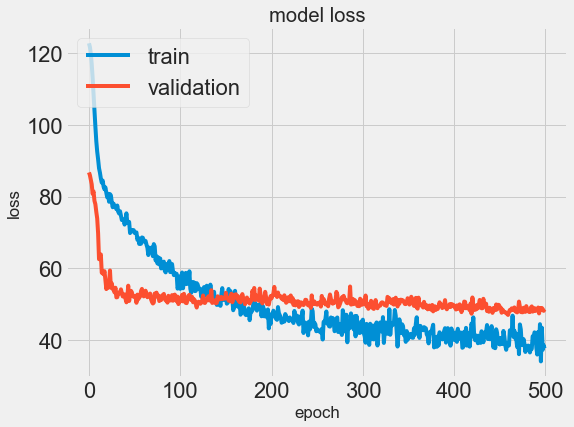

In [37]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#'mse','mae',

model.compile(loss='mae', optimizer='adam', metrics=[coeff_determination])
history = model.fit(X_train, y_train, epochs=500, batch_size=128,  verbose=1, validation_split=0.2,callbacks=callbacks_list)
print(history.history.keys())



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

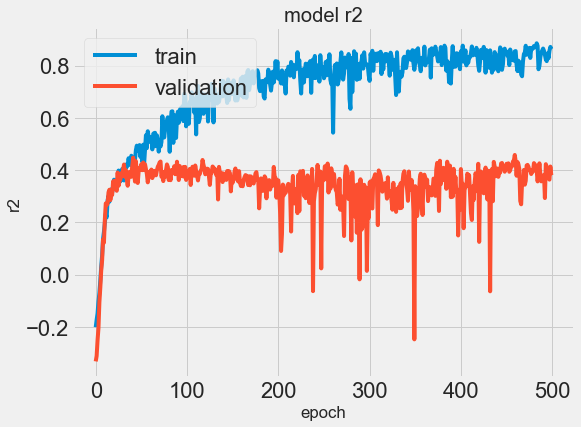

In [38]:
# "R2"
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

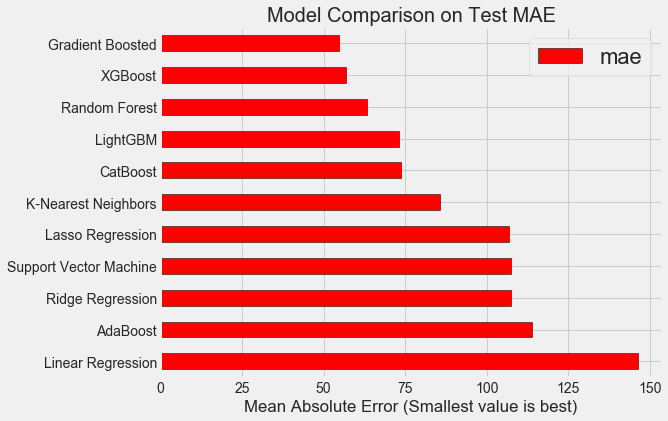

In [57]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mae': [lr_mae,ridge_mae, lasso_mae, svm_mae, rf_mae, 
                                         gb_mae, knn_mae,xg_mae,catb_mae,adab_mae,lgbm_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

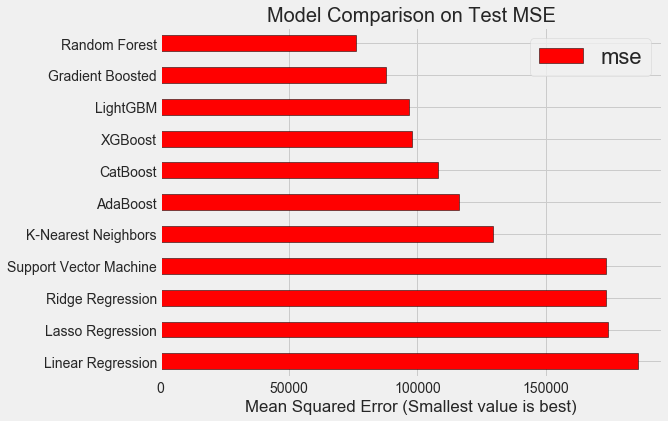

In [58]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mse': [lr_mse, ridge_mse, lasso_mse, svm_mse, rf_mse, 
                                         gb_mse, knn_mse, xg_mse,catb_mse,adab_mse,lgbm_mse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20);

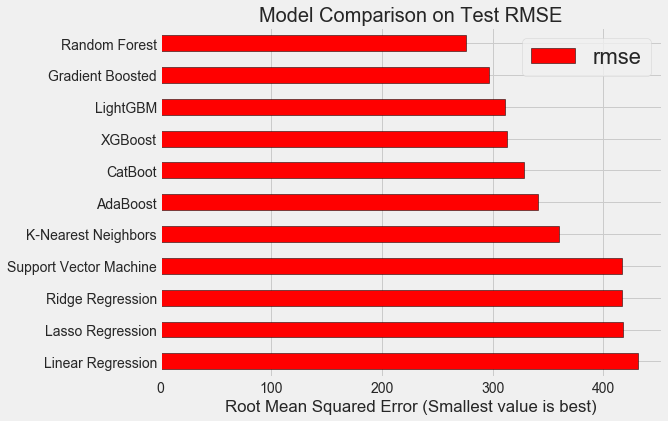

In [59]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoot','AdaBoost','LightGBM'],
                                 'rmse': [lr_rmse,ridge_rmse, lasso_rmse, svm_rmse, rf_rmse, 
                                         gb_rmse, knn_rmse, xg_rmse,catb_rmse,adab_rmse,lgbm_rmse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Root Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test RMSE', size = 20);

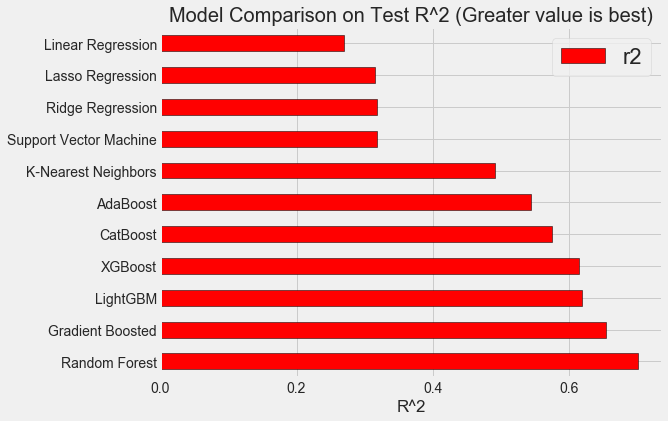

In [60]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'r2': [lr_r2, ridge_r2, lasso_r2, svm_r2, rf_r2, 
                                         gb_r2, knn_r2,xg_r2,catb_r2,adab_r2,lgbm_r2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R^2'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R^2 (Greater value is best)', size = 20);

In [14]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [15]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [16]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.1min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [17]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       75.999250      1.517477         0.200746        0.004491   
10      42.935499      3.889012         0.129246        0.005065   
6      183.736275     11.095763         0.347247        0.021227   
2       40.100247      2.083000         0.063745        0.009419   
8       79.850499      5.191879         0.208995        0.007515   
11      67.595996      2.252298         0.204748        0.007887   
20      35.908997      0.374222         0.086249        0.015984   
18      78.910497      1.463032         0.102748        0.001922   
21       8.015001      0.332984         0.027497        0.007435   
1        4.845498      0.119300         0.021745        0.011030   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
4                 900                       6                      6   
10               1100                      10                      6   
6                1500                       6                      2   
2                 500                       4                      2   
8                1500                       6                      2   
11               1500                       2                      4   
20                500                       6                      1   
18                500                       6                      1   
21                500                       6                      4   
1                 100                       6                      8   

   param_max_features param_max_depth param_loss  \
4                sqrt              15        lad   
10               None              10      huber   
6                sqrt              15      huber   
2                auto              10      huber   
8                sqrt              10      huber   
11               log2              10        lad   
20               sqrt              10      huber   
18               auto              15      huber   
21               log2               5      huber   
1                sqrt              10      huber   

                                               params  split0_test_score  \
4   {'n_estimators': 900, 'min_samples_split': 6, ...         -56.140406   
10  {'n_estimators': 1100, 'min_samples_split': 10...         -59.933053   
6   {'n_estimators': 1500, 'min_samples_split': 6,...         -56.712862   
2   {'n_estimators': 500, 'min_samples_split': 4, ...         -57.932468   
8   {'n_estimators': 1500, 'min_samples_split': 6,...         -58.136749   
11  {'n_estimators': 1500, 'min_samples_split': 2,...         -61.233849   
20  {'n_estimators': 500, 'min_samples_split': 6, ...         -59.685199   
18  {'n_estimators': 500, 'min_samples_split': 6, ...         -59.734224   
21  {'n_estimators': 500, 'min_samples_split': 6, ...         -66.420436   
1   {'n_estimators': 100, 'min_samples_split': 6, ...         -66.826631   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
4          -73.515445         -64.261806         -50.094364       -61.005333   
10         -72.330492         -63.792444         -52.076289       -62.035194   
6          -77.909680         -64.286353         -52.141888       -62.764962   
2          -74.999104         -67.960437         -50.576185       -62.869671   
8          -77.937565         -64.396962         -51.088840       -62.892547   
11         -73.956017         -66.145396         -51.640786       -63.246488   
20         -75.504183         -66.953065         -52.614003       -63.691476   
18         -76.252562         -72.291489         -55.201255       -65.872159   
21         -79.167874         -69.147599         -55.948498       -67.673603   
1          -82.695790         -73.682306         -52.883513       -69.025503   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
4         8.800409                1          -22.256539          -18.272188   
10        7.2

In [18]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=15,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=900,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 6,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [20]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=15,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=2,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
          

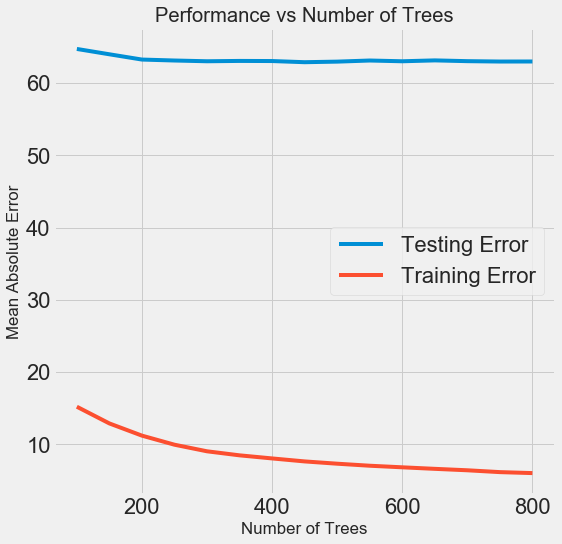

In [21]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Absolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [22]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       58.660751      3.407677         0.124496        0.008733   
8       61.499997      2.359970         0.110997        0.001222   
13      90.700743      6.454762         0.185253        0.027950   
14      91.726499      7.047016         0.147000        0.030656   
10      72.752248      4.401619         0.137752        0.003345   

   param_n_estimators                 params  split0_test_score  \
7                 450  {'n_estimators': 450}         -59.201675   
8                 500  {'n_estimators': 500}         -58.829006   
13                750  {'n_estimators': 750}         -57.579670   
14                800  {'n_estimators': 800}         -57.531870   
10                600  {'n_estimators': 600}         -58.319357   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
7          -77.832923         -62.423549         -52.070891       -62.884566   
8          -77.727556         -63.123123         -52.166500       -62.963849   
13         -77.821858         -64.318128         -52.180606       -62.977369   
14         -77.894627         -64.338076         -52.160418       -62.983557   
10         -77.839993         -63.592890         -52.293586       -63.013744   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7         9.409316                1          -10.018753           -4.452208   
8         9.376135                2           -9.445124           -4.281621   
13        9.589587                3           -7.742971           -3.641903   
14        9.630877                4           -7.562889           -3.512500   
10        9.448416                5           -8.698480           -3.910678   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
7            -6.986992           -9.013119         -7.617768         2.128989  
8            -6.677134           -8.801164         -7.301261         2.021980  
13           -5.496244           -7.663023         -6.136035         1.698820  
14           -5.373126           -7.557552         -6.001517         1.691834  
10           -6.248395           -8.349423         -6.801744         1.914248

In [23]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=450,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

496 ms ± 23.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [25]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

42.6 s ± 1.33 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [26]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 80.0146.
Final model performance on the test set:   MAE = 58.4429.


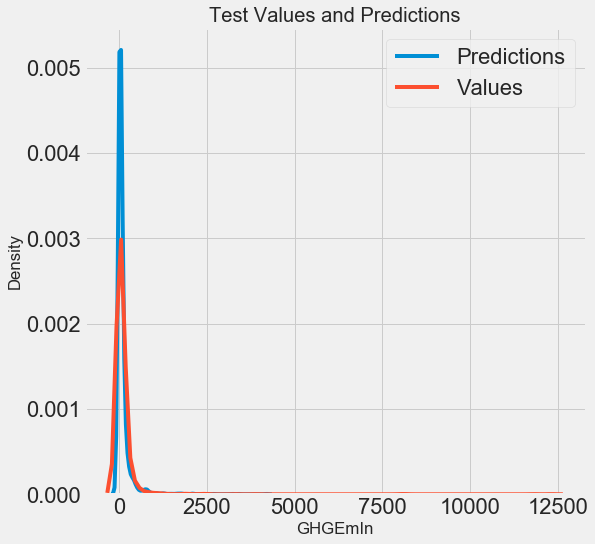

In [27]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('GHGEmIn'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

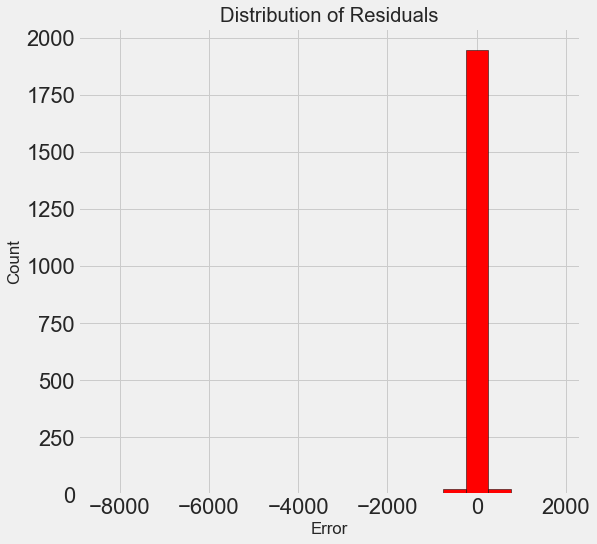

In [28]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');